Connected to Python 3.9.6

In [ ]:
import pandas as pd

# Load the pos2016.csv file
data_2016 = pd.read_csv("pos2016.csv")

# Filter for short-term hospitals with provider type code 01 and subtype code 01
short_term_hospitals_2016 = data_2016[(data_2016['PRVDR_CTGRY_CD'] == 1) & (data_2016['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# a. Count the number of hospitals in this subset
hospital_count_2016 = short_term_hospitals_2016.shape[0]
hospital_count_2016

import pandas as pd
import altair as alt

# Load each year's data with appropriate encoding where needed
data_2016 = pd.read_csv("pos2016.csv")
data_2017 = pd.read_csv("pos2017.csv")
data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")
data_2019 = pd.read_csv("pos2019.csv", encoding="ISO-8859-1")

# Define a function to filter for short-term hospitals
def filter_short_term(data):
    return data[(data['PRVDR_CTGRY_CD'] == 1) & (data['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# Apply filtering to each dataset and add a 'Year' column for each
data_2016 = filter_short_term(data_2016)
data_2016['Year'] = 2016

data_2017 = filter_short_term(data_2017)
data_2017['Year'] = 2017

data_2018 = filter_short_term(data_2018)
data_2018['Year'] = 2018

data_2019 = filter_short_term(data_2019)
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count the number of observations (hospitals) by year
observations_by_year = all_years_data.groupby('Year').size().reset_index(name='Count')

# Plot using Altair
bars = alt.Chart(observations_by_year).mark_bar(color='steelblue').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Count:Q', title='Number of Short-Term Hospitals')
).properties(
    title='Number of Observations in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='Count:Q'
)

# Combine the bars and the text
(bars + text).display()


import pandas as pd
import altair as alt

# Assuming data for each year is already filtered and loaded
# If not, make sure data_2016, data_2017, data_2018, data_2019 are loaded and filtered as before

# Add a 'Year' column to each dataset
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count unique hospitals (by PRVDR_NUM) per year
unique_hospitals_by_year = all_years_data.groupby('Year')['PRVDR_NUM'].nunique().reset_index(name='UniqueCount')

# Plot using Altair
bars = alt.Chart(unique_hospitals_by_year).mark_bar(color='seagreen').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('UniqueCount:Q', title='Number of Unique Short-Term Hospitals')
).properties(
    title='Number of Unique Short-Term Hospitals in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='UniqueCount:Q'
)

# Display the combined chart with bars and labels
(bars + text).display()


# Double checking for duplicates
# Check for duplicates in PRVDR_NUM within each year
duplicates_2016 = data_2016.duplicated(subset='PRVDR_NUM').sum()
duplicates_2017 = data_2017.duplicated(subset='PRVDR_NUM').sum()
duplicates_2018 = data_2018.duplicated(subset='PRVDR_NUM').sum()
duplicates_2019 = data_2019.duplicated(subset='PRVDR_NUM').sum()

print(f"2016 Duplicates: {duplicates_2016}")
print(f"2017 Duplicates: {duplicates_2017}")
print(f"2018 Duplicates: {duplicates_2018}")
print(f"2019 Duplicates: {duplicates_2019}")



# Step 1: Filter active hospitals in each year
active_2016 = data_2016[data_2016['PGM_TRMNTN_CD'] == 0]
active_2017 = data_2017[data_2017['PGM_TRMNTN_CD'] == 0]
active_2018 = data_2018[data_2018['PGM_TRMNTN_CD'] == 0]
active_2019 = data_2019[data_2019['PGM_TRMNTN_CD'] == 0]

# Step 2: Define function to check if provider is active in a given year
def provider_in_year(df, provider_num):
    row = df[df['PRVDR_NUM'] == provider_num]
    return not row.empty and row['PGM_TRMNTN_CD'].values[0] == 0

# Step 3: Determine closure year for each provider number
def determine_closure_year(provider_num):
    if not provider_in_year(active_2017, provider_num):
        return 2017
    elif not provider_in_year(active_2018, provider_num):
        return 2018
    elif not provider_in_year(active_2019, provider_num):
        return 2019
    return None

# Step 4: Apply closure detection on active hospitals in 2016
active_2016_only = active_2016[active_2016['PGM_TRMNTN_CD'] == 0]
active_2016_only['Year_Closed'] = active_2016_only['PRVDR_NUM'].apply(determine_closure_year)

# Step 5: Filter out hospitals that have a closure year assigned
closed_hospitals = active_2016_only.dropna(subset=['Year_Closed']).reset_index(drop=True)

# Output the result
print(f"Number of suspected hospital closures: {len(closed_hospitals)}")
closed_hospitals[['FAC_NAME', 'ZIP_CD', 'Year_Closed']]


# Sort the closed hospitals by facility name
sorted_closed_hospitals = closed_hospitals.sort_values(by='FAC_NAME').reset_index(drop=True)

# Display the names and year of suspected closure for the first 10 rows
sorted_closed_hospitals[['FAC_NAME', 'Year_Closed']].head(10)


# Step 1: Count active hospitals by ZIP code for each year
active_by_zip_2016 = active_2016['ZIP_CD'].value_counts().to_dict()
active_by_zip_2017 = active_2017['ZIP_CD'].value_counts().to_dict()
active_by_zip_2018 = active_2018['ZIP_CD'].value_counts().to_dict()
active_by_zip_2019 = active_2019['ZIP_CD'].value_counts().to_dict()

# Step 2: Function to check if closure might be due to merger/acquisition
def is_possible_merger(row):
    zip_code = row['ZIP_CD']
    year_closed = row['Year_Closed']
    
    if year_closed == 2017:
        return active_by_zip_2016.get(zip_code, 0) <= active_by_zip_2017.get(zip_code, 0)
    elif year_closed == 2018:
        return active_by_zip_2017.get(zip_code, 0) <= active_by_zip_2018.get(zip_code, 0)
    elif year_closed == 2019:
        return active_by_zip_2018.get(zip_code, 0) <= active_by_zip_2019.get(zip_code, 0)
    return False

# Step 3: Apply the function to identify potential mergers/acquisitions
closed_hospitals['Possible_Merger'] = closed_hospitals.apply(is_possible_merger, axis=1)

# Filter the suspected closures that might be due to a merger/acquisition
potential_mergers = closed_hospitals[closed_hospitals['Possible_Merger']]

# Output the result
num_potential_mergers = len(potential_mergers)
print(f"Number of suspected hospital closures that fit the merger/acquisition definition: {num_potential_mergers}")


# Calculate the corrected number of closures after removing mergers/acquisitions
corrected_closures = len(closed_hospitals) - num_potential_mergers
print(f"Number of hospitals remaining after correcting for mergers/acquisitions: {corrected_closures}")

# Filter out the potential mergers/acquisitions to get the corrected closures
corrected_closures = closed_hospitals[~closed_hospitals['Possible_Merger']]

# Sort the corrected closures by facility name
sorted_corrected_closures = corrected_closures.sort_values(by='FAC_NAME')

# Display the first 10 rows
sorted_corrected_closures[['FAC_NAME', 'ZIP_CD', 'Year_Closed']].head(10)


import os

# Replace 'shapefile_directory' with the path to your extracted shapefile directory
shapefile_directory = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k"

# Get a list of files and their sizes
for file_name in os.listdir(shapefile_directory):
    file_path = os.path.join(shapefile_directory, file_name)
    size_mb = os.path.getsize(file_path) / (1024 * 1024)
    print(f"{file_name}: {size_mb:.2f} MB")


# Check the distribution of hospital counts
print(merged_gdf['Hospital_Count'].describe())
print(merged_gdf['Hospital_Count'].value_counts().head(20))


import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load 2016 POS data and filter for short-term hospitals in Texas
hospital_data_path = "/Users/attaullah/Documents/problem-set-4-atta/pos2016.csv"
pos2016 = pd.read_csv(hospital_data_path)
texas_hospitals = pos2016[(pos2016["PRVDR_CTGRY_SBTYP_CD"] == 1) &
                          (pos2016["PRVDR_CTGRY_CD"] == 1) &
                          (pos2016["ZIP_CD"].astype(str).str.startswith(("75", "76", "77", "78", "79")))]

# Standardize ZIP codes as 5-digit strings
texas_hospitals["ZIP_CD"] = texas_hospitals["ZIP_CD"].astype(int).astype(str).str.zfill(5)

# Calculate number of hospitals per ZIP code in Texas
hospital_counts = texas_hospitals.groupby("ZIP_CD").size().reset_index(name="Hospital_Count")

# Load Texas ZIP code shapefile and filter for Texas ZIPs
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"
zip_gdf = gpd.read_file(shapefile_path)
zip_gdf["ZCTA5"] = zip_gdf["ZCTA5"].astype(str).str.zfill(5)
texas_zip_gdf = zip_gdf[zip_gdf["ZCTA5"].str.startswith(("75", "76", "77", "78", "79"))]

# Merge hospital data with Texas ZIP code shapefile
merged_gdf = texas_zip_gdf.merge(hospital_counts, left_on="ZCTA5", right_on="ZIP_CD", how="left")
merged_gdf["Hospital_Count"] = merged_gdf["Hospital_Count"].fillna(0)

# Plot choropleth map of hospital counts by ZIP code in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(
    column="Hospital_Count",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Hospital Count"},
    ax=ax
)
ax.set_title("Number of Hospitals by ZIP Code in Texas (2016)", fontsize=15)
ax.axis("off")  # Remove axis for cleaner map
plt.show()




import geopandas as gpd
from shapely.geometry import Point

# Load the ZIP code shapefile
shapefile_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp'
zip_gdf = gpd.read_file(shapefile_path)

# Calculate the centroid for each ZIP code polygon
# Assuming 'ZCTA5' is the ZIP code column in the shapefile
zip_gdf['centroid'] = zip_gdf.geometry.centroid

# Create a new GeoDataFrame with centroids
zips_all_centroids = gpd.GeoDataFrame(zip_gdf[['ZCTA5', 'centroid']], geometry='centroid')

# Print the dimensions of the resulting GeoDataFrame
print("Dimensions of zips_all_centroids:", zips_all_centroids.shape)

# Display the first few rows to understand the structure
print(zips_all_centroids.head())

import geopandas as gpd

# Define ZIP code prefixes for Texas and its bordering states
texas_prefixes = ["75", "76", "77", "78", "79"]  # Texas
bordering_prefixes = texas_prefixes + [
    "73", "74",              # Oklahoma
    "870", "871", "872", "873", "874", "875", "876", "877", "878", "879", "880", "881", "882", "883", "884",  # New Mexico
    "700", "701", "702", "703", "704", "705", "706", "707", "708", "709", "710", "711", "712", "713", "714", "715",  # Louisiana
    "716", "717", "718", "719", "720", "721", "722", "723", "724", "725", "726", "727", "728", "729"  # Arkansas
]

# Create subset for Texas ZIP codes
zips_texas_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(texas_prefixes))]

# Create subset for Texas and bordering states ZIP codes
zips_texas_borderstates_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(bordering_prefixes))]

# Calculate the number of unique ZIP codes in each subset
unique_texas_zips = zips_texas_centroids["ZCTA5"].nunique()
unique_borderstates_zips = zips_texas_borderstates_centroids["ZCTA5"].nunique()

# Print the results
print("Number of unique ZIP codes in Texas:", unique_texas_zips)
print("Number of unique ZIP codes in Texas and bordering states:", unique_borderstates_zips)

# Display the first few rows of each subset to verify
print("Sample of Texas ZIP codes:\n", zips_texas_centroids.head())
print("Sample of Texas and bordering states ZIP codes:\n", zips_texas_borderstates_centroids.head())

import pandas as pd
import geopandas as gpd

# Assume we already have `zips_texas_borderstates_centroids` created and `hospital_counts` data from the previous part.

# Filter hospital data to include only ZIP codes with at least one hospital in 2016
# 'hospital_counts' should be the dataframe that contains ZIP codes and counts of hospitals in each ZIP code
hospital_counts_2016 = hospital_counts[hospital_counts['Hospital_Count'] > 0]

# Perform an inner merge on 'ZCTA5' (ZIP code) to get only those ZIP codes with at least one hospital
zips_withhospital_centroids = zips_texas_borderstates_centroids.merge(
    hospital_counts_2016, 
    left_on="ZCTA5", 
    right_on="ZIP_CD", 
    how="inner"
)

# Check the resulting GeoDataFrame
print("Dimensions of zips_withhospital_centroids:", zips_withhospital_centroids.shape)
print(zips_withhospital_centroids.head())


# Reproject both GeoDataFrames to a projected CRS (e.g., EPSG:5070 for USA)
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=5070)
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=5070)

# Re-run the distance calculation with the reprojected GeoDataFrames
import time

# Subset to 10 ZIP codes in Texas
subset_texas_centroids = zips_texas_centroids.iloc[:10]

# Start timing the process
start_time = time.time()

# Calculate the nearest hospital distance for each ZIP code in the subset
subset_texas_centroids['nearest_hospital_distance'] = subset_texas_centroids['centroid'].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End timing
end_time = time.time()
subset_time = end_time - start_time
print("Time taken for 10 ZIP code calculations:", subset_time, "seconds")

# Estimate time for full calculation
estimated_total_time = subset_time * (len(zips_texas_centroids) / 10)
print("Estimated time for the full procedure:", estimated_total_time, "seconds")

# Display the results for the subset
print(subset_texas_centroids[['ZCTA5', 'nearest_hospital_distance']])


import time

# Start the timer for the full calculation on zips_texas_centroids
start_time_full = time.time()

# Apply the distance calculation for each ZIP code in Texas to the nearest ZIP code with a hospital
zips_texas_centroids["nearest_hospital_distance"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End the timer
end_time_full = time.time()
actual_time_full = end_time_full - start_time_full

# Print out the actual time taken
print(f"Actual time for full calculation: {actual_time_full} seconds")

# Path to the .prj file
prj_file_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.prj'

# Read and print the .prj file contents
with open(prj_file_path, 'r') as file:
    prj_contents = file.read()

print("Contents of the .prj file:")
print(prj_contents)



import math

# Function to convert distance in degrees to miles at a given latitude (approx. for Texas)
def degrees_to_miles(distance_in_degrees, latitude=30):
    # Convert latitude to radians
    latitude_in_radians = math.radians(latitude)
    
    # Approximate miles per degree for latitude and longitude
    miles_per_degree_latitude = 69.0
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)
    
    # Average of latitude and longitude mile conversion for more accuracy
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the computed average distance in degrees from the dataset
distance_in_degrees = 0.0753484763  # Computed average distance in degrees
distance_in_miles = degrees_to_miles(distance_in_degrees)
print("Average distance to nearest hospital (in miles):", distance_in_miles)


# Calculate the nearest hospital distance in degrees
zips_texas_centroids["nearest_hospital_distance_degrees"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Calculate the average distance in degrees
average_distance_degrees = zips_texas_centroids["nearest_hospital_distance_degrees"].mean()
print("Average distance to the nearest hospital for each ZIP code in Texas (in degrees):", average_distance_degrees)


import math

# Function to convert degrees to miles based on approximate latitude for Texas (30 degrees)
def degrees_to_miles(distance_in_degrees, latitude=30):
    latitude_in_radians = math.radians(latitude)
    miles_per_degree_latitude = 69.0  # Approximation for latitude degree
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)  # Approximation for longitude degree
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the previously calculated average distance in degrees
distance_in_miles = degrees_to_miles(average_distance_degrees)
print("Average distance to the nearest hospital for each ZIP code in Texas (in miles):", distance_in_miles)
 

# Reproject to a projected CRS for accurate distance calculation
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=3395)  # World Mercator
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=3395)

# Recalculate nearest hospital distance
zips_texas_centroids["nearest_hospital_distance_meters"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Convert the distance from meters to miles
zips_texas_centroids["nearest_hospital_distance_miles"] = zips_texas_centroids["nearest_hospital_distance_meters"] / 1609.34

# Calculate the average distance in miles
average_distance_miles_corrected = zips_texas_centroids["nearest_hospital_distance_miles"].mean()
print("Corrected average distance to nearest hospital (in miles):", average_distance_miles_corrected)


import matplotlib.pyplot as plt

# Plotting the choropleth map for average distance to nearest hospital in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
zips_texas_centroids.plot(
    column='nearest_hospital_distance_miles',  # Column with the distance in miles
    cmap='viridis',                            # Color map
    linewidth=0.8,                             # Border width for ZIP code polygons
    ax=ax,
    edgecolor='0.8',                           # Color for polygon borders
    legend=True,
    legend_kwds={'label': "Distance to Nearest Hospital (miles)"}
)

# Adding map title and turning off axis for clarity
ax.set_title("Average Distance to Nearest Hospital by ZIP Code in Texas", fontsize=15)
ax.axis('off')  # Hides the axis

# Show the plot
plt.show()

<ipython-input-1-a754965989b4>:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")


alt.LayerChart(...)

alt.LayerChart(...)

2016 Duplicates: 0
2017 Duplicates: 0
2018 Duplicates: 0
2019 Duplicates: 0
Number of suspected hospital closures: 174
Number of suspected hospital closures that fit the merger/acquisition definition: 8
Number of hospitals remaining after correcting for mergers/acquisitions: 166
gz_2010_us_860_00_500k.prj: 0.00 MB
gz_2010_us_860_00_500k.shx: 0.25 MB
gz_2010_us_860_00_500k.shp: 798.74 MB
gz_2010_us_860_00_500k.dbf: 6.13 MB
gz_2010_us_860_00_500k.xml: 0.01 MB


NameError: name 'merged_gdf' is not defined

In [ ]:
import pandas as pd

# Load the pos2016.csv file
data_2016 = pd.read_csv("pos2016.csv")

# Filter for short-term hospitals with provider type code 01 and subtype code 01
short_term_hospitals_2016 = data_2016[(data_2016['PRVDR_CTGRY_CD'] == 1) & (data_2016['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# a. Count the number of hospitals in this subset
hospital_count_2016 = short_term_hospitals_2016.shape[0]
hospital_count_2016

import pandas as pd
import altair as alt

# Load each year's data with appropriate encoding where needed
data_2016 = pd.read_csv("pos2016.csv")
data_2017 = pd.read_csv("pos2017.csv")
data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")
data_2019 = pd.read_csv("pos2019.csv", encoding="ISO-8859-1")

# Define a function to filter for short-term hospitals
def filter_short_term(data):
    return data[(data['PRVDR_CTGRY_CD'] == 1) & (data['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# Apply filtering to each dataset and add a 'Year' column for each
data_2016 = filter_short_term(data_2016)
data_2016['Year'] = 2016

data_2017 = filter_short_term(data_2017)
data_2017['Year'] = 2017

data_2018 = filter_short_term(data_2018)
data_2018['Year'] = 2018

data_2019 = filter_short_term(data_2019)
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count the number of observations (hospitals) by year
observations_by_year = all_years_data.groupby('Year').size().reset_index(name='Count')

# Plot using Altair
bars = alt.Chart(observations_by_year).mark_bar(color='steelblue').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Count:Q', title='Number of Short-Term Hospitals')
).properties(
    title='Number of Observations in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='Count:Q'
)

# Combine the bars and the text
(bars + text).display()


import pandas as pd
import altair as alt

# Assuming data for each year is already filtered and loaded
# If not, make sure data_2016, data_2017, data_2018, data_2019 are loaded and filtered as before

# Add a 'Year' column to each dataset
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count unique hospitals (by PRVDR_NUM) per year
unique_hospitals_by_year = all_years_data.groupby('Year')['PRVDR_NUM'].nunique().reset_index(name='UniqueCount')

# Plot using Altair
bars = alt.Chart(unique_hospitals_by_year).mark_bar(color='seagreen').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('UniqueCount:Q', title='Number of Unique Short-Term Hospitals')
).properties(
    title='Number of Unique Short-Term Hospitals in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='UniqueCount:Q'
)

# Display the combined chart with bars and labels
(bars + text).display()


# Double checking for duplicates
# Check for duplicates in PRVDR_NUM within each year
duplicates_2016 = data_2016.duplicated(subset='PRVDR_NUM').sum()
duplicates_2017 = data_2017.duplicated(subset='PRVDR_NUM').sum()
duplicates_2018 = data_2018.duplicated(subset='PRVDR_NUM').sum()
duplicates_2019 = data_2019.duplicated(subset='PRVDR_NUM').sum()

print(f"2016 Duplicates: {duplicates_2016}")
print(f"2017 Duplicates: {duplicates_2017}")
print(f"2018 Duplicates: {duplicates_2018}")
print(f"2019 Duplicates: {duplicates_2019}")



# Step 1: Filter active hospitals in each year
active_2016 = data_2016[data_2016['PGM_TRMNTN_CD'] == 0]
active_2017 = data_2017[data_2017['PGM_TRMNTN_CD'] == 0]
active_2018 = data_2018[data_2018['PGM_TRMNTN_CD'] == 0]
active_2019 = data_2019[data_2019['PGM_TRMNTN_CD'] == 0]

# Step 2: Define function to check if provider is active in a given year
def provider_in_year(df, provider_num):
    row = df[df['PRVDR_NUM'] == provider_num]
    return not row.empty and row['PGM_TRMNTN_CD'].values[0] == 0

# Step 3: Determine closure year for each provider number
def determine_closure_year(provider_num):
    if not provider_in_year(active_2017, provider_num):
        return 2017
    elif not provider_in_year(active_2018, provider_num):
        return 2018
    elif not provider_in_year(active_2019, provider_num):
        return 2019
    return None

# Step 4: Apply closure detection on active hospitals in 2016
active_2016_only = active_2016[active_2016['PGM_TRMNTN_CD'] == 0]
active_2016_only['Year_Closed'] = active_2016_only['PRVDR_NUM'].apply(determine_closure_year)

# Step 5: Filter out hospitals that have a closure year assigned
closed_hospitals = active_2016_only.dropna(subset=['Year_Closed']).reset_index(drop=True)

# Output the result
print(f"Number of suspected hospital closures: {len(closed_hospitals)}")
closed_hospitals[['FAC_NAME', 'ZIP_CD', 'Year_Closed']]


# Sort the closed hospitals by facility name
sorted_closed_hospitals = closed_hospitals.sort_values(by='FAC_NAME').reset_index(drop=True)

# Display the names and year of suspected closure for the first 10 rows
sorted_closed_hospitals[['FAC_NAME', 'Year_Closed']].head(10)


# Step 1: Count active hospitals by ZIP code for each year
active_by_zip_2016 = active_2016['ZIP_CD'].value_counts().to_dict()
active_by_zip_2017 = active_2017['ZIP_CD'].value_counts().to_dict()
active_by_zip_2018 = active_2018['ZIP_CD'].value_counts().to_dict()
active_by_zip_2019 = active_2019['ZIP_CD'].value_counts().to_dict()

# Step 2: Function to check if closure might be due to merger/acquisition
def is_possible_merger(row):
    zip_code = row['ZIP_CD']
    year_closed = row['Year_Closed']
    
    if year_closed == 2017:
        return active_by_zip_2016.get(zip_code, 0) <= active_by_zip_2017.get(zip_code, 0)
    elif year_closed == 2018:
        return active_by_zip_2017.get(zip_code, 0) <= active_by_zip_2018.get(zip_code, 0)
    elif year_closed == 2019:
        return active_by_zip_2018.get(zip_code, 0) <= active_by_zip_2019.get(zip_code, 0)
    return False

# Step 3: Apply the function to identify potential mergers/acquisitions
closed_hospitals['Possible_Merger'] = closed_hospitals.apply(is_possible_merger, axis=1)

# Filter the suspected closures that might be due to a merger/acquisition
potential_mergers = closed_hospitals[closed_hospitals['Possible_Merger']]

# Output the result
num_potential_mergers = len(potential_mergers)
print(f"Number of suspected hospital closures that fit the merger/acquisition definition: {num_potential_mergers}")


# Calculate the corrected number of closures after removing mergers/acquisitions
corrected_closures = len(closed_hospitals) - num_potential_mergers
print(f"Number of hospitals remaining after correcting for mergers/acquisitions: {corrected_closures}")

# Filter out the potential mergers/acquisitions to get the corrected closures
corrected_closures = closed_hospitals[~closed_hospitals['Possible_Merger']]

# Sort the corrected closures by facility name
sorted_corrected_closures = corrected_closures.sort_values(by='FAC_NAME')

# Display the first 10 rows
sorted_corrected_closures[['FAC_NAME', 'ZIP_CD', 'Year_Closed']].head(10)


import os

# Replace 'shapefile_directory' with the path to your extracted shapefile directory
shapefile_directory = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k"

# Get a list of files and their sizes
for file_name in os.listdir(shapefile_directory):
    file_path = os.path.join(shapefile_directory, file_name)
    size_mb = os.path.getsize(file_path) / (1024 * 1024)
    print(f"{file_name}: {size_mb:.2f} MB")


# Check the distribution of hospital counts
print(merged_gdf['Hospital_Count'].describe())
print(merged_gdf['Hospital_Count'].value_counts().head(20))


import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load 2016 POS data and filter for short-term hospitals in Texas
hospital_data_path = "/Users/attaullah/Documents/problem-set-4-atta/pos2016.csv"
pos2016 = pd.read_csv(hospital_data_path)
texas_hospitals = pos2016[(pos2016["PRVDR_CTGRY_SBTYP_CD"] == 1) &
                          (pos2016["PRVDR_CTGRY_CD"] == 1) &
                          (pos2016["ZIP_CD"].astype(str).str.startswith(("75", "76", "77", "78", "79")))]

# Standardize ZIP codes as 5-digit strings
texas_hospitals["ZIP_CD"] = texas_hospitals["ZIP_CD"].astype(int).astype(str).str.zfill(5)

# Calculate number of hospitals per ZIP code in Texas
hospital_counts = texas_hospitals.groupby("ZIP_CD").size().reset_index(name="Hospital_Count")

# Load Texas ZIP code shapefile and filter for Texas ZIPs
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"
zip_gdf = gpd.read_file(shapefile_path)
zip_gdf["ZCTA5"] = zip_gdf["ZCTA5"].astype(str).str.zfill(5)
texas_zip_gdf = zip_gdf[zip_gdf["ZCTA5"].str.startswith(("75", "76", "77", "78", "79"))]

# Merge hospital data with Texas ZIP code shapefile
merged_gdf = texas_zip_gdf.merge(hospital_counts, left_on="ZCTA5", right_on="ZIP_CD", how="left")
merged_gdf["Hospital_Count"] = merged_gdf["Hospital_Count"].fillna(0)

# Plot choropleth map of hospital counts by ZIP code in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(
    column="Hospital_Count",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Hospital Count"},
    ax=ax
)
ax.set_title("Number of Hospitals by ZIP Code in Texas (2016)", fontsize=15)
ax.axis("off")  # Remove axis for cleaner map
plt.show()




import geopandas as gpd
from shapely.geometry import Point

# Load the ZIP code shapefile
shapefile_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp'
zip_gdf = gpd.read_file(shapefile_path)

# Calculate the centroid for each ZIP code polygon
# Assuming 'ZCTA5' is the ZIP code column in the shapefile
zip_gdf['centroid'] = zip_gdf.geometry.centroid

# Create a new GeoDataFrame with centroids
zips_all_centroids = gpd.GeoDataFrame(zip_gdf[['ZCTA5', 'centroid']], geometry='centroid')

# Print the dimensions of the resulting GeoDataFrame
print("Dimensions of zips_all_centroids:", zips_all_centroids.shape)

# Display the first few rows to understand the structure
print(zips_all_centroids.head())

import geopandas as gpd

# Define ZIP code prefixes for Texas and its bordering states
texas_prefixes = ["75", "76", "77", "78", "79"]  # Texas
bordering_prefixes = texas_prefixes + [
    "73", "74",              # Oklahoma
    "870", "871", "872", "873", "874", "875", "876", "877", "878", "879", "880", "881", "882", "883", "884",  # New Mexico
    "700", "701", "702", "703", "704", "705", "706", "707", "708", "709", "710", "711", "712", "713", "714", "715",  # Louisiana
    "716", "717", "718", "719", "720", "721", "722", "723", "724", "725", "726", "727", "728", "729"  # Arkansas
]

# Create subset for Texas ZIP codes
zips_texas_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(texas_prefixes))]

# Create subset for Texas and bordering states ZIP codes
zips_texas_borderstates_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(bordering_prefixes))]

# Calculate the number of unique ZIP codes in each subset
unique_texas_zips = zips_texas_centroids["ZCTA5"].nunique()
unique_borderstates_zips = zips_texas_borderstates_centroids["ZCTA5"].nunique()

# Print the results
print("Number of unique ZIP codes in Texas:", unique_texas_zips)
print("Number of unique ZIP codes in Texas and bordering states:", unique_borderstates_zips)

# Display the first few rows of each subset to verify
print("Sample of Texas ZIP codes:\n", zips_texas_centroids.head())
print("Sample of Texas and bordering states ZIP codes:\n", zips_texas_borderstates_centroids.head())

import pandas as pd
import geopandas as gpd

# Assume we already have `zips_texas_borderstates_centroids` created and `hospital_counts` data from the previous part.

# Filter hospital data to include only ZIP codes with at least one hospital in 2016
# 'hospital_counts' should be the dataframe that contains ZIP codes and counts of hospitals in each ZIP code
hospital_counts_2016 = hospital_counts[hospital_counts['Hospital_Count'] > 0]

# Perform an inner merge on 'ZCTA5' (ZIP code) to get only those ZIP codes with at least one hospital
zips_withhospital_centroids = zips_texas_borderstates_centroids.merge(
    hospital_counts_2016, 
    left_on="ZCTA5", 
    right_on="ZIP_CD", 
    how="inner"
)

# Check the resulting GeoDataFrame
print("Dimensions of zips_withhospital_centroids:", zips_withhospital_centroids.shape)
print(zips_withhospital_centroids.head())


# Reproject both GeoDataFrames to a projected CRS (e.g., EPSG:5070 for USA)
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=5070)
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=5070)

# Re-run the distance calculation with the reprojected GeoDataFrames
import time

# Subset to 10 ZIP codes in Texas
subset_texas_centroids = zips_texas_centroids.iloc[:10]

# Start timing the process
start_time = time.time()

# Calculate the nearest hospital distance for each ZIP code in the subset
subset_texas_centroids['nearest_hospital_distance'] = subset_texas_centroids['centroid'].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End timing
end_time = time.time()
subset_time = end_time - start_time
print("Time taken for 10 ZIP code calculations:", subset_time, "seconds")

# Estimate time for full calculation
estimated_total_time = subset_time * (len(zips_texas_centroids) / 10)
print("Estimated time for the full procedure:", estimated_total_time, "seconds")

# Display the results for the subset
print(subset_texas_centroids[['ZCTA5', 'nearest_hospital_distance']])


import time

# Start the timer for the full calculation on zips_texas_centroids
start_time_full = time.time()

# Apply the distance calculation for each ZIP code in Texas to the nearest ZIP code with a hospital
zips_texas_centroids["nearest_hospital_distance"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End the timer
end_time_full = time.time()
actual_time_full = end_time_full - start_time_full

# Print out the actual time taken
print(f"Actual time for full calculation: {actual_time_full} seconds")

# Path to the .prj file
prj_file_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.prj'

# Read and print the .prj file contents
with open(prj_file_path, 'r') as file:
    prj_contents = file.read()

print("Contents of the .prj file:")
print(prj_contents)



import math

# Function to convert distance in degrees to miles at a given latitude (approx. for Texas)
def degrees_to_miles(distance_in_degrees, latitude=30):
    # Convert latitude to radians
    latitude_in_radians = math.radians(latitude)
    
    # Approximate miles per degree for latitude and longitude
    miles_per_degree_latitude = 69.0
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)
    
    # Average of latitude and longitude mile conversion for more accuracy
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the computed average distance in degrees from the dataset
distance_in_degrees = 0.0753484763  # Computed average distance in degrees
distance_in_miles = degrees_to_miles(distance_in_degrees)
print("Average distance to nearest hospital (in miles):", distance_in_miles)


# Calculate the nearest hospital distance in degrees
zips_texas_centroids["nearest_hospital_distance_degrees"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Calculate the average distance in degrees
average_distance_degrees = zips_texas_centroids["nearest_hospital_distance_degrees"].mean()
print("Average distance to the nearest hospital for each ZIP code in Texas (in degrees):", average_distance_degrees)


import math

# Function to convert degrees to miles based on approximate latitude for Texas (30 degrees)
def degrees_to_miles(distance_in_degrees, latitude=30):
    latitude_in_radians = math.radians(latitude)
    miles_per_degree_latitude = 69.0  # Approximation for latitude degree
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)  # Approximation for longitude degree
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the previously calculated average distance in degrees
distance_in_miles = degrees_to_miles(average_distance_degrees)
print("Average distance to the nearest hospital for each ZIP code in Texas (in miles):", distance_in_miles)
 

# Reproject to a projected CRS for accurate distance calculation
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=3395)  # World Mercator
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=3395)

# Recalculate nearest hospital distance
zips_texas_centroids["nearest_hospital_distance_meters"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Convert the distance from meters to miles
zips_texas_centroids["nearest_hospital_distance_miles"] = zips_texas_centroids["nearest_hospital_distance_meters"] / 1609.34

# Calculate the average distance in miles
average_distance_miles_corrected = zips_texas_centroids["nearest_hospital_distance_miles"].mean()
print("Corrected average distance to nearest hospital (in miles):", average_distance_miles_corrected)


import matplotlib.pyplot as plt

# Plotting the choropleth map for average distance to nearest hospital in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
zips_texas_centroids.plot(
    column='nearest_hospital_distance_miles',  # Column with the distance in miles
    cmap='viridis',                            # Color map
    linewidth=0.8,                             # Border width for ZIP code polygons
    ax=ax,
    edgecolor='0.8',                           # Color for polygon borders
    legend=True,
    legend_kwds={'label': "Distance to Nearest Hospital (miles)"}
)

# Adding map title and turning off axis for clarity
ax.set_title("Average Distance to Nearest Hospital by ZIP Code in Texas", fontsize=15)
ax.axis('off')  # Hides the axis

# Show the plot
plt.show()

<ipython-input-2-a754965989b4>:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")


alt.LayerChart(...)

alt.LayerChart(...)

2016 Duplicates: 0
2017 Duplicates: 0
2018 Duplicates: 0
2019 Duplicates: 0
Number of suspected hospital closures: 174
Number of suspected hospital closures that fit the merger/acquisition definition: 8
Number of hospitals remaining after correcting for mergers/acquisitions: 166
gz_2010_us_860_00_500k.prj: 0.00 MB
gz_2010_us_860_00_500k.shx: 0.25 MB
gz_2010_us_860_00_500k.shp: 798.74 MB
gz_2010_us_860_00_500k.dbf: 6.13 MB
gz_2010_us_860_00_500k.xml: 0.01 MB


NameError: name 'merged_gdf' is not defined

In [ ]:
import pandas as pd

# Load the pos2016.csv file
data_2016 = pd.read_csv("pos2016.csv")

# Filter for short-term hospitals with provider type code 01 and subtype code 01
short_term_hospitals_2016 = data_2016[(data_2016['PRVDR_CTGRY_CD'] == 1) & (data_2016['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# a. Count the number of hospitals in this subset
hospital_count_2016 = short_term_hospitals_2016.shape[0]
hospital_count_2016

import pandas as pd
import altair as alt

# Load each year's data with appropriate encoding where needed
data_2016 = pd.read_csv("pos2016.csv")
data_2017 = pd.read_csv("pos2017.csv")
data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")
data_2019 = pd.read_csv("pos2019.csv", encoding="ISO-8859-1")

# Define a function to filter for short-term hospitals
def filter_short_term(data):
    return data[(data['PRVDR_CTGRY_CD'] == 1) & (data['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# Apply filtering to each dataset and add a 'Year' column for each
data_2016 = filter_short_term(data_2016)
data_2016['Year'] = 2016

data_2017 = filter_short_term(data_2017)
data_2017['Year'] = 2017

data_2018 = filter_short_term(data_2018)
data_2018['Year'] = 2018

data_2019 = filter_short_term(data_2019)
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count the number of observations (hospitals) by year
observations_by_year = all_years_data.groupby('Year').size().reset_index(name='Count')

# Plot using Altair
bars = alt.Chart(observations_by_year).mark_bar(color='steelblue').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Count:Q', title='Number of Short-Term Hospitals')
).properties(
    title='Number of Observations in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='Count:Q'
)

# Combine the bars and the text
(bars + text).display()


import pandas as pd
import altair as alt

# Assuming data for each year is already filtered and loaded
# If not, make sure data_2016, data_2017, data_2018, data_2019 are loaded and filtered as before

# Add a 'Year' column to each dataset
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count unique hospitals (by PRVDR_NUM) per year
unique_hospitals_by_year = all_years_data.groupby('Year')['PRVDR_NUM'].nunique().reset_index(name='UniqueCount')

# Plot using Altair
bars = alt.Chart(unique_hospitals_by_year).mark_bar(color='seagreen').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('UniqueCount:Q', title='Number of Unique Short-Term Hospitals')
).properties(
    title='Number of Unique Short-Term Hospitals in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='UniqueCount:Q'
)

# Display the combined chart with bars and labels
(bars + text).display()


# Double checking for duplicates
# Check for duplicates in PRVDR_NUM within each year
duplicates_2016 = data_2016.duplicated(subset='PRVDR_NUM').sum()
duplicates_2017 = data_2017.duplicated(subset='PRVDR_NUM').sum()
duplicates_2018 = data_2018.duplicated(subset='PRVDR_NUM').sum()
duplicates_2019 = data_2019.duplicated(subset='PRVDR_NUM').sum()

print(f"2016 Duplicates: {duplicates_2016}")
print(f"2017 Duplicates: {duplicates_2017}")
print(f"2018 Duplicates: {duplicates_2018}")
print(f"2019 Duplicates: {duplicates_2019}")



# Step 1: Filter active hospitals in each year
active_2016 = data_2016[data_2016['PGM_TRMNTN_CD'] == 0]
active_2017 = data_2017[data_2017['PGM_TRMNTN_CD'] == 0]
active_2018 = data_2018[data_2018['PGM_TRMNTN_CD'] == 0]
active_2019 = data_2019[data_2019['PGM_TRMNTN_CD'] == 0]

# Step 2: Define function to check if provider is active in a given year
def provider_in_year(df, provider_num):
    row = df[df['PRVDR_NUM'] == provider_num]
    return not row.empty and row['PGM_TRMNTN_CD'].values[0] == 0

# Step 3: Determine closure year for each provider number
def determine_closure_year(provider_num):
    if not provider_in_year(active_2017, provider_num):
        return 2017
    elif not provider_in_year(active_2018, provider_num):
        return 2018
    elif not provider_in_year(active_2019, provider_num):
        return 2019
    return None

# Step 4: Apply closure detection on active hospitals in 2016
active_2016_only = active_2016[active_2016['PGM_TRMNTN_CD'] == 0]
active_2016_only['Year_Closed'] = active_2016_only['PRVDR_NUM'].apply(determine_closure_year)

# Step 5: Filter out hospitals that have a closure year assigned
closed_hospitals = active_2016_only.dropna(subset=['Year_Closed']).reset_index(drop=True)

# Output the result
print(f"Number of suspected hospital closures: {len(closed_hospitals)}")
closed_hospitals[['FAC_NAME', 'ZIP_CD', 'Year_Closed']]


# Sort the closed hospitals by facility name
sorted_closed_hospitals = closed_hospitals.sort_values(by='FAC_NAME').reset_index(drop=True)

# Display the names and year of suspected closure for the first 10 rows
sorted_closed_hospitals[['FAC_NAME', 'Year_Closed']].head(10)


# Step 1: Count active hospitals by ZIP code for each year
active_by_zip_2016 = active_2016['ZIP_CD'].value_counts().to_dict()
active_by_zip_2017 = active_2017['ZIP_CD'].value_counts().to_dict()
active_by_zip_2018 = active_2018['ZIP_CD'].value_counts().to_dict()
active_by_zip_2019 = active_2019['ZIP_CD'].value_counts().to_dict()

# Step 2: Function to check if closure might be due to merger/acquisition
def is_possible_merger(row):
    zip_code = row['ZIP_CD']
    year_closed = row['Year_Closed']
    
    if year_closed == 2017:
        return active_by_zip_2016.get(zip_code, 0) <= active_by_zip_2017.get(zip_code, 0)
    elif year_closed == 2018:
        return active_by_zip_2017.get(zip_code, 0) <= active_by_zip_2018.get(zip_code, 0)
    elif year_closed == 2019:
        return active_by_zip_2018.get(zip_code, 0) <= active_by_zip_2019.get(zip_code, 0)
    return False

# Step 3: Apply the function to identify potential mergers/acquisitions
closed_hospitals['Possible_Merger'] = closed_hospitals.apply(is_possible_merger, axis=1)

# Filter the suspected closures that might be due to a merger/acquisition
potential_mergers = closed_hospitals[closed_hospitals['Possible_Merger']]

# Output the result
num_potential_mergers = len(potential_mergers)
print(f"Number of suspected hospital closures that fit the merger/acquisition definition: {num_potential_mergers}")


# Calculate the corrected number of closures after removing mergers/acquisitions
corrected_closures = len(closed_hospitals) - num_potential_mergers
print(f"Number of hospitals remaining after correcting for mergers/acquisitions: {corrected_closures}")

# Filter out the potential mergers/acquisitions to get the corrected closures
corrected_closures = closed_hospitals[~closed_hospitals['Possible_Merger']]

# Sort the corrected closures by facility name
sorted_corrected_closures = corrected_closures.sort_values(by='FAC_NAME')

# Display the first 10 rows
sorted_corrected_closures[['FAC_NAME', 'ZIP_CD', 'Year_Closed']].head(10)


import os

# Replace 'shapefile_directory' with the path to your extracted shapefile directory
shapefile_directory = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k"

# Get a list of files and their sizes
for file_name in os.listdir(shapefile_directory):
    file_path = os.path.join(shapefile_directory, file_name)
    size_mb = os.path.getsize(file_path) / (1024 * 1024)
    print(f"{file_name}: {size_mb:.2f} MB")


# Check the distribution of hospital counts
print(merged_gdf['Hospital_Count'].describe())
print(merged_gdf['Hospital_Count'].value_counts().head(20))


import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load 2016 POS data and filter for short-term hospitals in Texas
hospital_data_path = "/Users/attaullah/Documents/problem-set-4-atta/pos2016.csv"
pos2016 = pd.read_csv(hospital_data_path)
texas_hospitals = pos2016[(pos2016["PRVDR_CTGRY_SBTYP_CD"] == 1) &
                          (pos2016["PRVDR_CTGRY_CD"] == 1) &
                          (pos2016["ZIP_CD"].astype(str).str.startswith(("75", "76", "77", "78", "79")))]

# Standardize ZIP codes as 5-digit strings
texas_hospitals["ZIP_CD"] = texas_hospitals["ZIP_CD"].astype(int).astype(str).str.zfill(5)

# Calculate number of hospitals per ZIP code in Texas
hospital_counts = texas_hospitals.groupby("ZIP_CD").size().reset_index(name="Hospital_Count")

# Load Texas ZIP code shapefile and filter for Texas ZIPs
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"
zip_gdf = gpd.read_file(shapefile_path)
zip_gdf["ZCTA5"] = zip_gdf["ZCTA5"].astype(str).str.zfill(5)
texas_zip_gdf = zip_gdf[zip_gdf["ZCTA5"].str.startswith(("75", "76", "77", "78", "79"))]

# Merge hospital data with Texas ZIP code shapefile
merged_gdf = texas_zip_gdf.merge(hospital_counts, left_on="ZCTA5", right_on="ZIP_CD", how="left")
merged_gdf["Hospital_Count"] = merged_gdf["Hospital_Count"].fillna(0)

# Plot choropleth map of hospital counts by ZIP code in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(
    column="Hospital_Count",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Hospital Count"},
    ax=ax
)
ax.set_title("Number of Hospitals by ZIP Code in Texas (2016)", fontsize=15)
ax.axis("off")  # Remove axis for cleaner map
plt.show()




import geopandas as gpd
from shapely.geometry import Point

# Load the ZIP code shapefile
shapefile_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp'
zip_gdf = gpd.read_file(shapefile_path)

# Calculate the centroid for each ZIP code polygon
# Assuming 'ZCTA5' is the ZIP code column in the shapefile
zip_gdf['centroid'] = zip_gdf.geometry.centroid

# Create a new GeoDataFrame with centroids
zips_all_centroids = gpd.GeoDataFrame(zip_gdf[['ZCTA5', 'centroid']], geometry='centroid')

# Print the dimensions of the resulting GeoDataFrame
print("Dimensions of zips_all_centroids:", zips_all_centroids.shape)

# Display the first few rows to understand the structure
print(zips_all_centroids.head())

import geopandas as gpd

# Define ZIP code prefixes for Texas and its bordering states
texas_prefixes = ["75", "76", "77", "78", "79"]  # Texas
bordering_prefixes = texas_prefixes + [
    "73", "74",              # Oklahoma
    "870", "871", "872", "873", "874", "875", "876", "877", "878", "879", "880", "881", "882", "883", "884",  # New Mexico
    "700", "701", "702", "703", "704", "705", "706", "707", "708", "709", "710", "711", "712", "713", "714", "715",  # Louisiana
    "716", "717", "718", "719", "720", "721", "722", "723", "724", "725", "726", "727", "728", "729"  # Arkansas
]

# Create subset for Texas ZIP codes
zips_texas_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(texas_prefixes))]

# Create subset for Texas and bordering states ZIP codes
zips_texas_borderstates_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(bordering_prefixes))]

# Calculate the number of unique ZIP codes in each subset
unique_texas_zips = zips_texas_centroids["ZCTA5"].nunique()
unique_borderstates_zips = zips_texas_borderstates_centroids["ZCTA5"].nunique()

# Print the results
print("Number of unique ZIP codes in Texas:", unique_texas_zips)
print("Number of unique ZIP codes in Texas and bordering states:", unique_borderstates_zips)

# Display the first few rows of each subset to verify
print("Sample of Texas ZIP codes:\n", zips_texas_centroids.head())
print("Sample of Texas and bordering states ZIP codes:\n", zips_texas_borderstates_centroids.head())

import pandas as pd
import geopandas as gpd

# Assume we already have `zips_texas_borderstates_centroids` created and `hospital_counts` data from the previous part.

# Filter hospital data to include only ZIP codes with at least one hospital in 2016
# 'hospital_counts' should be the dataframe that contains ZIP codes and counts of hospitals in each ZIP code
hospital_counts_2016 = hospital_counts[hospital_counts['Hospital_Count'] > 0]

# Perform an inner merge on 'ZCTA5' (ZIP code) to get only those ZIP codes with at least one hospital
zips_withhospital_centroids = zips_texas_borderstates_centroids.merge(
    hospital_counts_2016, 
    left_on="ZCTA5", 
    right_on="ZIP_CD", 
    how="inner"
)

# Check the resulting GeoDataFrame
print("Dimensions of zips_withhospital_centroids:", zips_withhospital_centroids.shape)
print(zips_withhospital_centroids.head())


# Reproject both GeoDataFrames to a projected CRS (e.g., EPSG:5070 for USA)
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=5070)
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=5070)

# Re-run the distance calculation with the reprojected GeoDataFrames
import time

# Subset to 10 ZIP codes in Texas
subset_texas_centroids = zips_texas_centroids.iloc[:10]

# Start timing the process
start_time = time.time()

# Calculate the nearest hospital distance for each ZIP code in the subset
subset_texas_centroids['nearest_hospital_distance'] = subset_texas_centroids['centroid'].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End timing
end_time = time.time()
subset_time = end_time - start_time
print("Time taken for 10 ZIP code calculations:", subset_time, "seconds")

# Estimate time for full calculation
estimated_total_time = subset_time * (len(zips_texas_centroids) / 10)
print("Estimated time for the full procedure:", estimated_total_time, "seconds")

# Display the results for the subset
print(subset_texas_centroids[['ZCTA5', 'nearest_hospital_distance']])


import time

# Start the timer for the full calculation on zips_texas_centroids
start_time_full = time.time()

# Apply the distance calculation for each ZIP code in Texas to the nearest ZIP code with a hospital
zips_texas_centroids["nearest_hospital_distance"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End the timer
end_time_full = time.time()
actual_time_full = end_time_full - start_time_full

# Print out the actual time taken
print(f"Actual time for full calculation: {actual_time_full} seconds")

# Path to the .prj file
prj_file_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.prj'

# Read and print the .prj file contents
with open(prj_file_path, 'r') as file:
    prj_contents = file.read()

print("Contents of the .prj file:")
print(prj_contents)



import math

# Function to convert distance in degrees to miles at a given latitude (approx. for Texas)
def degrees_to_miles(distance_in_degrees, latitude=30):
    # Convert latitude to radians
    latitude_in_radians = math.radians(latitude)
    
    # Approximate miles per degree for latitude and longitude
    miles_per_degree_latitude = 69.0
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)
    
    # Average of latitude and longitude mile conversion for more accuracy
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the computed average distance in degrees from the dataset
distance_in_degrees = 0.0753484763  # Computed average distance in degrees
distance_in_miles = degrees_to_miles(distance_in_degrees)
print("Average distance to nearest hospital (in miles):", distance_in_miles)


# Calculate the nearest hospital distance in degrees
zips_texas_centroids["nearest_hospital_distance_degrees"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Calculate the average distance in degrees
average_distance_degrees = zips_texas_centroids["nearest_hospital_distance_degrees"].mean()
print("Average distance to the nearest hospital for each ZIP code in Texas (in degrees):", average_distance_degrees)


import math

# Function to convert degrees to miles based on approximate latitude for Texas (30 degrees)
def degrees_to_miles(distance_in_degrees, latitude=30):
    latitude_in_radians = math.radians(latitude)
    miles_per_degree_latitude = 69.0  # Approximation for latitude degree
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)  # Approximation for longitude degree
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the previously calculated average distance in degrees
distance_in_miles = degrees_to_miles(average_distance_degrees)
print("Average distance to the nearest hospital for each ZIP code in Texas (in miles):", distance_in_miles)
 

# Reproject to a projected CRS for accurate distance calculation
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=3395)  # World Mercator
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=3395)

# Recalculate nearest hospital distance
zips_texas_centroids["nearest_hospital_distance_meters"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Convert the distance from meters to miles
zips_texas_centroids["nearest_hospital_distance_miles"] = zips_texas_centroids["nearest_hospital_distance_meters"] / 1609.34

# Calculate the average distance in miles
average_distance_miles_corrected = zips_texas_centroids["nearest_hospital_distance_miles"].mean()
print("Corrected average distance to nearest hospital (in miles):", average_distance_miles_corrected)


import matplotlib.pyplot as plt

# Plotting the choropleth map for average distance to nearest hospital in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
zips_texas_centroids.plot(
    column='nearest_hospital_distance_miles',  # Column with the distance in miles
    cmap='viridis',                            # Color map
    linewidth=0.8,                             # Border width for ZIP code polygons
    ax=ax,
    edgecolor='0.8',                           # Color for polygon borders
    legend=True,
    legend_kwds={'label': "Distance to Nearest Hospital (miles)"}
)

# Adding map title and turning off axis for clarity
ax.set_title("Average Distance to Nearest Hospital by ZIP Code in Texas", fontsize=15)
ax.axis('off')  # Hides the axis

# Show the plot
plt.show()

<ipython-input-3-a754965989b4>:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")


alt.LayerChart(...)

alt.LayerChart(...)

2016 Duplicates: 0
2017 Duplicates: 0
2018 Duplicates: 0
2019 Duplicates: 0
Number of suspected hospital closures: 174
Number of suspected hospital closures that fit the merger/acquisition definition: 8
Number of hospitals remaining after correcting for mergers/acquisitions: 166
gz_2010_us_860_00_500k.prj: 0.00 MB
gz_2010_us_860_00_500k.shx: 0.25 MB
gz_2010_us_860_00_500k.shp: 798.74 MB
gz_2010_us_860_00_500k.dbf: 6.13 MB
gz_2010_us_860_00_500k.xml: 0.01 MB


NameError: name 'merged_gdf' is not defined

In [ ]:
import pandas as pd

# Assuming `closed_hospitals` is the DataFrame created in previous steps that lists closures and includes Texas data

# Filter the closures data for ZIP codes in Texas (based on known Texas ZIP code prefixes or specific state code)
texas_closures = closed_hospitals[closed_hospitals['ZIP_CD'].str.startswith(('75', '76', '77', '78', '79'))]

# Group by ZIP code and count closures
closures_by_zipcode = texas_closures.groupby('ZIP_CD').size().reset_index(name='Closure_Count')

# Display the table of closures by ZIP code
print("Table of Hospital Closures by ZIP Code in Texas (2016-2019):")
print(closures_by_zipcode)

# Optionally display the top affected ZIP codes for brevity
print("Top Affected ZIP Codes by Hospital Closures:")
print(closures_by_zipcode.sort_values(by='Closure_Count', ascending=False).head(10))

AttributeError: Can only use .str accessor with string values!

In [ ]:
import pandas as pd

# Load the pos2016.csv file
data_2016 = pd.read_csv("pos2016.csv")

# Filter for short-term hospitals with provider type code 01 and subtype code 01
short_term_hospitals_2016 = data_2016[(data_2016['PRVDR_CTGRY_CD'] == 1) & (data_2016['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# a. Count the number of hospitals in this subset
hospital_count_2016 = short_term_hospitals_2016.shape[0]
hospital_count_2016

import pandas as pd
import altair as alt

# Load each year's data with appropriate encoding where needed
data_2016 = pd.read_csv("pos2016.csv")
data_2017 = pd.read_csv("pos2017.csv")
data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")
data_2019 = pd.read_csv("pos2019.csv", encoding="ISO-8859-1")

# Define a function to filter for short-term hospitals
def filter_short_term(data):
    return data[(data['PRVDR_CTGRY_CD'] == 1) & (data['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# Apply filtering to each dataset and add a 'Year' column for each
data_2016 = filter_short_term(data_2016)
data_2016['Year'] = 2016

data_2017 = filter_short_term(data_2017)
data_2017['Year'] = 2017

data_2018 = filter_short_term(data_2018)
data_2018['Year'] = 2018

data_2019 = filter_short_term(data_2019)
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count the number of observations (hospitals) by year
observations_by_year = all_years_data.groupby('Year').size().reset_index(name='Count')

# Plot using Altair
bars = alt.Chart(observations_by_year).mark_bar(color='steelblue').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Count:Q', title='Number of Short-Term Hospitals')
).properties(
    title='Number of Observations in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='Count:Q'
)

# Combine the bars and the text
(bars + text).display()


import pandas as pd
import altair as alt

# Assuming data for each year is already filtered and loaded
# If not, make sure data_2016, data_2017, data_2018, data_2019 are loaded and filtered as before

# Add a 'Year' column to each dataset
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count unique hospitals (by PRVDR_NUM) per year
unique_hospitals_by_year = all_years_data.groupby('Year')['PRVDR_NUM'].nunique().reset_index(name='UniqueCount')

# Plot using Altair
bars = alt.Chart(unique_hospitals_by_year).mark_bar(color='seagreen').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('UniqueCount:Q', title='Number of Unique Short-Term Hospitals')
).properties(
    title='Number of Unique Short-Term Hospitals in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='UniqueCount:Q'
)

# Display the combined chart with bars and labels
(bars + text).display()


# Double checking for duplicates
# Check for duplicates in PRVDR_NUM within each year
duplicates_2016 = data_2016.duplicated(subset='PRVDR_NUM').sum()
duplicates_2017 = data_2017.duplicated(subset='PRVDR_NUM').sum()
duplicates_2018 = data_2018.duplicated(subset='PRVDR_NUM').sum()
duplicates_2019 = data_2019.duplicated(subset='PRVDR_NUM').sum()

print(f"2016 Duplicates: {duplicates_2016}")
print(f"2017 Duplicates: {duplicates_2017}")
print(f"2018 Duplicates: {duplicates_2018}")
print(f"2019 Duplicates: {duplicates_2019}")



# Step 1: Filter active hospitals in each year
active_2016 = data_2016[data_2016['PGM_TRMNTN_CD'] == 0]
active_2017 = data_2017[data_2017['PGM_TRMNTN_CD'] == 0]
active_2018 = data_2018[data_2018['PGM_TRMNTN_CD'] == 0]
active_2019 = data_2019[data_2019['PGM_TRMNTN_CD'] == 0]

# Step 2: Define function to check if provider is active in a given year
def provider_in_year(df, provider_num):
    row = df[df['PRVDR_NUM'] == provider_num]
    return not row.empty and row['PGM_TRMNTN_CD'].values[0] == 0

# Step 3: Determine closure year for each provider number
def determine_closure_year(provider_num):
    if not provider_in_year(active_2017, provider_num):
        return 2017
    elif not provider_in_year(active_2018, provider_num):
        return 2018
    elif not provider_in_year(active_2019, provider_num):
        return 2019
    return None

# Step 4: Apply closure detection on active hospitals in 2016
active_2016_only = active_2016[active_2016['PGM_TRMNTN_CD'] == 0]
active_2016_only['Year_Closed'] = active_2016_only['PRVDR_NUM'].apply(determine_closure_year)

# Step 5: Filter out hospitals that have a closure year assigned
closed_hospitals = active_2016_only.dropna(subset=['Year_Closed']).reset_index(drop=True)

# Output the result
print(f"Number of suspected hospital closures: {len(closed_hospitals)}")
closed_hospitals[['FAC_NAME', 'ZIP_CD', 'Year_Closed']]


# Sort the closed hospitals by facility name
sorted_closed_hospitals = closed_hospitals.sort_values(by='FAC_NAME').reset_index(drop=True)

# Display the names and year of suspected closure for the first 10 rows
sorted_closed_hospitals[['FAC_NAME', 'Year_Closed']].head(10)


# Step 1: Count active hospitals by ZIP code for each year
active_by_zip_2016 = active_2016['ZIP_CD'].value_counts().to_dict()
active_by_zip_2017 = active_2017['ZIP_CD'].value_counts().to_dict()
active_by_zip_2018 = active_2018['ZIP_CD'].value_counts().to_dict()
active_by_zip_2019 = active_2019['ZIP_CD'].value_counts().to_dict()

# Step 2: Function to check if closure might be due to merger/acquisition
def is_possible_merger(row):
    zip_code = row['ZIP_CD']
    year_closed = row['Year_Closed']
    
    if year_closed == 2017:
        return active_by_zip_2016.get(zip_code, 0) <= active_by_zip_2017.get(zip_code, 0)
    elif year_closed == 2018:
        return active_by_zip_2017.get(zip_code, 0) <= active_by_zip_2018.get(zip_code, 0)
    elif year_closed == 2019:
        return active_by_zip_2018.get(zip_code, 0) <= active_by_zip_2019.get(zip_code, 0)
    return False

# Step 3: Apply the function to identify potential mergers/acquisitions
closed_hospitals['Possible_Merger'] = closed_hospitals.apply(is_possible_merger, axis=1)

# Filter the suspected closures that might be due to a merger/acquisition
potential_mergers = closed_hospitals[closed_hospitals['Possible_Merger']]

# Output the result
num_potential_mergers = len(potential_mergers)
print(f"Number of suspected hospital closures that fit the merger/acquisition definition: {num_potential_mergers}")


# Calculate the corrected number of closures after removing mergers/acquisitions
corrected_closures = len(closed_hospitals) - num_potential_mergers
print(f"Number of hospitals remaining after correcting for mergers/acquisitions: {corrected_closures}")

# Filter out the potential mergers/acquisitions to get the corrected closures
corrected_closures = closed_hospitals[~closed_hospitals['Possible_Merger']]

# Sort the corrected closures by facility name
sorted_corrected_closures = corrected_closures.sort_values(by='FAC_NAME')

# Display the first 10 rows
sorted_corrected_closures[['FAC_NAME', 'ZIP_CD', 'Year_Closed']].head(10)


import os

# Replace 'shapefile_directory' with the path to your extracted shapefile directory
shapefile_directory = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k"

# Get a list of files and their sizes
for file_name in os.listdir(shapefile_directory):
    file_path = os.path.join(shapefile_directory, file_name)
    size_mb = os.path.getsize(file_path) / (1024 * 1024)
    print(f"{file_name}: {size_mb:.2f} MB")


# Check the distribution of hospital counts
print(merged_gdf['Hospital_Count'].describe())
print(merged_gdf['Hospital_Count'].value_counts().head(20))


import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load 2016 POS data and filter for short-term hospitals in Texas
hospital_data_path = "/Users/attaullah/Documents/problem-set-4-atta/pos2016.csv"
pos2016 = pd.read_csv(hospital_data_path)
texas_hospitals = pos2016[(pos2016["PRVDR_CTGRY_SBTYP_CD"] == 1) &
                          (pos2016["PRVDR_CTGRY_CD"] == 1) &
                          (pos2016["ZIP_CD"].astype(str).str.startswith(("75", "76", "77", "78", "79")))]

# Standardize ZIP codes as 5-digit strings
texas_hospitals["ZIP_CD"] = texas_hospitals["ZIP_CD"].astype(int).astype(str).str.zfill(5)

# Calculate number of hospitals per ZIP code in Texas
hospital_counts = texas_hospitals.groupby("ZIP_CD").size().reset_index(name="Hospital_Count")

# Load Texas ZIP code shapefile and filter for Texas ZIPs
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"
zip_gdf = gpd.read_file(shapefile_path)
zip_gdf["ZCTA5"] = zip_gdf["ZCTA5"].astype(str).str.zfill(5)
texas_zip_gdf = zip_gdf[zip_gdf["ZCTA5"].str.startswith(("75", "76", "77", "78", "79"))]

# Merge hospital data with Texas ZIP code shapefile
merged_gdf = texas_zip_gdf.merge(hospital_counts, left_on="ZCTA5", right_on="ZIP_CD", how="left")
merged_gdf["Hospital_Count"] = merged_gdf["Hospital_Count"].fillna(0)

# Plot choropleth map of hospital counts by ZIP code in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(
    column="Hospital_Count",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Hospital Count"},
    ax=ax
)
ax.set_title("Number of Hospitals by ZIP Code in Texas (2016)", fontsize=15)
ax.axis("off")  # Remove axis for cleaner map
plt.show()




import geopandas as gpd
from shapely.geometry import Point

# Load the ZIP code shapefile
shapefile_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp'
zip_gdf = gpd.read_file(shapefile_path)

# Calculate the centroid for each ZIP code polygon
# Assuming 'ZCTA5' is the ZIP code column in the shapefile
zip_gdf['centroid'] = zip_gdf.geometry.centroid

# Create a new GeoDataFrame with centroids
zips_all_centroids = gpd.GeoDataFrame(zip_gdf[['ZCTA5', 'centroid']], geometry='centroid')

# Print the dimensions of the resulting GeoDataFrame
print("Dimensions of zips_all_centroids:", zips_all_centroids.shape)

# Display the first few rows to understand the structure
print(zips_all_centroids.head())

import geopandas as gpd

# Define ZIP code prefixes for Texas and its bordering states
texas_prefixes = ["75", "76", "77", "78", "79"]  # Texas
bordering_prefixes = texas_prefixes + [
    "73", "74",              # Oklahoma
    "870", "871", "872", "873", "874", "875", "876", "877", "878", "879", "880", "881", "882", "883", "884",  # New Mexico
    "700", "701", "702", "703", "704", "705", "706", "707", "708", "709", "710", "711", "712", "713", "714", "715",  # Louisiana
    "716", "717", "718", "719", "720", "721", "722", "723", "724", "725", "726", "727", "728", "729"  # Arkansas
]

# Create subset for Texas ZIP codes
zips_texas_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(texas_prefixes))]

# Create subset for Texas and bordering states ZIP codes
zips_texas_borderstates_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(bordering_prefixes))]

# Calculate the number of unique ZIP codes in each subset
unique_texas_zips = zips_texas_centroids["ZCTA5"].nunique()
unique_borderstates_zips = zips_texas_borderstates_centroids["ZCTA5"].nunique()

# Print the results
print("Number of unique ZIP codes in Texas:", unique_texas_zips)
print("Number of unique ZIP codes in Texas and bordering states:", unique_borderstates_zips)

# Display the first few rows of each subset to verify
print("Sample of Texas ZIP codes:\n", zips_texas_centroids.head())
print("Sample of Texas and bordering states ZIP codes:\n", zips_texas_borderstates_centroids.head())

import pandas as pd
import geopandas as gpd

# Assume we already have `zips_texas_borderstates_centroids` created and `hospital_counts` data from the previous part.

# Filter hospital data to include only ZIP codes with at least one hospital in 2016
# 'hospital_counts' should be the dataframe that contains ZIP codes and counts of hospitals in each ZIP code
hospital_counts_2016 = hospital_counts[hospital_counts['Hospital_Count'] > 0]

# Perform an inner merge on 'ZCTA5' (ZIP code) to get only those ZIP codes with at least one hospital
zips_withhospital_centroids = zips_texas_borderstates_centroids.merge(
    hospital_counts_2016, 
    left_on="ZCTA5", 
    right_on="ZIP_CD", 
    how="inner"
)

# Check the resulting GeoDataFrame
print("Dimensions of zips_withhospital_centroids:", zips_withhospital_centroids.shape)
print(zips_withhospital_centroids.head())


# Reproject both GeoDataFrames to a projected CRS (e.g., EPSG:5070 for USA)
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=5070)
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=5070)

# Re-run the distance calculation with the reprojected GeoDataFrames
import time

# Subset to 10 ZIP codes in Texas
subset_texas_centroids = zips_texas_centroids.iloc[:10]

# Start timing the process
start_time = time.time()

# Calculate the nearest hospital distance for each ZIP code in the subset
subset_texas_centroids['nearest_hospital_distance'] = subset_texas_centroids['centroid'].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End timing
end_time = time.time()
subset_time = end_time - start_time
print("Time taken for 10 ZIP code calculations:", subset_time, "seconds")

# Estimate time for full calculation
estimated_total_time = subset_time * (len(zips_texas_centroids) / 10)
print("Estimated time for the full procedure:", estimated_total_time, "seconds")

# Display the results for the subset
print(subset_texas_centroids[['ZCTA5', 'nearest_hospital_distance']])


import time

# Start the timer for the full calculation on zips_texas_centroids
start_time_full = time.time()

# Apply the distance calculation for each ZIP code in Texas to the nearest ZIP code with a hospital
zips_texas_centroids["nearest_hospital_distance"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End the timer
end_time_full = time.time()
actual_time_full = end_time_full - start_time_full

# Print out the actual time taken
print(f"Actual time for full calculation: {actual_time_full} seconds")

# Path to the .prj file
prj_file_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.prj'

# Read and print the .prj file contents
with open(prj_file_path, 'r') as file:
    prj_contents = file.read()

print("Contents of the .prj file:")
print(prj_contents)



import math

# Function to convert distance in degrees to miles at a given latitude (approx. for Texas)
def degrees_to_miles(distance_in_degrees, latitude=30):
    # Convert latitude to radians
    latitude_in_radians = math.radians(latitude)
    
    # Approximate miles per degree for latitude and longitude
    miles_per_degree_latitude = 69.0
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)
    
    # Average of latitude and longitude mile conversion for more accuracy
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the computed average distance in degrees from the dataset
distance_in_degrees = 0.0753484763  # Computed average distance in degrees
distance_in_miles = degrees_to_miles(distance_in_degrees)
print("Average distance to nearest hospital (in miles):", distance_in_miles)


# Calculate the nearest hospital distance in degrees
zips_texas_centroids["nearest_hospital_distance_degrees"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Calculate the average distance in degrees
average_distance_degrees = zips_texas_centroids["nearest_hospital_distance_degrees"].mean()
print("Average distance to the nearest hospital for each ZIP code in Texas (in degrees):", average_distance_degrees)


import math

# Function to convert degrees to miles based on approximate latitude for Texas (30 degrees)
def degrees_to_miles(distance_in_degrees, latitude=30):
    latitude_in_radians = math.radians(latitude)
    miles_per_degree_latitude = 69.0  # Approximation for latitude degree
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)  # Approximation for longitude degree
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the previously calculated average distance in degrees
distance_in_miles = degrees_to_miles(average_distance_degrees)
print("Average distance to the nearest hospital for each ZIP code in Texas (in miles):", distance_in_miles)
 

# Reproject to a projected CRS for accurate distance calculation
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=3395)  # World Mercator
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=3395)

# Recalculate nearest hospital distance
zips_texas_centroids["nearest_hospital_distance_meters"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Convert the distance from meters to miles
zips_texas_centroids["nearest_hospital_distance_miles"] = zips_texas_centroids["nearest_hospital_distance_meters"] / 1609.34

# Calculate the average distance in miles
average_distance_miles_corrected = zips_texas_centroids["nearest_hospital_distance_miles"].mean()
print("Corrected average distance to nearest hospital (in miles):", average_distance_miles_corrected)


import matplotlib.pyplot as plt

# Plotting the choropleth map for average distance to nearest hospital in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
zips_texas_centroids.plot(
    column='nearest_hospital_distance_miles',  # Column with the distance in miles
    cmap='viridis',                            # Color map
    linewidth=0.8,                             # Border width for ZIP code polygons
    ax=ax,
    edgecolor='0.8',                           # Color for polygon borders
    legend=True,
    legend_kwds={'label': "Distance to Nearest Hospital (miles)"}
)

# Adding map title and turning off axis for clarity
ax.set_title("Average Distance to Nearest Hospital by ZIP Code in Texas", fontsize=15)
ax.axis('off')  # Hides the axis

# Show the plot
plt.show()

<ipython-input-5-a754965989b4>:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")


alt.LayerChart(...)

alt.LayerChart(...)

2016 Duplicates: 0
2017 Duplicates: 0
2018 Duplicates: 0
2019 Duplicates: 0
Number of suspected hospital closures: 174
Number of suspected hospital closures that fit the merger/acquisition definition: 8
Number of hospitals remaining after correcting for mergers/acquisitions: 166
gz_2010_us_860_00_500k.prj: 0.00 MB
gz_2010_us_860_00_500k.shx: 0.25 MB
gz_2010_us_860_00_500k.shp: 798.74 MB
gz_2010_us_860_00_500k.dbf: 6.13 MB
gz_2010_us_860_00_500k.xml: 0.01 MB


NameError: name 'merged_gdf' is not defined

In [ ]:
import os

# Replace 'shapefile_directory' with the path to your extracted shapefile directory
shapefile_directory = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k"

# Get a list of files and their sizes
for file_name in os.listdir(shapefile_directory):
    file_path = os.path.join(shapefile_directory, file_name)
    size_mb = os.path.getsize(file_path) / (1024 * 1024)
    print(f"{file_name}: {size_mb:.2f} MB")

gz_2010_us_860_00_500k.prj: 0.00 MB
gz_2010_us_860_00_500k.shx: 0.25 MB
gz_2010_us_860_00_500k.shp: 798.74 MB
gz_2010_us_860_00_500k.dbf: 6.13 MB
gz_2010_us_860_00_500k.xml: 0.01 MB


In [ ]:
# Check the distribution of hospital counts
print(merged_gdf['Hospital_Count'].describe())
print(merged_gdf['Hospital_Count'].value_counts().head(20))

NameError: name 'merged_gdf' is not defined

<ipython-input-8-c4d2a61ce9a3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_hospitals["ZIP_CD"] = texas_hospitals["ZIP_CD"].astype(int).astype(str).str.zfill(5)


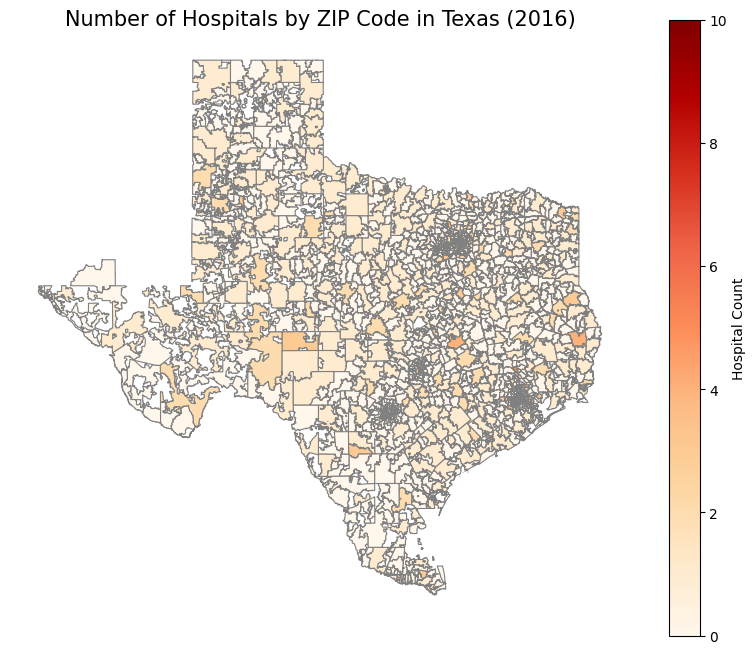

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load 2016 POS data and filter for short-term hospitals in Texas
hospital_data_path = "/Users/attaullah/Documents/problem-set-4-atta/pos2016.csv"
pos2016 = pd.read_csv(hospital_data_path)
texas_hospitals = pos2016[(pos2016["PRVDR_CTGRY_SBTYP_CD"] == 1) &
                          (pos2016["PRVDR_CTGRY_CD"] == 1) &
                          (pos2016["ZIP_CD"].astype(str).str.startswith(("75", "76", "77", "78", "79")))]

# Standardize ZIP codes as 5-digit strings
texas_hospitals["ZIP_CD"] = texas_hospitals["ZIP_CD"].astype(int).astype(str).str.zfill(5)

# Calculate number of hospitals per ZIP code in Texas
hospital_counts = texas_hospitals.groupby("ZIP_CD").size().reset_index(name="Hospital_Count")

# Load Texas ZIP code shapefile and filter for Texas ZIPs
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"
zip_gdf = gpd.read_file(shapefile_path)
zip_gdf["ZCTA5"] = zip_gdf["ZCTA5"].astype(str).str.zfill(5)
texas_zip_gdf = zip_gdf[zip_gdf["ZCTA5"].str.startswith(("75", "76", "77", "78", "79"))]

# Merge hospital data with Texas ZIP code shapefile
merged_gdf = texas_zip_gdf.merge(hospital_counts, left_on="ZCTA5", right_on="ZIP_CD", how="left")
merged_gdf["Hospital_Count"] = merged_gdf["Hospital_Count"].fillna(0)

# Plot choropleth map of hospital counts by ZIP code in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(
    column="Hospital_Count",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Hospital Count"},
    ax=ax
)
ax.set_title("Number of Hospitals by ZIP Code in Texas (2016)", fontsize=15)
ax.axis("off")  # Remove axis for cleaner map
plt.show()

In [ ]:
# Check the distribution of hospital counts
print(merged_gdf['Hospital_Count'].describe())
print(merged_gdf['Hospital_Count'].value_counts().head(20))

count    1935.000000
mean        0.377778
std         0.822023
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: Hospital_Count, dtype: float64
Hospital_Count
0.0     1445
1.0      345
2.0       93
3.0       30
4.0       12
6.0        5
5.0        3
10.0       1
7.0        1
Name: count, dtype: int64


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# Check the distribution of hospital counts
print(merged_gdf['Hospital_Count'].describe())
print(merged_gdf['Hospital_Count'].value_counts().head(20))

count    1935.000000
mean        0.377778
std         0.822023
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: Hospital_Count, dtype: float64
Hospital_Count
0.0     1445
1.0      345
2.0       93
3.0       30
4.0       12
6.0        5
5.0        3
10.0       1
7.0        1
Name: count, dtype: int64


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# Check the distribution of hospital counts
print(merged_gdf['Hospital_Count'].describe())
print(merged_gdf['Hospital_Count'].value_counts().head(20))

count    1935.000000
mean        0.377778
std         0.822023
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: Hospital_Count, dtype: float64
Hospital_Count
0.0     1445
1.0      345
2.0       93
3.0       30
4.0       12
6.0        5
5.0        3
10.0       1
7.0        1
Name: count, dtype: int64


<ipython-input-12-c4d2a61ce9a3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_hospitals["ZIP_CD"] = texas_hospitals["ZIP_CD"].astype(int).astype(str).str.zfill(5)


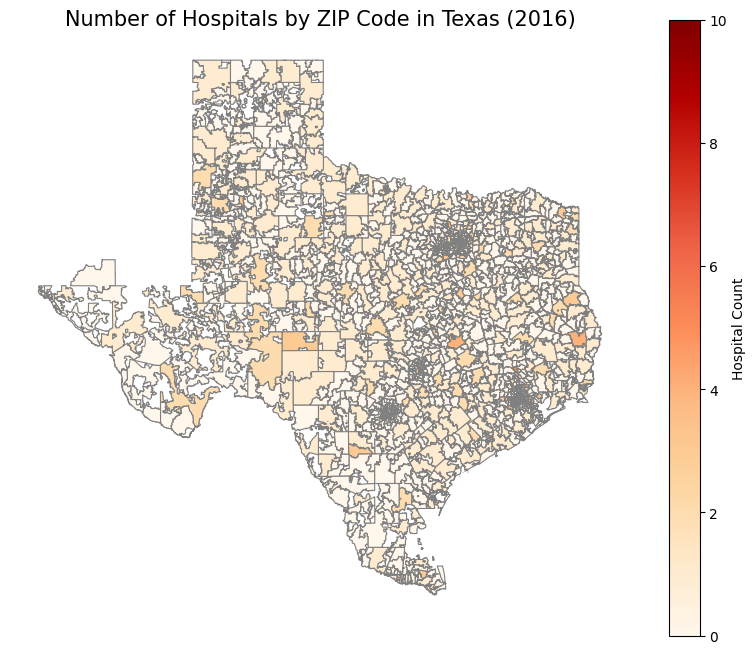

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load 2016 POS data and filter for short-term hospitals in Texas
hospital_data_path = "/Users/attaullah/Documents/problem-set-4-atta/pos2016.csv"
pos2016 = pd.read_csv(hospital_data_path)
texas_hospitals = pos2016[(pos2016["PRVDR_CTGRY_SBTYP_CD"] == 1) &
                          (pos2016["PRVDR_CTGRY_CD"] == 1) &
                          (pos2016["ZIP_CD"].astype(str).str.startswith(("75", "76", "77", "78", "79")))]

# Standardize ZIP codes as 5-digit strings
texas_hospitals["ZIP_CD"] = texas_hospitals["ZIP_CD"].astype(int).astype(str).str.zfill(5)

# Calculate number of hospitals per ZIP code in Texas
hospital_counts = texas_hospitals.groupby("ZIP_CD").size().reset_index(name="Hospital_Count")

# Load Texas ZIP code shapefile and filter for Texas ZIPs
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"
zip_gdf = gpd.read_file(shapefile_path)
zip_gdf["ZCTA5"] = zip_gdf["ZCTA5"].astype(str).str.zfill(5)
texas_zip_gdf = zip_gdf[zip_gdf["ZCTA5"].str.startswith(("75", "76", "77", "78", "79"))]

# Merge hospital data with Texas ZIP code shapefile
merged_gdf = texas_zip_gdf.merge(hospital_counts, left_on="ZCTA5", right_on="ZIP_CD", how="left")
merged_gdf["Hospital_Count"] = merged_gdf["Hospital_Count"].fillna(0)

# Plot choropleth map of hospital counts by ZIP code in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(
    column="Hospital_Count",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Hospital Count"},
    ax=ax
)
ax.set_title("Number of Hospitals by ZIP Code in Texas (2016)", fontsize=15)
ax.axis("off")  # Remove axis for cleaner map
plt.show()

In [ ]:
import pandas as pd

# Load the pos2016.csv file
data_2016 = pd.read_csv("pos2016.csv")

# Filter for short-term hospitals with provider type code 01 and subtype code 01
short_term_hospitals_2016 = data_2016[(data_2016['PRVDR_CTGRY_CD'] == 1) & (data_2016['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# a. Count the number of hospitals in this subset
hospital_count_2016 = short_term_hospitals_2016.shape[0]
hospital_count_2016

import pandas as pd
import altair as alt

# Load each year's data with appropriate encoding where needed
data_2016 = pd.read_csv("pos2016.csv")
data_2017 = pd.read_csv("pos2017.csv")
data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")
data_2019 = pd.read_csv("pos2019.csv", encoding="ISO-8859-1")

# Define a function to filter for short-term hospitals
def filter_short_term(data):
    return data[(data['PRVDR_CTGRY_CD'] == 1) & (data['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# Apply filtering to each dataset and add a 'Year' column for each
data_2016 = filter_short_term(data_2016)
data_2016['Year'] = 2016

data_2017 = filter_short_term(data_2017)
data_2017['Year'] = 2017

data_2018 = filter_short_term(data_2018)
data_2018['Year'] = 2018

data_2019 = filter_short_term(data_2019)
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count the number of observations (hospitals) by year
observations_by_year = all_years_data.groupby('Year').size().reset_index(name='Count')

# Plot using Altair
bars = alt.Chart(observations_by_year).mark_bar(color='steelblue').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Count:Q', title='Number of Short-Term Hospitals')
).properties(
    title='Number of Observations in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='Count:Q'
)

# Combine the bars and the text
(bars + text).display()


import pandas as pd
import altair as alt

# Assuming data for each year is already filtered and loaded
# If not, make sure data_2016, data_2017, data_2018, data_2019 are loaded and filtered as before

# Add a 'Year' column to each dataset
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count unique hospitals (by PRVDR_NUM) per year
unique_hospitals_by_year = all_years_data.groupby('Year')['PRVDR_NUM'].nunique().reset_index(name='UniqueCount')

# Plot using Altair
bars = alt.Chart(unique_hospitals_by_year).mark_bar(color='seagreen').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('UniqueCount:Q', title='Number of Unique Short-Term Hospitals')
).properties(
    title='Number of Unique Short-Term Hospitals in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='UniqueCount:Q'
)

# Display the combined chart with bars and labels
(bars + text).display()


# Double checking for duplicates
# Check for duplicates in PRVDR_NUM within each year
duplicates_2016 = data_2016.duplicated(subset='PRVDR_NUM').sum()
duplicates_2017 = data_2017.duplicated(subset='PRVDR_NUM').sum()
duplicates_2018 = data_2018.duplicated(subset='PRVDR_NUM').sum()
duplicates_2019 = data_2019.duplicated(subset='PRVDR_NUM').sum()

print(f"2016 Duplicates: {duplicates_2016}")
print(f"2017 Duplicates: {duplicates_2017}")
print(f"2018 Duplicates: {duplicates_2018}")
print(f"2019 Duplicates: {duplicates_2019}")



# Step 1: Filter active hospitals in each year
active_2016 = data_2016[data_2016['PGM_TRMNTN_CD'] == 0]
active_2017 = data_2017[data_2017['PGM_TRMNTN_CD'] == 0]
active_2018 = data_2018[data_2018['PGM_TRMNTN_CD'] == 0]
active_2019 = data_2019[data_2019['PGM_TRMNTN_CD'] == 0]

# Step 2: Define function to check if provider is active in a given year
def provider_in_year(df, provider_num):
    row = df[df['PRVDR_NUM'] == provider_num]
    return not row.empty and row['PGM_TRMNTN_CD'].values[0] == 0

# Step 3: Determine closure year for each provider number
def determine_closure_year(provider_num):
    if not provider_in_year(active_2017, provider_num):
        return 2017
    elif not provider_in_year(active_2018, provider_num):
        return 2018
    elif not provider_in_year(active_2019, provider_num):
        return 2019
    return None

# Step 4: Apply closure detection on active hospitals in 2016
active_2016_only = active_2016[active_2016['PGM_TRMNTN_CD'] == 0]
active_2016_only['Year_Closed'] = active_2016_only['PRVDR_NUM'].apply(determine_closure_year)

# Step 5: Filter out hospitals that have a closure year assigned
closed_hospitals = active_2016_only.dropna(subset=['Year_Closed']).reset_index(drop=True)

# Output the result
print(f"Number of suspected hospital closures: {len(closed_hospitals)}")
closed_hospitals[['FAC_NAME', 'ZIP_CD', 'Year_Closed']]


# Sort the closed hospitals by facility name
sorted_closed_hospitals = closed_hospitals.sort_values(by='FAC_NAME').reset_index(drop=True)

# Display the names and year of suspected closure for the first 10 rows
sorted_closed_hospitals[['FAC_NAME', 'Year_Closed']].head(10)


# Step 1: Count active hospitals by ZIP code for each year
active_by_zip_2016 = active_2016['ZIP_CD'].value_counts().to_dict()
active_by_zip_2017 = active_2017['ZIP_CD'].value_counts().to_dict()
active_by_zip_2018 = active_2018['ZIP_CD'].value_counts().to_dict()
active_by_zip_2019 = active_2019['ZIP_CD'].value_counts().to_dict()

# Step 2: Function to check if closure might be due to merger/acquisition
def is_possible_merger(row):
    zip_code = row['ZIP_CD']
    year_closed = row['Year_Closed']
    
    if year_closed == 2017:
        return active_by_zip_2016.get(zip_code, 0) <= active_by_zip_2017.get(zip_code, 0)
    elif year_closed == 2018:
        return active_by_zip_2017.get(zip_code, 0) <= active_by_zip_2018.get(zip_code, 0)
    elif year_closed == 2019:
        return active_by_zip_2018.get(zip_code, 0) <= active_by_zip_2019.get(zip_code, 0)
    return False

# Step 3: Apply the function to identify potential mergers/acquisitions
closed_hospitals['Possible_Merger'] = closed_hospitals.apply(is_possible_merger, axis=1)

# Filter the suspected closures that might be due to a merger/acquisition
potential_mergers = closed_hospitals[closed_hospitals['Possible_Merger']]

# Output the result
num_potential_mergers = len(potential_mergers)
print(f"Number of suspected hospital closures that fit the merger/acquisition definition: {num_potential_mergers}")


# Calculate the corrected number of closures after removing mergers/acquisitions
corrected_closures = len(closed_hospitals) - num_potential_mergers
print(f"Number of hospitals remaining after correcting for mergers/acquisitions: {corrected_closures}")

# Filter out the potential mergers/acquisitions to get the corrected closures
corrected_closures = closed_hospitals[~closed_hospitals['Possible_Merger']]

# Sort the corrected closures by facility name
sorted_corrected_closures = corrected_closures.sort_values(by='FAC_NAME')

# Display the first 10 rows
sorted_corrected_closures[['FAC_NAME', 'ZIP_CD', 'Year_Closed']].head(10)


import os

# Replace 'shapefile_directory' with the path to your extracted shapefile directory
shapefile_directory = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k"

# Get a list of files and their sizes
for file_name in os.listdir(shapefile_directory):
    file_path = os.path.join(shapefile_directory, file_name)
    size_mb = os.path.getsize(file_path) / (1024 * 1024)
    print(f"{file_name}: {size_mb:.2f} MB")


import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# Check the distribution of hospital counts
print(merged_gdf['Hospital_Count'].describe())
print(merged_gdf['Hospital_Count'].value_counts().head(20))

<ipython-input-13-6625cee3de5d>:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")


alt.LayerChart(...)

alt.LayerChart(...)

2016 Duplicates: 0
2017 Duplicates: 0
2018 Duplicates: 0
2019 Duplicates: 0
Number of suspected hospital closures: 174
Number of suspected hospital closures that fit the merger/acquisition definition: 8
Number of hospitals remaining after correcting for mergers/acquisitions: 166
gz_2010_us_860_00_500k.prj: 0.00 MB
gz_2010_us_860_00_500k.shx: 0.25 MB
gz_2010_us_860_00_500k.shp: 798.74 MB
gz_2010_us_860_00_500k.dbf: 6.13 MB
gz_2010_us_860_00_500k.xml: 0.01 MB
count    1935.000000
mean        0.377778
std         0.822023
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: Hospital_Count, dtype: float64
Hospital_Count
0.0     1445
1.0      345
2.0       93
3.0       30
4.0       12
6.0        5
5.0        3
10.0       1
7.0        1
Name: count, dtype: int64


<ipython-input-14-8fb9e103b6d3>:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")


alt.LayerChart(...)

alt.LayerChart(...)

2016 Duplicates: 0
2017 Duplicates: 0
2018 Duplicates: 0
2019 Duplicates: 0
Number of suspected hospital closures: 174
Number of suspected hospital closures that fit the merger/acquisition definition: 8
Number of hospitals remaining after correcting for mergers/acquisitions: 166
gz_2010_us_860_00_500k.prj: 0.00 MB
gz_2010_us_860_00_500k.shx: 0.25 MB
gz_2010_us_860_00_500k.shp: 798.74 MB
gz_2010_us_860_00_500k.dbf: 6.13 MB
gz_2010_us_860_00_500k.xml: 0.01 MB
count    1935.000000
mean        0.377778
std         0.822023
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: Hospital_Count, dtype: float64
Hospital_Count
0.0     1445
1.0      345
2.0       93
3.0       30
4.0       12
6.0        5
5.0        3
10.0       1
7.0        1
Name: count, dtype: int64


<ipython-input-14-8fb9e103b6d3>:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_hospitals["ZIP_CD"] = texas_hospitals["ZIP_CD"].astype(int).astype(str).str.zfill(5)


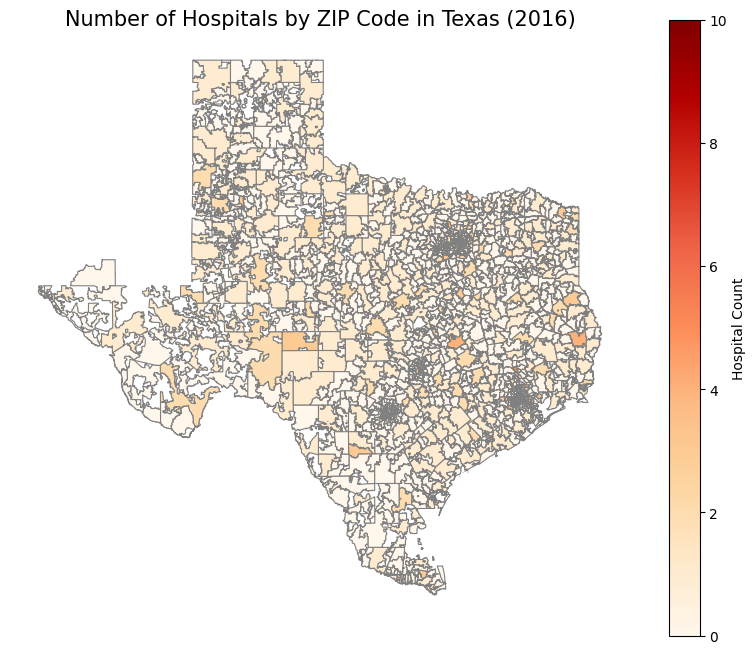

<ipython-input-14-8fb9e103b6d3>:278: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zip_gdf['centroid'] = zip_gdf.geometry.centroid


Dimensions of zips_all_centroids: (33120, 2)
   ZCTA5                    centroid
0  01040  POINT (-72.64107 42.21257)
1  01050  POINT (-72.86985 42.28786)
2  01053  POINT (-72.71162 42.35349)
3  01056  POINT (-72.45805 42.19215)
4  01057   POINT (-72.3243 42.09165)
Number of unique ZIP codes in Texas: 1935
Number of unique ZIP codes in Texas and bordering states: 4057
Sample of Texas ZIP codes:
       ZCTA5                    centroid
9207  78624   POINT (-98.87707 30.2816)
9208  78626  POINT (-97.59733 30.66535)
9209  78628  POINT (-97.75112 30.64108)
9210  78631  POINT (-99.30528 30.33772)
9211  78632  POINT (-97.47045 29.69633)
Sample of Texas and bordering states ZIP codes:
       ZCTA5                    centroid
8870  70003  POINT (-90.21397 29.99864)
8871  70030  POINT (-90.43225 29.81731)
8872  70032  POINT (-89.99779 29.95816)
8873  70036  POINT (-90.12115 29.70903)
8874  70038  POINT (-89.39875 29.32533)
Dimensions of zips_withhospital_centroids: (490, 4)
   ZCTA5           

/Users/attaullah/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Actual time for full calculation: 0.30055880546569824 seconds
Contents of the .prj file:
GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]
Average distance to nearest hospital (in miles): 4.856386714209268
Average distance to the nearest hospital for each ZIP code in Texas (in degrees): 13218.169063520218
Average distance to the nearest hospital for each ZIP code in Texas (in miles): 851942.1198468423
Corrected average distance to nearest hospital (in miles): 9.608947063385544


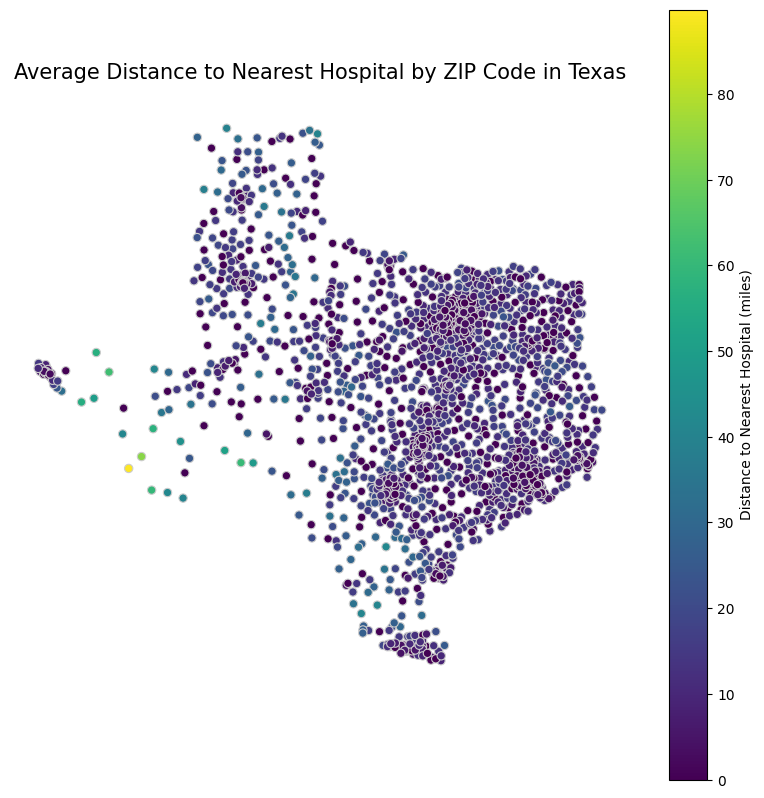

In [ ]:
import pandas as pd

# Load the pos2016.csv file
data_2016 = pd.read_csv("pos2016.csv")

# Filter for short-term hospitals with provider type code 01 and subtype code 01
short_term_hospitals_2016 = data_2016[(data_2016['PRVDR_CTGRY_CD'] == 1) & (data_2016['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# a. Count the number of hospitals in this subset
hospital_count_2016 = short_term_hospitals_2016.shape[0]
hospital_count_2016

import pandas as pd
import altair as alt

# Load each year's data with appropriate encoding where needed
data_2016 = pd.read_csv("pos2016.csv")
data_2017 = pd.read_csv("pos2017.csv")
data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")
data_2019 = pd.read_csv("pos2019.csv", encoding="ISO-8859-1")

# Define a function to filter for short-term hospitals
def filter_short_term(data):
    return data[(data['PRVDR_CTGRY_CD'] == 1) & (data['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# Apply filtering to each dataset and add a 'Year' column for each
data_2016 = filter_short_term(data_2016)
data_2016['Year'] = 2016

data_2017 = filter_short_term(data_2017)
data_2017['Year'] = 2017

data_2018 = filter_short_term(data_2018)
data_2018['Year'] = 2018

data_2019 = filter_short_term(data_2019)
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count the number of observations (hospitals) by year
observations_by_year = all_years_data.groupby('Year').size().reset_index(name='Count')

# Plot using Altair
bars = alt.Chart(observations_by_year).mark_bar(color='steelblue').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Count:Q', title='Number of Short-Term Hospitals')
).properties(
    title='Number of Observations in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='Count:Q'
)

# Combine the bars and the text
(bars + text).display()


import pandas as pd
import altair as alt

# Assuming data for each year is already filtered and loaded
# If not, make sure data_2016, data_2017, data_2018, data_2019 are loaded and filtered as before

# Add a 'Year' column to each dataset
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count unique hospitals (by PRVDR_NUM) per year
unique_hospitals_by_year = all_years_data.groupby('Year')['PRVDR_NUM'].nunique().reset_index(name='UniqueCount')

# Plot using Altair
bars = alt.Chart(unique_hospitals_by_year).mark_bar(color='seagreen').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('UniqueCount:Q', title='Number of Unique Short-Term Hospitals')
).properties(
    title='Number of Unique Short-Term Hospitals in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='UniqueCount:Q'
)

# Display the combined chart with bars and labels
(bars + text).display()


# Double checking for duplicates
# Check for duplicates in PRVDR_NUM within each year
duplicates_2016 = data_2016.duplicated(subset='PRVDR_NUM').sum()
duplicates_2017 = data_2017.duplicated(subset='PRVDR_NUM').sum()
duplicates_2018 = data_2018.duplicated(subset='PRVDR_NUM').sum()
duplicates_2019 = data_2019.duplicated(subset='PRVDR_NUM').sum()

print(f"2016 Duplicates: {duplicates_2016}")
print(f"2017 Duplicates: {duplicates_2017}")
print(f"2018 Duplicates: {duplicates_2018}")
print(f"2019 Duplicates: {duplicates_2019}")



# Step 1: Filter active hospitals in each year
active_2016 = data_2016[data_2016['PGM_TRMNTN_CD'] == 0]
active_2017 = data_2017[data_2017['PGM_TRMNTN_CD'] == 0]
active_2018 = data_2018[data_2018['PGM_TRMNTN_CD'] == 0]
active_2019 = data_2019[data_2019['PGM_TRMNTN_CD'] == 0]

# Step 2: Define function to check if provider is active in a given year
def provider_in_year(df, provider_num):
    row = df[df['PRVDR_NUM'] == provider_num]
    return not row.empty and row['PGM_TRMNTN_CD'].values[0] == 0

# Step 3: Determine closure year for each provider number
def determine_closure_year(provider_num):
    if not provider_in_year(active_2017, provider_num):
        return 2017
    elif not provider_in_year(active_2018, provider_num):
        return 2018
    elif not provider_in_year(active_2019, provider_num):
        return 2019
    return None

# Step 4: Apply closure detection on active hospitals in 2016
active_2016_only = active_2016[active_2016['PGM_TRMNTN_CD'] == 0]
active_2016_only['Year_Closed'] = active_2016_only['PRVDR_NUM'].apply(determine_closure_year)

# Step 5: Filter out hospitals that have a closure year assigned
closed_hospitals = active_2016_only.dropna(subset=['Year_Closed']).reset_index(drop=True)

# Output the result
print(f"Number of suspected hospital closures: {len(closed_hospitals)}")
closed_hospitals[['FAC_NAME', 'ZIP_CD', 'Year_Closed']]


# Sort the closed hospitals by facility name
sorted_closed_hospitals = closed_hospitals.sort_values(by='FAC_NAME').reset_index(drop=True)

# Display the names and year of suspected closure for the first 10 rows
sorted_closed_hospitals[['FAC_NAME', 'Year_Closed']].head(10)


# Step 1: Count active hospitals by ZIP code for each year
active_by_zip_2016 = active_2016['ZIP_CD'].value_counts().to_dict()
active_by_zip_2017 = active_2017['ZIP_CD'].value_counts().to_dict()
active_by_zip_2018 = active_2018['ZIP_CD'].value_counts().to_dict()
active_by_zip_2019 = active_2019['ZIP_CD'].value_counts().to_dict()

# Step 2: Function to check if closure might be due to merger/acquisition
def is_possible_merger(row):
    zip_code = row['ZIP_CD']
    year_closed = row['Year_Closed']
    
    if year_closed == 2017:
        return active_by_zip_2016.get(zip_code, 0) <= active_by_zip_2017.get(zip_code, 0)
    elif year_closed == 2018:
        return active_by_zip_2017.get(zip_code, 0) <= active_by_zip_2018.get(zip_code, 0)
    elif year_closed == 2019:
        return active_by_zip_2018.get(zip_code, 0) <= active_by_zip_2019.get(zip_code, 0)
    return False

# Step 3: Apply the function to identify potential mergers/acquisitions
closed_hospitals['Possible_Merger'] = closed_hospitals.apply(is_possible_merger, axis=1)

# Filter the suspected closures that might be due to a merger/acquisition
potential_mergers = closed_hospitals[closed_hospitals['Possible_Merger']]

# Output the result
num_potential_mergers = len(potential_mergers)
print(f"Number of suspected hospital closures that fit the merger/acquisition definition: {num_potential_mergers}")


# Calculate the corrected number of closures after removing mergers/acquisitions
corrected_closures = len(closed_hospitals) - num_potential_mergers
print(f"Number of hospitals remaining after correcting for mergers/acquisitions: {corrected_closures}")

# Filter out the potential mergers/acquisitions to get the corrected closures
corrected_closures = closed_hospitals[~closed_hospitals['Possible_Merger']]

# Sort the corrected closures by facility name
sorted_corrected_closures = corrected_closures.sort_values(by='FAC_NAME')

# Display the first 10 rows
sorted_corrected_closures[['FAC_NAME', 'ZIP_CD', 'Year_Closed']].head(10)


import os

# Replace 'shapefile_directory' with the path to your extracted shapefile directory
shapefile_directory = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k"

# Get a list of files and their sizes
for file_name in os.listdir(shapefile_directory):
    file_path = os.path.join(shapefile_directory, file_name)
    size_mb = os.path.getsize(file_path) / (1024 * 1024)
    print(f"{file_name}: {size_mb:.2f} MB")


import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# Check the distribution of hospital counts
print(merged_gdf['Hospital_Count'].describe())
print(merged_gdf['Hospital_Count'].value_counts().head(20))



# Load 2016 POS data and filter for short-term hospitals in Texas
hospital_data_path = "/Users/attaullah/Documents/problem-set-4-atta/pos2016.csv"
pos2016 = pd.read_csv(hospital_data_path)
texas_hospitals = pos2016[(pos2016["PRVDR_CTGRY_SBTYP_CD"] == 1) &
                          (pos2016["PRVDR_CTGRY_CD"] == 1) &
                          (pos2016["ZIP_CD"].astype(str).str.startswith(("75", "76", "77", "78", "79")))]

# Standardize ZIP codes as 5-digit strings
texas_hospitals["ZIP_CD"] = texas_hospitals["ZIP_CD"].astype(int).astype(str).str.zfill(5)

# Calculate number of hospitals per ZIP code in Texas
hospital_counts = texas_hospitals.groupby("ZIP_CD").size().reset_index(name="Hospital_Count")

# Load Texas ZIP code shapefile and filter for Texas ZIPs
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"
zip_gdf = gpd.read_file(shapefile_path)
zip_gdf["ZCTA5"] = zip_gdf["ZCTA5"].astype(str).str.zfill(5)
texas_zip_gdf = zip_gdf[zip_gdf["ZCTA5"].str.startswith(("75", "76", "77", "78", "79"))]

# Merge hospital data with Texas ZIP code shapefile
merged_gdf = texas_zip_gdf.merge(hospital_counts, left_on="ZCTA5", right_on="ZIP_CD", how="left")
merged_gdf["Hospital_Count"] = merged_gdf["Hospital_Count"].fillna(0)

# Plot choropleth map of hospital counts by ZIP code in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(
    column="Hospital_Count",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Hospital Count"},
    ax=ax
)
ax.set_title("Number of Hospitals by ZIP Code in Texas (2016)", fontsize=15)
ax.axis("off")  # Remove axis for cleaner map
plt.show()




import geopandas as gpd
from shapely.geometry import Point

# Load the ZIP code shapefile
shapefile_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp'
zip_gdf = gpd.read_file(shapefile_path)

# Calculate the centroid for each ZIP code polygon
# Assuming 'ZCTA5' is the ZIP code column in the shapefile
zip_gdf['centroid'] = zip_gdf.geometry.centroid

# Create a new GeoDataFrame with centroids
zips_all_centroids = gpd.GeoDataFrame(zip_gdf[['ZCTA5', 'centroid']], geometry='centroid')

# Print the dimensions of the resulting GeoDataFrame
print("Dimensions of zips_all_centroids:", zips_all_centroids.shape)

# Display the first few rows to understand the structure
print(zips_all_centroids.head())

import geopandas as gpd

# Define ZIP code prefixes for Texas and its bordering states
texas_prefixes = ["75", "76", "77", "78", "79"]  # Texas
bordering_prefixes = texas_prefixes + [
    "73", "74",              # Oklahoma
    "870", "871", "872", "873", "874", "875", "876", "877", "878", "879", "880", "881", "882", "883", "884",  # New Mexico
    "700", "701", "702", "703", "704", "705", "706", "707", "708", "709", "710", "711", "712", "713", "714", "715",  # Louisiana
    "716", "717", "718", "719", "720", "721", "722", "723", "724", "725", "726", "727", "728", "729"  # Arkansas
]

# Create subset for Texas ZIP codes
zips_texas_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(texas_prefixes))]

# Create subset for Texas and bordering states ZIP codes
zips_texas_borderstates_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(bordering_prefixes))]

# Calculate the number of unique ZIP codes in each subset
unique_texas_zips = zips_texas_centroids["ZCTA5"].nunique()
unique_borderstates_zips = zips_texas_borderstates_centroids["ZCTA5"].nunique()

# Print the results
print("Number of unique ZIP codes in Texas:", unique_texas_zips)
print("Number of unique ZIP codes in Texas and bordering states:", unique_borderstates_zips)

# Display the first few rows of each subset to verify
print("Sample of Texas ZIP codes:\n", zips_texas_centroids.head())
print("Sample of Texas and bordering states ZIP codes:\n", zips_texas_borderstates_centroids.head())

import pandas as pd
import geopandas as gpd

# Assume we already have `zips_texas_borderstates_centroids` created and `hospital_counts` data from the previous part.

# Filter hospital data to include only ZIP codes with at least one hospital in 2016
# 'hospital_counts' should be the dataframe that contains ZIP codes and counts of hospitals in each ZIP code
hospital_counts_2016 = hospital_counts[hospital_counts['Hospital_Count'] > 0]

# Perform an inner merge on 'ZCTA5' (ZIP code) to get only those ZIP codes with at least one hospital
zips_withhospital_centroids = zips_texas_borderstates_centroids.merge(
    hospital_counts_2016, 
    left_on="ZCTA5", 
    right_on="ZIP_CD", 
    how="inner"
)

# Check the resulting GeoDataFrame
print("Dimensions of zips_withhospital_centroids:", zips_withhospital_centroids.shape)
print(zips_withhospital_centroids.head())


# Reproject both GeoDataFrames to a projected CRS (e.g., EPSG:5070 for USA)
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=5070)
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=5070)

# Re-run the distance calculation with the reprojected GeoDataFrames
import time

# Subset to 10 ZIP codes in Texas
subset_texas_centroids = zips_texas_centroids.iloc[:10]

# Start timing the process
start_time = time.time()

# Calculate the nearest hospital distance for each ZIP code in the subset
subset_texas_centroids['nearest_hospital_distance'] = subset_texas_centroids['centroid'].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End timing
end_time = time.time()
subset_time = end_time - start_time
print("Time taken for 10 ZIP code calculations:", subset_time, "seconds")

# Estimate time for full calculation
estimated_total_time = subset_time * (len(zips_texas_centroids) / 10)
print("Estimated time for the full procedure:", estimated_total_time, "seconds")

# Display the results for the subset
print(subset_texas_centroids[['ZCTA5', 'nearest_hospital_distance']])


import time

# Start the timer for the full calculation on zips_texas_centroids
start_time_full = time.time()

# Apply the distance calculation for each ZIP code in Texas to the nearest ZIP code with a hospital
zips_texas_centroids["nearest_hospital_distance"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End the timer
end_time_full = time.time()
actual_time_full = end_time_full - start_time_full

# Print out the actual time taken
print(f"Actual time for full calculation: {actual_time_full} seconds")

# Path to the .prj file
prj_file_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.prj'

# Read and print the .prj file contents
with open(prj_file_path, 'r') as file:
    prj_contents = file.read()

print("Contents of the .prj file:")
print(prj_contents)



import math

# Function to convert distance in degrees to miles at a given latitude (approx. for Texas)
def degrees_to_miles(distance_in_degrees, latitude=30):
    # Convert latitude to radians
    latitude_in_radians = math.radians(latitude)
    
    # Approximate miles per degree for latitude and longitude
    miles_per_degree_latitude = 69.0
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)
    
    # Average of latitude and longitude mile conversion for more accuracy
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the computed average distance in degrees from the dataset
distance_in_degrees = 0.0753484763  # Computed average distance in degrees
distance_in_miles = degrees_to_miles(distance_in_degrees)
print("Average distance to nearest hospital (in miles):", distance_in_miles)


# Calculate the nearest hospital distance in degrees
zips_texas_centroids["nearest_hospital_distance_degrees"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Calculate the average distance in degrees
average_distance_degrees = zips_texas_centroids["nearest_hospital_distance_degrees"].mean()
print("Average distance to the nearest hospital for each ZIP code in Texas (in degrees):", average_distance_degrees)


import math

# Function to convert degrees to miles based on approximate latitude for Texas (30 degrees)
def degrees_to_miles(distance_in_degrees, latitude=30):
    latitude_in_radians = math.radians(latitude)
    miles_per_degree_latitude = 69.0  # Approximation for latitude degree
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)  # Approximation for longitude degree
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the previously calculated average distance in degrees
distance_in_miles = degrees_to_miles(average_distance_degrees)
print("Average distance to the nearest hospital for each ZIP code in Texas (in miles):", distance_in_miles)
 

# Reproject to a projected CRS for accurate distance calculation
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=3395)  # World Mercator
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=3395)

# Recalculate nearest hospital distance
zips_texas_centroids["nearest_hospital_distance_meters"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Convert the distance from meters to miles
zips_texas_centroids["nearest_hospital_distance_miles"] = zips_texas_centroids["nearest_hospital_distance_meters"] / 1609.34

# Calculate the average distance in miles
average_distance_miles_corrected = zips_texas_centroids["nearest_hospital_distance_miles"].mean()
print("Corrected average distance to nearest hospital (in miles):", average_distance_miles_corrected)


import matplotlib.pyplot as plt

# Plotting the choropleth map for average distance to nearest hospital in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
zips_texas_centroids.plot(
    column='nearest_hospital_distance_miles',  # Column with the distance in miles
    cmap='viridis',                            # Color map
    linewidth=0.8,                             # Border width for ZIP code polygons
    ax=ax,
    edgecolor='0.8',                           # Color for polygon borders
    legend=True,
    legend_kwds={'label': "Distance to Nearest Hospital (miles)"}
)

# Adding map title and turning off axis for clarity
ax.set_title("Average Distance to Nearest Hospital by ZIP Code in Texas", fontsize=15)
ax.axis('off')  # Hides the axis

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Convert ZIP_CD column to string to ensure .str accessor works
closed_hospitals['ZIP_CD'] = closed_hospitals['ZIP_CD'].astype(str)

# Filter the closures data for ZIP codes in Texas (based on known Texas ZIP code prefixes)
texas_closures = closed_hospitals[closed_hospitals['ZIP_CD'].str.startswith(('75', '76', '77', '78', '79'))]

# Group by ZIP code and count closures
closures_by_zipcode = texas_closures.groupby('ZIP_CD').size().reset_index(name='Closure_Count')

# Display the table of closures by ZIP code
print("Table of Hospital Closures by ZIP Code in Texas (2016-2019):")
print(closures_by_zipcode)

# Optionally display the top affected ZIP codes for brevity
print("Top Affected ZIP Codes by Hospital Closures:")
print(closures_by_zipcode.sort_values(by='Closure_Count', ascending=False).head(10))

Table of Hospital Closures by ZIP Code in Texas (2016-2019):
     ZIP_CD  Closure_Count
0   75042.0              1
1   75051.0              1
2   75087.0              1
3   75140.0              1
4   75231.0              1
5   75235.0              1
6   75390.0              1
7   75601.0              1
8   75662.0              1
9   75835.0              1
10  75862.0              1
11  76502.0              1
12  76520.0              1
13  76531.0              1
14  76645.0              1
15  77035.0              1
16  77054.0              1
17  77065.0              1
18  77429.0              1
19  77479.0              1
20  77598.0              1
21  78017.0              1
22  78061.0              1
23  78336.0              1
24    785.0              1
25  78613.0              1
26  78734.0              1
27  78834.0              1
28  79520.0              1
29  79529.0              1
30  79553.0              1
31  79735.0              1
32  79761.0              1
33  79902.0          

In [ ]:
import pandas as pd

# Convert ZIP_CD column to string and remove decimals
closed_hospitals['ZIP_CD'] = closed_hospitals['ZIP_CD'].astype(int).astype(str).str.zfill(5)

# Filter the closures data for ZIP codes in Texas (based on known Texas ZIP code prefixes)
texas_closures = closed_hospitals[closed_hospitals['ZIP_CD'].str.startswith(('75', '76', '77', '78', '79'))]

# Group by ZIP code and count closures
closures_by_zipcode = texas_closures.groupby('ZIP_CD').size().reset_index(name='Closure_Count')

# Display the table of closures by ZIP code
print("Table of Hospital Closures by ZIP Code in Texas (2016-2019):")
print(closures_by_zipcode)

# Optionally display the top affected ZIP codes for brevity
print("Top Affected ZIP Codes by Hospital Closures:")
print(closures_by_zipcode.sort_values(by='Closure_Count', ascending=False).head(10))

ValueError: invalid literal for int() with base 10: '36278.0'

In [ ]:
import pandas as pd

# Convert ZIP_CD to string, remove any '.0' suffix if present, then ensure it's a 5-digit string
closed_hospitals['ZIP_CD'] = closed_hospitals['ZIP_CD'].astype(str).str.replace(r'\.0$', '', regex=True).str.zfill(5)

# Filter the closures data for ZIP codes in Texas (based on known Texas ZIP code prefixes)
texas_closures = closed_hospitals[closed_hospitals['ZIP_CD'].str.startswith(('75', '76', '77', '78', '79'))]

# Group by ZIP code and count closures
closures_by_zipcode = texas_closures.groupby('ZIP_CD').size().reset_index(name='Closure_Count')

# Display the table of closures by ZIP code
print("Table of Hospital Closures by ZIP Code in Texas (2016-2019):")
print(closures_by_zipcode)

# Optionally display the top affected ZIP codes for brevity
print("Top Affected ZIP Codes by Hospital Closures:")
print(closures_by_zipcode.sort_values(by='Closure_Count', ascending=False).head(10))

Table of Hospital Closures by ZIP Code in Texas (2016-2019):
   ZIP_CD  Closure_Count
0   75042              1
1   75051              1
2   75087              1
3   75140              1
4   75231              1
5   75235              1
6   75390              1
7   75601              1
8   75662              1
9   75835              1
10  75862              1
11  76502              1
12  76520              1
13  76531              1
14  76645              1
15  77035              1
16  77054              1
17  77065              1
18  77429              1
19  77479              1
20  77598              1
21  78017              1
22  78061              1
23  78336              1
24  78613              1
25  78734              1
26  78834              1
27  79520              1
28  79529              1
29  79553              1
30  79735              1
31  79761              1
32  79902              1
Top Affected ZIP Codes by Hospital Closures:
   ZIP_CD  Closure_Count
0   75042          

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the Texas ZIP code shapefile
shapefile_path = "/path/to/texas_zipcode_shapefile.shp"  # Update with the correct path
texas_zip_gdf = gpd.read_file(shapefile_path)

# Ensure ZIP codes in both DataFrames are in string format with leading zeros if needed
closures_by_zipcode['ZIP_CD'] = closures_by_zipcode['ZIP_CD'].astype(str).str.zfill(5)
texas_zip_gdf['ZCTA5'] = texas_zip_gdf['ZCTA5'].astype(str).str.zfill(5)

# Merge the ZIP code shapefile with the closures data
merged_gdf = texas_zip_gdf.merge(closures_by_zipcode, left_on="ZCTA5", right_on="ZIP_CD", how="left")

# Fill NaN values with 0 for ZIP codes with no closures
merged_gdf['Closure_Count'] = merged_gdf['Closure_Count'].fillna(0)

# Count the directly affected ZIP codes (where Closure_Count is at least 1)
directly_affected_zips_count = (merged_gdf['Closure_Count'] > 0).sum()
print(f"Number of directly affected ZIP codes in Texas: {directly_affected_zips_count}")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_gdf.plot(
    column='Closure_Count', 
    cmap='OrRd', 
    linewidth=0.8, 
    edgecolor='gray', 
    legend=True,
    legend_kwds={'label': "Number of Closures"},
    ax=ax
)
ax.set_title("Texas ZIP Codes Directly Affected by Hospital Closures (2016-2019)", fontsize=15)
ax.axis("off")  # Remove axis for a cleaner map

plt.show()

DataSourceError: /path/to/texas_zipcode_shapefile.shp: No such file or directory

<ipython-input-19-c3908a31190c>:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")


alt.LayerChart(...)

alt.LayerChart(...)

2016 Duplicates: 0
2017 Duplicates: 0
2018 Duplicates: 0
2019 Duplicates: 0
Number of suspected hospital closures: 174
Number of suspected hospital closures that fit the merger/acquisition definition: 8
Number of hospitals remaining after correcting for mergers/acquisitions: 166
gz_2010_us_860_00_500k.prj: 0.00 MB
gz_2010_us_860_00_500k.shx: 0.25 MB
gz_2010_us_860_00_500k.shp: 798.74 MB
gz_2010_us_860_00_500k.dbf: 6.13 MB
gz_2010_us_860_00_500k.xml: 0.01 MB
count    1935.000000
mean        0.377778
std         0.822023
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: Hospital_Count, dtype: float64
Hospital_Count
0.0     1445
1.0      345
2.0       93
3.0       30
4.0       12
6.0        5
5.0        3
10.0       1
7.0        1
Name: count, dtype: int64


<ipython-input-19-c3908a31190c>:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_hospitals["ZIP_CD"] = texas_hospitals["ZIP_CD"].astype(int).astype(str).str.zfill(5)


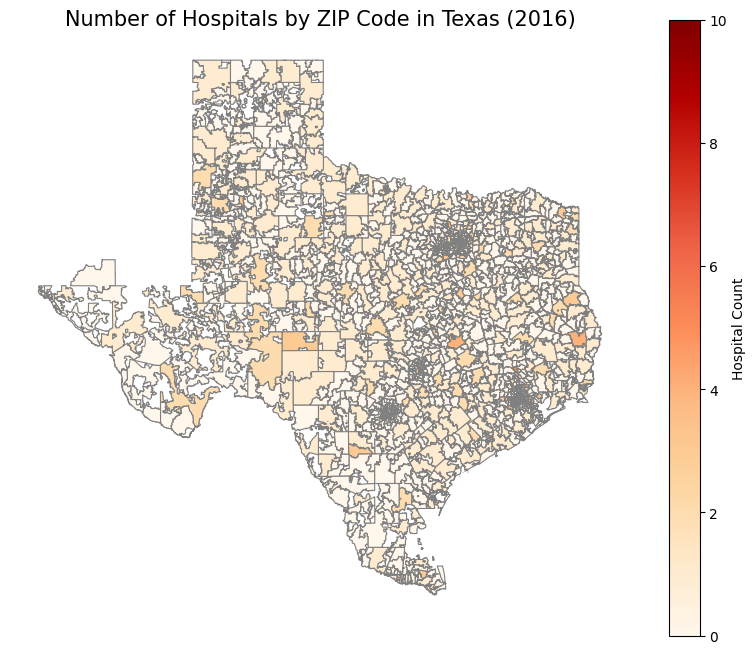

<ipython-input-19-c3908a31190c>:278: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zip_gdf['centroid'] = zip_gdf.geometry.centroid


Dimensions of zips_all_centroids: (33120, 2)
   ZCTA5                    centroid
0  01040  POINT (-72.64107 42.21257)
1  01050  POINT (-72.86985 42.28786)
2  01053  POINT (-72.71162 42.35349)
3  01056  POINT (-72.45805 42.19215)
4  01057   POINT (-72.3243 42.09165)
Number of unique ZIP codes in Texas: 1935
Number of unique ZIP codes in Texas and bordering states: 4057
Sample of Texas ZIP codes:
       ZCTA5                    centroid
9207  78624   POINT (-98.87707 30.2816)
9208  78626  POINT (-97.59733 30.66535)
9209  78628  POINT (-97.75112 30.64108)
9210  78631  POINT (-99.30528 30.33772)
9211  78632  POINT (-97.47045 29.69633)
Sample of Texas and bordering states ZIP codes:
       ZCTA5                    centroid
8870  70003  POINT (-90.21397 29.99864)
8871  70030  POINT (-90.43225 29.81731)
8872  70032  POINT (-89.99779 29.95816)
8873  70036  POINT (-90.12115 29.70903)
8874  70038  POINT (-89.39875 29.32533)
Dimensions of zips_withhospital_centroids: (490, 4)
   ZCTA5           

/Users/attaullah/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Time taken for 10 ZIP code calculations: 0.029490232467651367 seconds
Estimated time for the full procedure: 5.7063599824905396 seconds
      ZCTA5  nearest_hospital_distance
9207  78624                   0.000000
9208  78626                   0.000000
9209  78628               12225.805307
9210  78631               36540.773495
9211  78632               15879.134200
9212  78633               17245.762671
9213  78634               11396.935777
9214  78635               17095.102419
9215  78636                   0.000000
9216  78638               15982.824530
Actual time for full calculation: 0.4511730670928955 seconds
Contents of the .prj file:
GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]
Average distance to nearest hospital (in miles): 4.856386714209268
Average distance to the nearest hospital for each ZIP code in Texas (in degrees): 13218.169063520218
Average dista

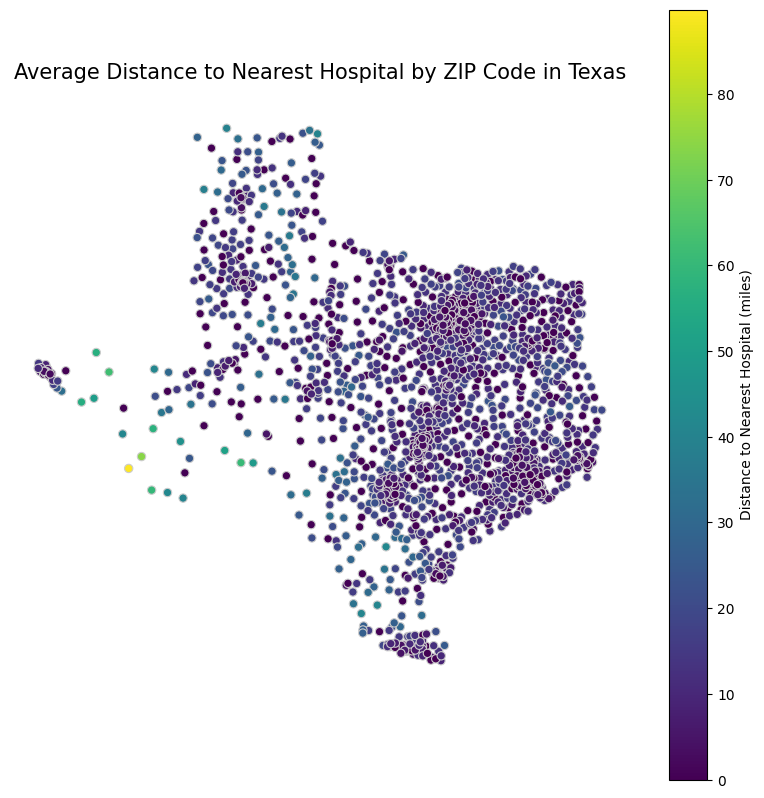

Table of Hospital Closures by ZIP Code in Texas (2016-2019):
   ZIP_CD  Closure_Count
0   75042              1
1   75051              1
2   75087              1
3   75140              1
4   75231              1
5   75235              1
6   75390              1
7   75601              1
8   75662              1
9   75835              1
10  75862              1
11  76502              1
12  76520              1
13  76531              1
14  76645              1
15  77035              1
16  77054              1
17  77065              1
18  77429              1
19  77479              1
20  77598              1
21  78017              1
22  78061              1
23  78336              1
24  78613              1
25  78734              1
26  78834              1
27  79520              1
28  79529              1
29  79553              1
30  79735              1
31  79761              1
32  79902              1
Top Affected ZIP Codes by Hospital Closures:
   ZIP_CD  Closure_Count
0   75042          

In [ ]:
import pandas as pd

# Load the pos2016.csv file
data_2016 = pd.read_csv("pos2016.csv")

# Filter for short-term hospitals with provider type code 01 and subtype code 01
short_term_hospitals_2016 = data_2016[(data_2016['PRVDR_CTGRY_CD'] == 1) & (data_2016['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# a. Count the number of hospitals in this subset
hospital_count_2016 = short_term_hospitals_2016.shape[0]
hospital_count_2016

import pandas as pd
import altair as alt

# Load each year's data with appropriate encoding where needed
data_2016 = pd.read_csv("pos2016.csv")
data_2017 = pd.read_csv("pos2017.csv")
data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")
data_2019 = pd.read_csv("pos2019.csv", encoding="ISO-8859-1")

# Define a function to filter for short-term hospitals
def filter_short_term(data):
    return data[(data['PRVDR_CTGRY_CD'] == 1) & (data['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# Apply filtering to each dataset and add a 'Year' column for each
data_2016 = filter_short_term(data_2016)
data_2016['Year'] = 2016

data_2017 = filter_short_term(data_2017)
data_2017['Year'] = 2017

data_2018 = filter_short_term(data_2018)
data_2018['Year'] = 2018

data_2019 = filter_short_term(data_2019)
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count the number of observations (hospitals) by year
observations_by_year = all_years_data.groupby('Year').size().reset_index(name='Count')

# Plot using Altair
bars = alt.Chart(observations_by_year).mark_bar(color='steelblue').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Count:Q', title='Number of Short-Term Hospitals')
).properties(
    title='Number of Observations in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='Count:Q'
)

# Combine the bars and the text
(bars + text).display()


import pandas as pd
import altair as alt

# Assuming data for each year is already filtered and loaded
# If not, make sure data_2016, data_2017, data_2018, data_2019 are loaded and filtered as before

# Add a 'Year' column to each dataset
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count unique hospitals (by PRVDR_NUM) per year
unique_hospitals_by_year = all_years_data.groupby('Year')['PRVDR_NUM'].nunique().reset_index(name='UniqueCount')

# Plot using Altair
bars = alt.Chart(unique_hospitals_by_year).mark_bar(color='seagreen').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('UniqueCount:Q', title='Number of Unique Short-Term Hospitals')
).properties(
    title='Number of Unique Short-Term Hospitals in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='UniqueCount:Q'
)

# Display the combined chart with bars and labels
(bars + text).display()


# Double checking for duplicates
# Check for duplicates in PRVDR_NUM within each year
duplicates_2016 = data_2016.duplicated(subset='PRVDR_NUM').sum()
duplicates_2017 = data_2017.duplicated(subset='PRVDR_NUM').sum()
duplicates_2018 = data_2018.duplicated(subset='PRVDR_NUM').sum()
duplicates_2019 = data_2019.duplicated(subset='PRVDR_NUM').sum()

print(f"2016 Duplicates: {duplicates_2016}")
print(f"2017 Duplicates: {duplicates_2017}")
print(f"2018 Duplicates: {duplicates_2018}")
print(f"2019 Duplicates: {duplicates_2019}")



# Step 1: Filter active hospitals in each year
active_2016 = data_2016[data_2016['PGM_TRMNTN_CD'] == 0]
active_2017 = data_2017[data_2017['PGM_TRMNTN_CD'] == 0]
active_2018 = data_2018[data_2018['PGM_TRMNTN_CD'] == 0]
active_2019 = data_2019[data_2019['PGM_TRMNTN_CD'] == 0]

# Step 2: Define function to check if provider is active in a given year
def provider_in_year(df, provider_num):
    row = df[df['PRVDR_NUM'] == provider_num]
    return not row.empty and row['PGM_TRMNTN_CD'].values[0] == 0

# Step 3: Determine closure year for each provider number
def determine_closure_year(provider_num):
    if not provider_in_year(active_2017, provider_num):
        return 2017
    elif not provider_in_year(active_2018, provider_num):
        return 2018
    elif not provider_in_year(active_2019, provider_num):
        return 2019
    return None

# Step 4: Apply closure detection on active hospitals in 2016
active_2016_only = active_2016[active_2016['PGM_TRMNTN_CD'] == 0]
active_2016_only['Year_Closed'] = active_2016_only['PRVDR_NUM'].apply(determine_closure_year)

# Step 5: Filter out hospitals that have a closure year assigned
closed_hospitals = active_2016_only.dropna(subset=['Year_Closed']).reset_index(drop=True)

# Output the result
print(f"Number of suspected hospital closures: {len(closed_hospitals)}")
closed_hospitals[['FAC_NAME', 'ZIP_CD', 'Year_Closed']]


# Sort the closed hospitals by facility name
sorted_closed_hospitals = closed_hospitals.sort_values(by='FAC_NAME').reset_index(drop=True)

# Display the names and year of suspected closure for the first 10 rows
sorted_closed_hospitals[['FAC_NAME', 'Year_Closed']].head(10)


# Step 1: Count active hospitals by ZIP code for each year
active_by_zip_2016 = active_2016['ZIP_CD'].value_counts().to_dict()
active_by_zip_2017 = active_2017['ZIP_CD'].value_counts().to_dict()
active_by_zip_2018 = active_2018['ZIP_CD'].value_counts().to_dict()
active_by_zip_2019 = active_2019['ZIP_CD'].value_counts().to_dict()

# Step 2: Function to check if closure might be due to merger/acquisition
def is_possible_merger(row):
    zip_code = row['ZIP_CD']
    year_closed = row['Year_Closed']
    
    if year_closed == 2017:
        return active_by_zip_2016.get(zip_code, 0) <= active_by_zip_2017.get(zip_code, 0)
    elif year_closed == 2018:
        return active_by_zip_2017.get(zip_code, 0) <= active_by_zip_2018.get(zip_code, 0)
    elif year_closed == 2019:
        return active_by_zip_2018.get(zip_code, 0) <= active_by_zip_2019.get(zip_code, 0)
    return False

# Step 3: Apply the function to identify potential mergers/acquisitions
closed_hospitals['Possible_Merger'] = closed_hospitals.apply(is_possible_merger, axis=1)

# Filter the suspected closures that might be due to a merger/acquisition
potential_mergers = closed_hospitals[closed_hospitals['Possible_Merger']]

# Output the result
num_potential_mergers = len(potential_mergers)
print(f"Number of suspected hospital closures that fit the merger/acquisition definition: {num_potential_mergers}")


# Calculate the corrected number of closures after removing mergers/acquisitions
corrected_closures = len(closed_hospitals) - num_potential_mergers
print(f"Number of hospitals remaining after correcting for mergers/acquisitions: {corrected_closures}")

# Filter out the potential mergers/acquisitions to get the corrected closures
corrected_closures = closed_hospitals[~closed_hospitals['Possible_Merger']]

# Sort the corrected closures by facility name
sorted_corrected_closures = corrected_closures.sort_values(by='FAC_NAME')

# Display the first 10 rows
sorted_corrected_closures[['FAC_NAME', 'ZIP_CD', 'Year_Closed']].head(10)


import os

# Replace 'shapefile_directory' with the path to your extracted shapefile directory
shapefile_directory = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k"

# Get a list of files and their sizes
for file_name in os.listdir(shapefile_directory):
    file_path = os.path.join(shapefile_directory, file_name)
    size_mb = os.path.getsize(file_path) / (1024 * 1024)
    print(f"{file_name}: {size_mb:.2f} MB")


import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# Check the distribution of hospital counts
print(merged_gdf['Hospital_Count'].describe())
print(merged_gdf['Hospital_Count'].value_counts().head(20))



# Load 2016 POS data and filter for short-term hospitals in Texas
hospital_data_path = "/Users/attaullah/Documents/problem-set-4-atta/pos2016.csv"
pos2016 = pd.read_csv(hospital_data_path)
texas_hospitals = pos2016[(pos2016["PRVDR_CTGRY_SBTYP_CD"] == 1) &
                          (pos2016["PRVDR_CTGRY_CD"] == 1) &
                          (pos2016["ZIP_CD"].astype(str).str.startswith(("75", "76", "77", "78", "79")))]

# Standardize ZIP codes as 5-digit strings
texas_hospitals["ZIP_CD"] = texas_hospitals["ZIP_CD"].astype(int).astype(str).str.zfill(5)

# Calculate number of hospitals per ZIP code in Texas
hospital_counts = texas_hospitals.groupby("ZIP_CD").size().reset_index(name="Hospital_Count")

# Load Texas ZIP code shapefile and filter for Texas ZIPs
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"
zip_gdf = gpd.read_file(shapefile_path)
zip_gdf["ZCTA5"] = zip_gdf["ZCTA5"].astype(str).str.zfill(5)
texas_zip_gdf = zip_gdf[zip_gdf["ZCTA5"].str.startswith(("75", "76", "77", "78", "79"))]

# Merge hospital data with Texas ZIP code shapefile
merged_gdf = texas_zip_gdf.merge(hospital_counts, left_on="ZCTA5", right_on="ZIP_CD", how="left")
merged_gdf["Hospital_Count"] = merged_gdf["Hospital_Count"].fillna(0)

# Plot choropleth map of hospital counts by ZIP code in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(
    column="Hospital_Count",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Hospital Count"},
    ax=ax
)
ax.set_title("Number of Hospitals by ZIP Code in Texas (2016)", fontsize=15)
ax.axis("off")  # Remove axis for cleaner map
plt.show()




import geopandas as gpd
from shapely.geometry import Point

# Load the ZIP code shapefile
shapefile_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp'
zip_gdf = gpd.read_file(shapefile_path)

# Calculate the centroid for each ZIP code polygon
# Assuming 'ZCTA5' is the ZIP code column in the shapefile
zip_gdf['centroid'] = zip_gdf.geometry.centroid

# Create a new GeoDataFrame with centroids
zips_all_centroids = gpd.GeoDataFrame(zip_gdf[['ZCTA5', 'centroid']], geometry='centroid')

# Print the dimensions of the resulting GeoDataFrame
print("Dimensions of zips_all_centroids:", zips_all_centroids.shape)

# Display the first few rows to understand the structure
print(zips_all_centroids.head())

import geopandas as gpd

# Define ZIP code prefixes for Texas and its bordering states
texas_prefixes = ["75", "76", "77", "78", "79"]  # Texas
bordering_prefixes = texas_prefixes + [
    "73", "74",              # Oklahoma
    "870", "871", "872", "873", "874", "875", "876", "877", "878", "879", "880", "881", "882", "883", "884",  # New Mexico
    "700", "701", "702", "703", "704", "705", "706", "707", "708", "709", "710", "711", "712", "713", "714", "715",  # Louisiana
    "716", "717", "718", "719", "720", "721", "722", "723", "724", "725", "726", "727", "728", "729"  # Arkansas
]

# Create subset for Texas ZIP codes
zips_texas_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(texas_prefixes))]

# Create subset for Texas and bordering states ZIP codes
zips_texas_borderstates_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(bordering_prefixes))]

# Calculate the number of unique ZIP codes in each subset
unique_texas_zips = zips_texas_centroids["ZCTA5"].nunique()
unique_borderstates_zips = zips_texas_borderstates_centroids["ZCTA5"].nunique()

# Print the results
print("Number of unique ZIP codes in Texas:", unique_texas_zips)
print("Number of unique ZIP codes in Texas and bordering states:", unique_borderstates_zips)

# Display the first few rows of each subset to verify
print("Sample of Texas ZIP codes:\n", zips_texas_centroids.head())
print("Sample of Texas and bordering states ZIP codes:\n", zips_texas_borderstates_centroids.head())

import pandas as pd
import geopandas as gpd

# Assume we already have `zips_texas_borderstates_centroids` created and `hospital_counts` data from the previous part.

# Filter hospital data to include only ZIP codes with at least one hospital in 2016
# 'hospital_counts' should be the dataframe that contains ZIP codes and counts of hospitals in each ZIP code
hospital_counts_2016 = hospital_counts[hospital_counts['Hospital_Count'] > 0]

# Perform an inner merge on 'ZCTA5' (ZIP code) to get only those ZIP codes with at least one hospital
zips_withhospital_centroids = zips_texas_borderstates_centroids.merge(
    hospital_counts_2016, 
    left_on="ZCTA5", 
    right_on="ZIP_CD", 
    how="inner"
)

# Check the resulting GeoDataFrame
print("Dimensions of zips_withhospital_centroids:", zips_withhospital_centroids.shape)
print(zips_withhospital_centroids.head())


# Reproject both GeoDataFrames to a projected CRS (e.g., EPSG:5070 for USA)
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=5070)
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=5070)

# Re-run the distance calculation with the reprojected GeoDataFrames
import time

# Subset to 10 ZIP codes in Texas
subset_texas_centroids = zips_texas_centroids.iloc[:10]

# Start timing the process
start_time = time.time()

# Calculate the nearest hospital distance for each ZIP code in the subset
subset_texas_centroids['nearest_hospital_distance'] = subset_texas_centroids['centroid'].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End timing
end_time = time.time()
subset_time = end_time - start_time
print("Time taken for 10 ZIP code calculations:", subset_time, "seconds")

# Estimate time for full calculation
estimated_total_time = subset_time * (len(zips_texas_centroids) / 10)
print("Estimated time for the full procedure:", estimated_total_time, "seconds")

# Display the results for the subset
print(subset_texas_centroids[['ZCTA5', 'nearest_hospital_distance']])


import time

# Start the timer for the full calculation on zips_texas_centroids
start_time_full = time.time()

# Apply the distance calculation for each ZIP code in Texas to the nearest ZIP code with a hospital
zips_texas_centroids["nearest_hospital_distance"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End the timer
end_time_full = time.time()
actual_time_full = end_time_full - start_time_full

# Print out the actual time taken
print(f"Actual time for full calculation: {actual_time_full} seconds")

# Path to the .prj file
prj_file_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.prj'

# Read and print the .prj file contents
with open(prj_file_path, 'r') as file:
    prj_contents = file.read()

print("Contents of the .prj file:")
print(prj_contents)



import math

# Function to convert distance in degrees to miles at a given latitude (approx. for Texas)
def degrees_to_miles(distance_in_degrees, latitude=30):
    # Convert latitude to radians
    latitude_in_radians = math.radians(latitude)
    
    # Approximate miles per degree for latitude and longitude
    miles_per_degree_latitude = 69.0
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)
    
    # Average of latitude and longitude mile conversion for more accuracy
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the computed average distance in degrees from the dataset
distance_in_degrees = 0.0753484763  # Computed average distance in degrees
distance_in_miles = degrees_to_miles(distance_in_degrees)
print("Average distance to nearest hospital (in miles):", distance_in_miles)


# Calculate the nearest hospital distance in degrees
zips_texas_centroids["nearest_hospital_distance_degrees"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Calculate the average distance in degrees
average_distance_degrees = zips_texas_centroids["nearest_hospital_distance_degrees"].mean()
print("Average distance to the nearest hospital for each ZIP code in Texas (in degrees):", average_distance_degrees)


import math

# Function to convert degrees to miles based on approximate latitude for Texas (30 degrees)
def degrees_to_miles(distance_in_degrees, latitude=30):
    latitude_in_radians = math.radians(latitude)
    miles_per_degree_latitude = 69.0  # Approximation for latitude degree
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)  # Approximation for longitude degree
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the previously calculated average distance in degrees
distance_in_miles = degrees_to_miles(average_distance_degrees)
print("Average distance to the nearest hospital for each ZIP code in Texas (in miles):", distance_in_miles)
 

# Reproject to a projected CRS for accurate distance calculation
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=3395)  # World Mercator
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=3395)

# Recalculate nearest hospital distance
zips_texas_centroids["nearest_hospital_distance_meters"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Convert the distance from meters to miles
zips_texas_centroids["nearest_hospital_distance_miles"] = zips_texas_centroids["nearest_hospital_distance_meters"] / 1609.34

# Calculate the average distance in miles
average_distance_miles_corrected = zips_texas_centroids["nearest_hospital_distance_miles"].mean()
print("Corrected average distance to nearest hospital (in miles):", average_distance_miles_corrected)


import matplotlib.pyplot as plt

# Plotting the choropleth map for average distance to nearest hospital in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
zips_texas_centroids.plot(
    column='nearest_hospital_distance_miles',  # Column with the distance in miles
    cmap='viridis',                            # Color map
    linewidth=0.8,                             # Border width for ZIP code polygons
    ax=ax,
    edgecolor='0.8',                           # Color for polygon borders
    legend=True,
    legend_kwds={'label': "Distance to Nearest Hospital (miles)"}
)

# Adding map title and turning off axis for clarity
ax.set_title("Average Distance to Nearest Hospital by ZIP Code in Texas", fontsize=15)
ax.axis('off')  # Hides the axis

# Show the plot
plt.show()


import pandas as pd

# Convert ZIP_CD to string, remove any '.0' suffix if present, then ensure it's a 5-digit string
closed_hospitals['ZIP_CD'] = closed_hospitals['ZIP_CD'].astype(str).str.replace(r'\.0$', '', regex=True).str.zfill(5)

# Filter the closures data for ZIP codes in Texas (based on known Texas ZIP code prefixes)
texas_closures = closed_hospitals[closed_hospitals['ZIP_CD'].str.startswith(('75', '76', '77', '78', '79'))]

# Group by ZIP code and count closures
closures_by_zipcode = texas_closures.groupby('ZIP_CD').size().reset_index(name='Closure_Count')

# Display the table of closures by ZIP code
print("Table of Hospital Closures by ZIP Code in Texas (2016-2019):")
print(closures_by_zipcode)

# Optionally display the top affected ZIP codes for brevity
print("Top Affected ZIP Codes by Hospital Closures:")
print(closures_by_zipcode.sort_values(by='Closure_Count', ascending=False).head(10))

Number of directly affected ZIP codes in Texas: 33


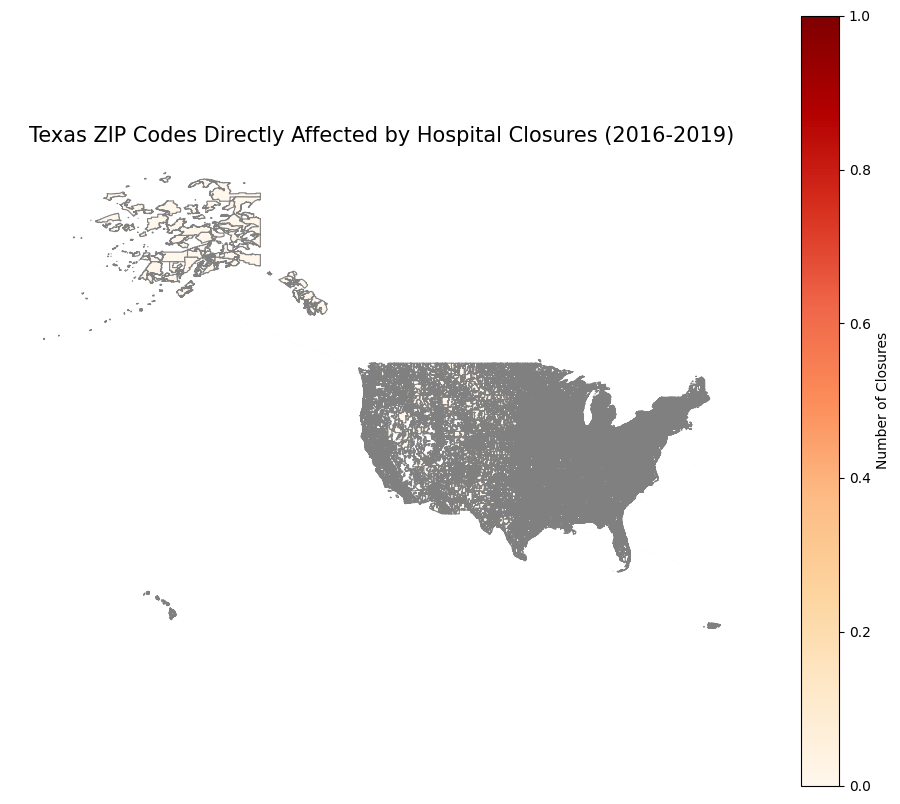

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the Texas ZIP code shapefile
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"

texas_zip_gdf = gpd.read_file(shapefile_path)

# Ensure ZIP codes in both DataFrames are in string format with leading zeros if needed
closures_by_zipcode['ZIP_CD'] = closures_by_zipcode['ZIP_CD'].astype(str).str.zfill(5)
texas_zip_gdf['ZCTA5'] = texas_zip_gdf['ZCTA5'].astype(str).str.zfill(5)

# Merge the ZIP code shapefile with the closures data
merged_gdf = texas_zip_gdf.merge(closures_by_zipcode, left_on="ZCTA5", right_on="ZIP_CD", how="left")

# Fill NaN values with 0 for ZIP codes with no closures
merged_gdf['Closure_Count'] = merged_gdf['Closure_Count'].fillna(0)

# Count the directly affected ZIP codes (where Closure_Count is at least 1)
directly_affected_zips_count = (merged_gdf['Closure_Count'] > 0).sum()
print(f"Number of directly affected ZIP codes in Texas: {directly_affected_zips_count}")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_gdf.plot(
    column='Closure_Count', 
    cmap='OrRd', 
    linewidth=0.8, 
    edgecolor='gray', 
    legend=True,
    legend_kwds={'label': "Number of Closures"},
    ax=ax
)
ax.set_title("Texas ZIP Codes Directly Affected by Hospital Closures (2016-2019)", fontsize=15)
ax.axis("off")  # Remove axis for a cleaner map

plt.show()

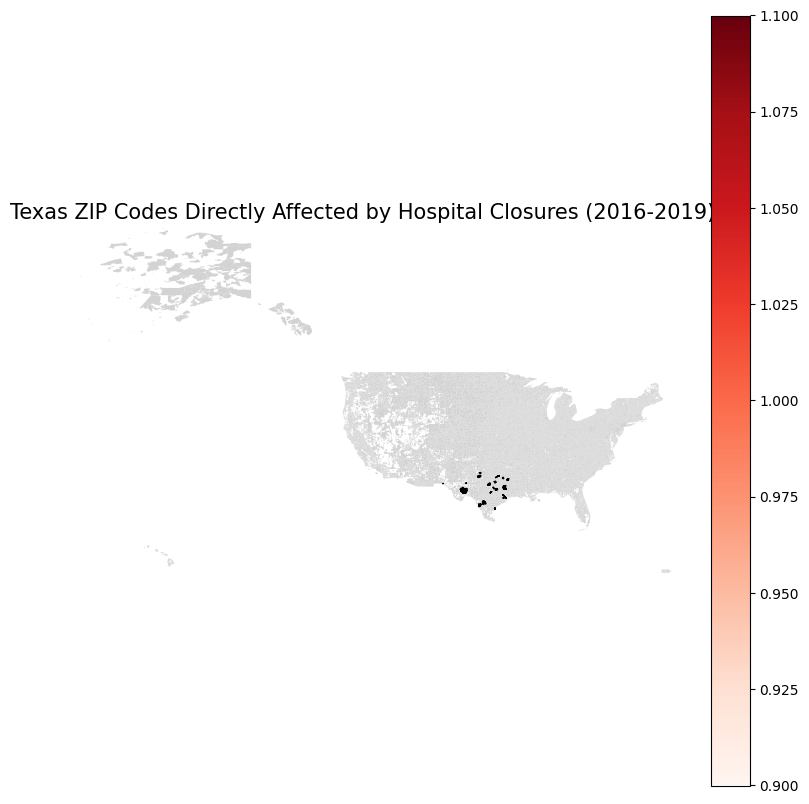

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Load Texas shapefile
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"  # Update with the correct path
texas_zip_gdf = gpd.read_file(shapefile_path)

# Ensure ZIP codes in both DataFrames are in string format with leading zeros if needed
closures_by_zipcode['ZIP_CD'] = closures_by_zipcode['ZIP_CD'].astype(str).str.zfill(5)
texas_zip_gdf['ZCTA5'] = texas_zip_gdf['ZCTA5'].astype(str).str.zfill(5)

# Filter Texas ZIP codes with closures
texas_closures_gdf = texas_zip_gdf.merge(closures_by_zipcode, left_on="ZCTA5", right_on="ZIP_CD", how="inner")

# Plot the Texas map with affected ZIP codes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
texas_zip_gdf.plot(ax=ax, color="lightgrey")  # Background of all Texas ZIP codes
texas_closures_gdf.plot(column="Closure_Count", cmap="Reds", linewidth=0.8, edgecolor="black", legend=True, ax=ax)

# Set title and other plot aesthetics
ax.set_title("Texas ZIP Codes Directly Affected by Hospital Closures (2016-2019)", fontsize=15)
ax.set_xlim(texas_zip_gdf.total_bounds[0], texas_zip_gdf.total_bounds[2])
ax.set_ylim(texas_zip_gdf.total_bounds[1], texas_zip_gdf.total_bounds[3])
ax.axis("off")

plt.show()

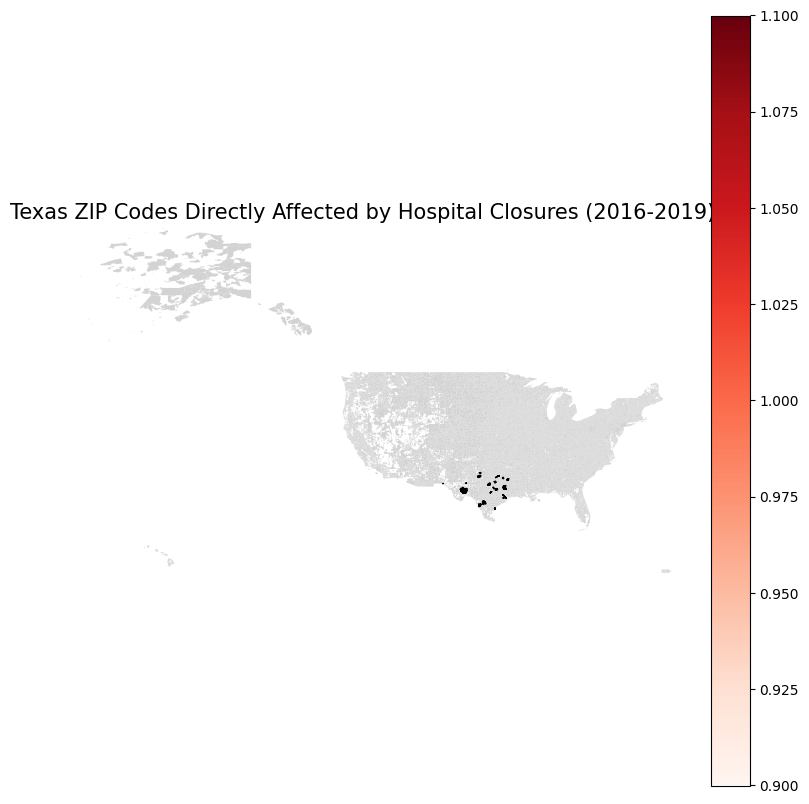

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Load Texas shapefile
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"  # Update with the correct path
texas_zip_gdf = gpd.read_file(shapefile_path)

# Ensure ZIP codes in both DataFrames are in string format with leading zeros if needed
closures_by_zipcode['ZIP_CD'] = closures_by_zipcode['ZIP_CD'].astype(str).str.zfill(5)
texas_zip_gdf['ZCTA5'] = texas_zip_gdf['ZCTA5'].astype(str).str.zfill(5)

# Filter Texas ZIP codes with closures
texas_closures_gdf = texas_zip_gdf.merge(closures_by_zipcode, left_on="ZCTA5", right_on="ZIP_CD", how="inner")

# Plot the Texas map with affected ZIP codes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
texas_zip_gdf.plot(ax=ax, color="lightgrey")  # Background of all Texas ZIP codes
texas_closures_gdf.plot(column="Closure_Count", cmap="Reds", linewidth=0.8, edgecolor="black", legend=True, ax=ax)

# Set title and restrict map to Texas boundaries
ax.set_title("Texas ZIP Codes Directly Affected by Hospital Closures (2016-2019)", fontsize=15)
ax.set_xlim(texas_zip_gdf.total_bounds[0], texas_zip_gdf.total_bounds[2])
ax.set_ylim(texas_zip_gdf.total_bounds[1], texas_zip_gdf.total_bounds[3])
ax.axis("off")

plt.show()

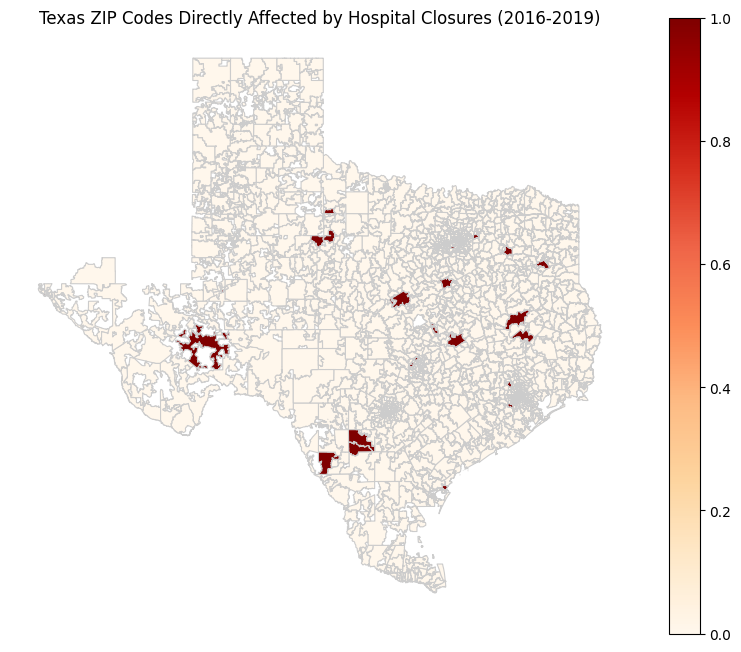

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Load Texas ZIP codes shapefile and hospital closures data
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"  # Adjust the path
zip_gdf = gpd.read_file(shapefile_path)

# Define Texas ZIP code prefixes and filter the data
texas_zip_prefixes = ["75", "76", "77", "78", "79"]
zip_gdf["ZCTA5"] = zip_gdf["ZCTA5"].astype(str)
texas_zip_gdf = zip_gdf[zip_gdf["ZCTA5"].str.startswith(tuple(texas_zip_prefixes))]

# Merge Texas ZIP codes with closure data
closures_by_zipcode['ZIP_CD'] = closures_by_zipcode['ZIP_CD'].astype(str).str.zfill(5)
texas_closure_geo = texas_zip_gdf.merge(closures_by_zipcode, left_on="ZCTA5", right_on="ZIP_CD", how="left")
texas_closure_geo['Closure_Count'] = texas_closure_geo['Closure_Count'].fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
texas_closure_geo.plot(
    column='Closure_Count',
    cmap='OrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
ax.set_title("Texas ZIP Codes Directly Affected by Hospital Closures (2016-2019)")
ax.set_axis_off()
plt.show()

In [ ]:
import geopandas as gpd

# Ensure 'Closure_Count' is non-zero to identify directly affected ZIP codes
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0]

# Create a 10-mile buffer around directly affected ZIP codes
# Convert miles to the unit of the projection (e.g., meters if using EPSG:5070)
buffered_directly_affected_zips = directly_affected_zips.copy()
buffered_directly_affected_zips['geometry'] = buffered_directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters

# Perform a spatial join with the overall Texas ZIP codes shapefile
# Load the Texas ZIP code shapefile (assuming it's already loaded as `texas_zip_gdf`)
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_directly_affected_zips, how='inner', op='intersects')

# Remove any directly affected ZIP codes from this result to get only indirectly affected ZIP codes
indirectly_affected_zips = indirectly_affected_zips[~indirectly_affected_zips['ZCTA5'].isin(directly_affected_zips['ZCTA5'])]

# Count the number of indirectly affected ZIP codes
num_indirectly_affected_zips = indirectly_affected_zips['ZCTA5'].nunique()
print("Number of indirectly affected ZIP codes in Texas:", num_indirectly_affected_zips)

<ipython-input-24-e563ad352bcf>:9: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_directly_affected_zips['geometry'] = buffered_directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters


TypeError: sjoin() got an unexpected keyword argument 'op'

In [ ]:
import geopandas as gpd

# Ensure 'Closure_Count' is non-zero to identify directly affected ZIP codes
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0]

# Create a 10-mile buffer around directly affected ZIP codes
# Convert miles to the unit of the projection (e.g., meters if using EPSG:5070)
buffered_directly_affected_zips = directly_affected_zips.copy()
buffered_directly_affected_zips['geometry'] = buffered_directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters

# Perform a spatial join with the overall Texas ZIP codes shapefile
# Load the Texas ZIP code shapefile (assuming it's already loaded as `texas_zip_gdf`)
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_directly_affected_zips, how='inner', predicate='intersects')

# Remove any directly affected ZIP codes from this result to get only indirectly affected ZIP codes
indirectly_affected_zips = indirectly_affected_zips[~indirectly_affected_zips['ZCTA5'].isin(directly_affected_zips['ZCTA5'])]

# Count the number of indirectly affected ZIP codes
num_indirectly_affected_zips = indirectly_affected_zips['ZCTA5'].nunique()
print("Number of indirectly affected ZIP codes in Texas:", num_indirectly_affected_zips)

<ipython-input-25-a21668cb82d8>:9: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_directly_affected_zips['geometry'] = buffered_directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters


KeyError: 'ZCTA5'

In [ ]:
import geopandas as gpd

# Create a 10-mile buffer around directly affected ZIP codes
buffered_directly_affected_zips = directly_affected_zips.copy()
buffered_directly_affected_zips['geometry'] = buffered_directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters

# Perform the spatial join with the Texas ZIP code shapefile
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_directly_affected_zips, how='inner', predicate='intersects')

# Check column names to verify the column for ZIP codes
print("Columns in indirectly_affected_zips:", indirectly_affected_zips.columns)

# Adjust column name if needed
# Assuming the Texas ZIP code identifier in `texas_zip_gdf` was `ZCTA5`, it might appear with a suffix like '_left' after the join
zip_column = 'ZCTA5_left' if 'ZCTA5_left' in indirectly_affected_zips.columns else 'ZCTA5'

# Remove directly affected ZIP codes from this result to keep only indirectly affected ZIP codes
indirectly_affected_zips = indirectly_affected_zips[~indirectly_affected_zips[zip_column].isin(directly_affected_zips['ZCTA5'])]

# Count the number of indirectly affected ZIP codes
num_indirectly_affected_zips = indirectly_affected_zips[zip_column].nunique()
print("Number of indirectly affected ZIP codes in Texas:", num_indirectly_affected_zips)

<ipython-input-26-39ecf7e44d49>:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_directly_affected_zips['geometry'] = buffered_directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters


Columns in indirectly_affected_zips: Index(['GEO_ID_left', 'ZCTA5_left', 'NAME_left', 'LSAD_left',
       'CENSUSAREA_left', 'geometry', 'index_right', 'GEO_ID_right',
       'ZCTA5_right', 'NAME_right', 'LSAD_right', 'CENSUSAREA_right', 'ZIP_CD',
       'Closure_Count'],
      dtype='object')
Number of indirectly affected ZIP codes in Texas: 1902


In [ ]:
# Reproject directly affected ZIP codes to a projected CRS (e.g., EPSG:5070)
buffered_directly_affected_zips = directly_affected_zips.to_crs(epsg=5070)

# Create a 10-mile buffer around directly affected ZIP codes
buffered_directly_affected_zips['geometry'] = buffered_directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters

# Reproject the buffered geometries back to the original CRS for consistency
buffered_directly_affected_zips = buffered_directly_affected_zips.to_crs(directly_affected_zips.crs)

# Perform the spatial join with the overall Texas ZIP code shapefile
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_directly_affected_zips, how='inner', predicate='intersects')

# Use the correct column name after join
zip_column = 'ZCTA5_left' if 'ZCTA5_left' in indirectly_affected_zips.columns else 'ZCTA5'

# Remove directly affected ZIP codes from this result to keep only indirectly affected ZIP codes
indirectly_affected_zips = indirectly_affected_zips[~indirectly_affected_zips[zip_column].isin(directly_affected_zips['ZCTA5'])]

# Count the number of indirectly affected ZIP codes
num_indirectly_affected_zips = indirectly_affected_zips[zip_column].nunique()
print("Number of indirectly affected ZIP codes in Texas:", num_indirectly_affected_zips)

Number of indirectly affected ZIP codes in Texas: 576


In [ ]:
import geopandas as gpd

# Step 1: Filter the directly affected ZIP codes and create a GeoDataFrame
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0]

# Step 2: Re-project to a projected CRS (e.g., EPSG:5070) for accurate buffer calculation
directly_affected_zips = directly_affected_zips.to_crs(epsg=5070)

# Step 3: Create a 10-mile buffer around each directly affected ZIP code
buffered_directly_affected_zips = directly_affected_zips.copy()
buffered_directly_affected_zips['geometry'] = buffered_directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters

# Step 4: Re-project the overall Texas ZIP codes to the same projected CRS for compatibility
texas_zip_gdf = texas_zip_gdf.to_crs(epsg=5070)

# Step 5: Perform a spatial join to find ZIP codes within the 10-mile buffer
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_directly_affected_zips, how='inner', predicate='intersects')

# Step 6: Remove any directly affected ZIP codes from the result
indirectly_affected_zips = indirectly_affected_zips[~indirectly_affected_zips['ZCTA5'].isin(directly_affected_zips['ZCTA5'])]

# Step 7: Count the number of unique indirectly affected ZIP codes
num_indirectly_affected_zips = indirectly_affected_zips['ZCTA5'].nunique()
print("Number of indirectly affected ZIP codes in Texas:", num_indirectly_affected_zips)

KeyError: 'ZCTA5'

In [ ]:
import geopandas as gpd

# Step 1: Project to a suitable CRS (e.g., EPSG:3395)
texas_closure_geo = texas_closure_geo.to_crs(epsg=3395)
texas_zip_gdf = texas_zip_gdf.to_crs(epsg=3395)

# Step 2: Filter directly affected ZIP codes
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0]

# Step 3: Create a 10-mile buffer around each directly affected ZIP code
directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters

# Step 4: Convert buffered areas to a new GeoDataFrame
buffered_zips = gpd.GeoDataFrame(directly_affected_zips[['ZIP_CD', 'buffer']], geometry='buffer', crs=directly_affected_zips.crs)

# Step 5: Perform spatial join with Texas ZIP codes to find those within the buffer
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')

# Step 6: Remove directly affected ZIP codes to get only indirectly affected ZIP codes
indirectly_affected_zips = indirectly_affected_zips[~indirectly_affected_zips['ZIP_CD'].isin(directly_affected_zips['ZIP_CD'])]

# Step 7: Count unique indirectly affected ZIP codes
indirectly_affected_count = indirectly_affected_zips['ZIP_CD'].nunique()
print("Number of indirectly affected ZIP codes in Texas:", indirectly_affected_count)

Number of indirectly affected ZIP codes in Texas: 0


/Users/attaullah/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
import geopandas as gpd

# Step 1: Project to a suitable CRS (e.g., EPSG:3395) for distance calculations
texas_closure_geo = texas_closure_geo.to_crs(epsg=3395)
texas_zip_gdf = texas_zip_gdf.to_crs(epsg=3395)

# Step 2: Filter directly affected ZIP codes and make a copy to avoid SettingWithCopyWarning
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0].copy()

# Step 3: Create a 10-mile buffer (10 miles = 16093.4 meters) around each directly affected ZIP code
directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)

# Step 4: Convert buffered areas to a new GeoDataFrame
buffered_zips = gpd.GeoDataFrame(directly_affected_zips[['ZIP_CD', 'buffer']], geometry='buffer', crs=directly_affected_zips.crs)

# Step 5: Perform a spatial join with Texas ZIP codes to find ZIP codes within the buffer area
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')

# Step 6: Exclude directly affected ZIP codes from the indirectly affected result
indirectly_affected_zips = indirectly_affected_zips[~indirectly_affected_zips['ZIP_CD'].isin(directly_affected_zips['ZIP_CD'])]

# Step 7: Count unique indirectly affected ZIP codes
indirectly_affected_count = indirectly_affected_zips['ZIP_CD'].nunique()
print("Number of indirectly affected ZIP codes in Texas:", indirectly_affected_count)

Number of indirectly affected ZIP codes in Texas: 0


In [ ]:
import geopandas as gpd

# Step 1: Project to a suitable CRS (e.g., EPSG:3395) for distance calculations
texas_closure_geo = texas_closure_geo.to_crs(epsg=3395)
texas_zip_gdf = texas_zip_gdf.to_crs(epsg=3395)

# Step 2: Filter directly affected ZIP codes and make a copy to avoid SettingWithCopyWarning
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0].copy()

# Step 3: Create a 10-mile buffer (10 miles = 16093.4 meters) around each directly affected ZIP code
directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)

# Step 4: Convert buffered areas to a new GeoDataFrame
buffered_zips = gpd.GeoDataFrame(directly_affected_zips[['ZIP_CD', 'buffer']], geometry='buffer', crs=directly_affected_zips.crs)

# Step 5: Perform a spatial join with Texas ZIP codes to find ZIP codes within the buffer area
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')

# Step 6: Exclude directly affected ZIP codes from the indirectly affected result
indirectly_affected_zips = indirectly_affected_zips[~indirectly_affected_zips['ZIP_CD'].isin(directly_affected_zips['ZIP_CD'])]

# Step 7: Count unique indirectly affected ZIP codes
indirectly_affected_count = indirectly_affected_zips['ZIP_CD'].nunique()
print("Number of indirectly affected ZIP codes in Texas:", indirectly_affected_count)


print("Buffered ZIPs (first 5 rows):", buffered_zips.head())
print("Indirectly affected ZIP codes (after join, first 5 rows):", indirectly_affected_zips.head())
print("Unique indirectly affected ZIP codes:", indirectly_affected_zips['ZIP_CD'].nunique())

Number of indirectly affected ZIP codes in Texas: 0
Buffered ZIPs (first 5 rows):     ZIP_CD                                             buffer
33   78734  POLYGON ((-10927507.074 3529104.329, -10927500...
46   78834  POLYGON ((-11160770.246 3310098.562, -11160771...
116  75835  POLYGON ((-10677766.057 3628618.916, -10677733...
290  79520  POLYGON ((-11181692.923 3854470.273, -11181746...
293  79529  POLYGON ((-11147044.803 3925186.103, -11147050...
Indirectly affected ZIP codes (after join, first 5 rows): Empty GeoDataFrame
Columns: [GEO_ID, ZCTA5, NAME, LSAD, CENSUSAREA, geometry, index_right, ZIP_CD]
Index: []
Unique indirectly affected ZIP codes: 0


In [ ]:
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0]

In [ ]:
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0]

directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters

/Users/attaullah/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0]

directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters

indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')

/Users/attaullah/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0]

directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters

indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')

print("CRS of texas_zip_gdf:", texas_zip_gdf.crs)
print("CRS of buffered_zips:", buffered_zips.crs)

CRS of texas_zip_gdf: EPSG:3395
CRS of buffered_zips: EPSG:3395


/Users/attaullah/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0]

directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters

indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')

print("CRS of texas_zip_gdf:", texas_zip_gdf.crs)
print("CRS of buffered_zips:", buffered_zips.crs)

CRS of texas_zip_gdf: EPSG:3395
CRS of buffered_zips: EPSG:3395


/Users/attaullah/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0]

directly_affected_zips.loc[:, 'buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters


indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')


print("CRS of texas_zip_gdf:", texas_zip_gdf.crs)
print("CRS of buffered_zips:", buffered_zips.crs)

CRS of texas_zip_gdf: EPSG:3395
CRS of buffered_zips: EPSG:3395


/Users/attaullah/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


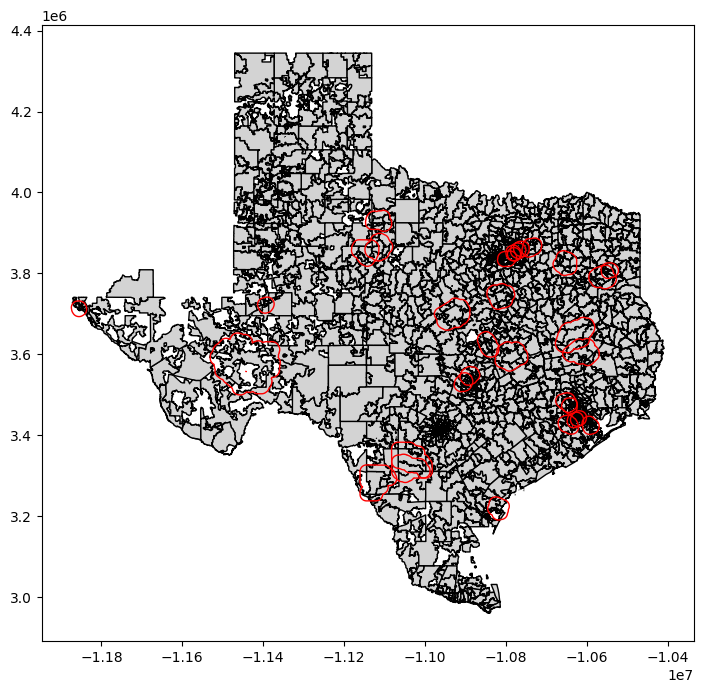

Number of indirectly affected ZIP codes: 33


In [ ]:
directly_affected_zips.loc[:, 'buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # 10 miles in meters

buffered_zips = gpd.GeoDataFrame(directly_affected_zips[['ZIP_CD', 'buffer']], geometry='buffer', crs=directly_affected_zips.crs)

ax = texas_zip_gdf.plot(color='lightgrey', edgecolor='black', figsize=(10, 8))
buffered_zips.plot(ax=ax, color='none', edgecolor='red')  # Buffer zones in red outline
plt.show()

indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')

indirectly_affected_count = indirectly_affected_zips['ZIP_CD'].nunique()
print("Number of indirectly affected ZIP codes:", indirectly_affected_count)

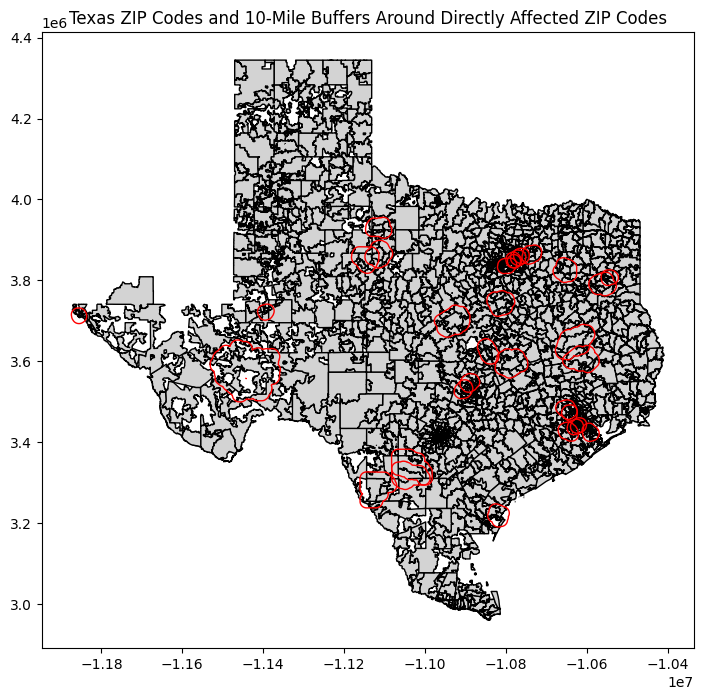

Number of indirectly affected ZIP codes: 33


In [ ]:
# Re-project to a projected CRS for accurate buffering
texas_zip_gdf = texas_zip_gdf.to_crs(epsg=3395)
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0].to_crs(epsg=3395)

# Step 1: Create a 10-mile buffer around directly affected ZIP codes (10 miles ≈ 16093.4 meters)
directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # Buffer in meters

# Step 2: Convert buffered areas to a new GeoDataFrame
buffered_zips = gpd.GeoDataFrame(directly_affected_zips[['ZIP_CD', 'buffer']], geometry='buffer', crs=directly_affected_zips.crs)

# Step 3: Plot Texas ZIP codes and buffer zones for verification (optional visualization)
ax = texas_zip_gdf.plot(color='lightgrey', edgecolor='black', figsize=(10, 8))
buffered_zips.plot(ax=ax, color='none', edgecolor='red')  # Buffer zones in red outline
plt.title("Texas ZIP Codes and 10-Mile Buffers Around Directly Affected ZIP Codes")
plt.show()

# Step 4: Perform spatial join to identify indirectly affected ZIP codes within buffer areas
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')

# Step 5: Count unique ZIP codes in the indirectly affected set
indirectly_affected_count = indirectly_affected_zips['ZIP_CD'].nunique()
print("Number of indirectly affected ZIP codes:", indirectly_affected_count)

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Step 1: Re-project data for accuracy (if not already done)
texas_zip_gdf = texas_zip_gdf.to_crs(epsg=3395)
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0].to_crs(epsg=3395)

# Step 2: Create a 10-mile buffer around directly affected ZIP codes
directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # Buffer in meters
buffered_zips = gpd.GeoDataFrame(directly_affected_zips[['ZIP_CD', 'buffer']], geometry='buffer', crs=directly_affected_zips.crs)

# Step 3: Identify indirectly affected ZIP codes
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')
indirectly_affected_zip_codes = indirectly_affected_zips['ZIP_CD'].unique()

# Step 4: Classify ZIP codes into categories
texas_zip_gdf['category'] = 'Not Affected'
texas_zip_gdf.loc[texas_zip_gdf['ZIP_CD'].isin(directly_affected_zips['ZIP_CD']), 'category'] = 'Directly Affected'
texas_zip_gdf.loc[(texas_zip_gdf['ZIP_CD'].isin(indirectly_affected_zip_codes)) & 
                  (~texas_zip_gdf['ZIP_CD'].isin(directly_affected_zips['ZIP_CD'])), 'category'] = 'Indirectly Affected'

# Step 5: Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
category_colors = {'Not Affected': 'lightgrey', 'Directly Affected': 'red', 'Indirectly Affected': 'orange'}
texas_zip_gdf.plot(column='category', categorical=True, 
                   legend=True, color=[category_colors.get(x) for x in texas_zip_gdf['category']],
                   legend_kwds={'title': "Impact Category"}, ax=ax, edgecolor='black')

# Adding a title and displaying the plot
plt.title("Texas ZIP Codes Categorized by Impact of Hospital Closures (2016-2019)")
plt.axis('off')  # Hide axis for a cleaner look
plt.show()

KeyError: 'ZIP_CD'

In [ ]:
import pandas as pd

# Load the pos2016.csv file
data_2016 = pd.read_csv("pos2016.csv")

# Filter for short-term hospitals with provider type code 01 and subtype code 01
short_term_hospitals_2016 = data_2016[(data_2016['PRVDR_CTGRY_CD'] == 1) & (data_2016['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# a. Count the number of hospitals in this subset
hospital_count_2016 = short_term_hospitals_2016.shape[0]
hospital_count_2016

import pandas as pd
import altair as alt

# Load each year's data with appropriate encoding where needed
data_2016 = pd.read_csv("pos2016.csv")
data_2017 = pd.read_csv("pos2017.csv")
data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")
data_2019 = pd.read_csv("pos2019.csv", encoding="ISO-8859-1")

# Define a function to filter for short-term hospitals
def filter_short_term(data):
    return data[(data['PRVDR_CTGRY_CD'] == 1) & (data['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# Apply filtering to each dataset and add a 'Year' column for each
data_2016 = filter_short_term(data_2016)
data_2016['Year'] = 2016

data_2017 = filter_short_term(data_2017)
data_2017['Year'] = 2017

data_2018 = filter_short_term(data_2018)
data_2018['Year'] = 2018

data_2019 = filter_short_term(data_2019)
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count the number of observations (hospitals) by year
observations_by_year = all_years_data.groupby('Year').size().reset_index(name='Count')

# Plot using Altair
bars = alt.Chart(observations_by_year).mark_bar(color='steelblue').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Count:Q', title='Number of Short-Term Hospitals')
).properties(
    title='Number of Observations in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='Count:Q'
)

# Combine the bars and the text
(bars + text).display()


import pandas as pd
import altair as alt

# Assuming data for each year is already filtered and loaded
# If not, make sure data_2016, data_2017, data_2018, data_2019 are loaded and filtered as before

# Add a 'Year' column to each dataset
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count unique hospitals (by PRVDR_NUM) per year
unique_hospitals_by_year = all_years_data.groupby('Year')['PRVDR_NUM'].nunique().reset_index(name='UniqueCount')

# Plot using Altair
bars = alt.Chart(unique_hospitals_by_year).mark_bar(color='seagreen').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('UniqueCount:Q', title='Number of Unique Short-Term Hospitals')
).properties(
    title='Number of Unique Short-Term Hospitals in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='UniqueCount:Q'
)

# Display the combined chart with bars and labels
(bars + text).display()


# Double checking for duplicates
# Check for duplicates in PRVDR_NUM within each year
duplicates_2016 = data_2016.duplicated(subset='PRVDR_NUM').sum()
duplicates_2017 = data_2017.duplicated(subset='PRVDR_NUM').sum()
duplicates_2018 = data_2018.duplicated(subset='PRVDR_NUM').sum()
duplicates_2019 = data_2019.duplicated(subset='PRVDR_NUM').sum()

print(f"2016 Duplicates: {duplicates_2016}")
print(f"2017 Duplicates: {duplicates_2017}")
print(f"2018 Duplicates: {duplicates_2018}")
print(f"2019 Duplicates: {duplicates_2019}")



# Step 1: Filter active hospitals in each year
active_2016 = data_2016[data_2016['PGM_TRMNTN_CD'] == 0]
active_2017 = data_2017[data_2017['PGM_TRMNTN_CD'] == 0]
active_2018 = data_2018[data_2018['PGM_TRMNTN_CD'] == 0]
active_2019 = data_2019[data_2019['PGM_TRMNTN_CD'] == 0]

# Step 2: Define function to check if provider is active in a given year
def provider_in_year(df, provider_num):
    row = df[df['PRVDR_NUM'] == provider_num]
    return not row.empty and row['PGM_TRMNTN_CD'].values[0] == 0

# Step 3: Determine closure year for each provider number
def determine_closure_year(provider_num):
    if not provider_in_year(active_2017, provider_num):
        return 2017
    elif not provider_in_year(active_2018, provider_num):
        return 2018
    elif not provider_in_year(active_2019, provider_num):
        return 2019
    return None

# Step 4: Apply closure detection on active hospitals in 2016
active_2016_only = active_2016[active_2016['PGM_TRMNTN_CD'] == 0]
active_2016_only['Year_Closed'] = active_2016_only['PRVDR_NUM'].apply(determine_closure_year)

# Step 5: Filter out hospitals that have a closure year assigned
closed_hospitals = active_2016_only.dropna(subset=['Year_Closed']).reset_index(drop=True)

# Output the result
print(f"Number of suspected hospital closures: {len(closed_hospitals)}")
closed_hospitals[['FAC_NAME', 'ZIP_CD', 'Year_Closed']]


# Sort the closed hospitals by facility name
sorted_closed_hospitals = closed_hospitals.sort_values(by='FAC_NAME').reset_index(drop=True)

# Display the names and year of suspected closure for the first 10 rows
sorted_closed_hospitals[['FAC_NAME', 'Year_Closed']].head(10)


# Step 1: Count active hospitals by ZIP code for each year
active_by_zip_2016 = active_2016['ZIP_CD'].value_counts().to_dict()
active_by_zip_2017 = active_2017['ZIP_CD'].value_counts().to_dict()
active_by_zip_2018 = active_2018['ZIP_CD'].value_counts().to_dict()
active_by_zip_2019 = active_2019['ZIP_CD'].value_counts().to_dict()

# Step 2: Function to check if closure might be due to merger/acquisition
def is_possible_merger(row):
    zip_code = row['ZIP_CD']
    year_closed = row['Year_Closed']
    
    if year_closed == 2017:
        return active_by_zip_2016.get(zip_code, 0) <= active_by_zip_2017.get(zip_code, 0)
    elif year_closed == 2018:
        return active_by_zip_2017.get(zip_code, 0) <= active_by_zip_2018.get(zip_code, 0)
    elif year_closed == 2019:
        return active_by_zip_2018.get(zip_code, 0) <= active_by_zip_2019.get(zip_code, 0)
    return False

# Step 3: Apply the function to identify potential mergers/acquisitions
closed_hospitals['Possible_Merger'] = closed_hospitals.apply(is_possible_merger, axis=1)

# Filter the suspected closures that might be due to a merger/acquisition
potential_mergers = closed_hospitals[closed_hospitals['Possible_Merger']]

# Output the result
num_potential_mergers = len(potential_mergers)
print(f"Number of suspected hospital closures that fit the merger/acquisition definition: {num_potential_mergers}")


# Calculate the corrected number of closures after removing mergers/acquisitions
corrected_closures = len(closed_hospitals) - num_potential_mergers
print(f"Number of hospitals remaining after correcting for mergers/acquisitions: {corrected_closures}")

# Filter out the potential mergers/acquisitions to get the corrected closures
corrected_closures = closed_hospitals[~closed_hospitals['Possible_Merger']]

# Sort the corrected closures by facility name
sorted_corrected_closures = corrected_closures.sort_values(by='FAC_NAME')

# Display the first 10 rows
sorted_corrected_closures[['FAC_NAME', 'ZIP_CD', 'Year_Closed']].head(10)


import os

# Replace 'shapefile_directory' with the path to your extracted shapefile directory
shapefile_directory = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k"

# Get a list of files and their sizes
for file_name in os.listdir(shapefile_directory):
    file_path = os.path.join(shapefile_directory, file_name)
    size_mb = os.path.getsize(file_path) / (1024 * 1024)
    print(f"{file_name}: {size_mb:.2f} MB")


import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# Check the distribution of hospital counts
print(merged_gdf['Hospital_Count'].describe())
print(merged_gdf['Hospital_Count'].value_counts().head(20))



# Load 2016 POS data and filter for short-term hospitals in Texas
hospital_data_path = "/Users/attaullah/Documents/problem-set-4-atta/pos2016.csv"
pos2016 = pd.read_csv(hospital_data_path)
texas_hospitals = pos2016[(pos2016["PRVDR_CTGRY_SBTYP_CD"] == 1) &
                          (pos2016["PRVDR_CTGRY_CD"] == 1) &
                          (pos2016["ZIP_CD"].astype(str).str.startswith(("75", "76", "77", "78", "79")))]

# Standardize ZIP codes as 5-digit strings
texas_hospitals["ZIP_CD"] = texas_hospitals["ZIP_CD"].astype(int).astype(str).str.zfill(5)

# Calculate number of hospitals per ZIP code in Texas
hospital_counts = texas_hospitals.groupby("ZIP_CD").size().reset_index(name="Hospital_Count")

# Load Texas ZIP code shapefile and filter for Texas ZIPs
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"
zip_gdf = gpd.read_file(shapefile_path)
zip_gdf["ZCTA5"] = zip_gdf["ZCTA5"].astype(str).str.zfill(5)
texas_zip_gdf = zip_gdf[zip_gdf["ZCTA5"].str.startswith(("75", "76", "77", "78", "79"))]

# Merge hospital data with Texas ZIP code shapefile
merged_gdf = texas_zip_gdf.merge(hospital_counts, left_on="ZCTA5", right_on="ZIP_CD", how="left")
merged_gdf["Hospital_Count"] = merged_gdf["Hospital_Count"].fillna(0)

# Plot choropleth map of hospital counts by ZIP code in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(
    column="Hospital_Count",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Hospital Count"},
    ax=ax
)
ax.set_title("Number of Hospitals by ZIP Code in Texas (2016)", fontsize=15)
ax.axis("off")  # Remove axis for cleaner map
plt.show()




import geopandas as gpd
from shapely.geometry import Point

# Load the ZIP code shapefile
shapefile_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp'
zip_gdf = gpd.read_file(shapefile_path)

# Calculate the centroid for each ZIP code polygon
# Assuming 'ZCTA5' is the ZIP code column in the shapefile
zip_gdf['centroid'] = zip_gdf.geometry.centroid

# Create a new GeoDataFrame with centroids
zips_all_centroids = gpd.GeoDataFrame(zip_gdf[['ZCTA5', 'centroid']], geometry='centroid')

# Print the dimensions of the resulting GeoDataFrame
print("Dimensions of zips_all_centroids:", zips_all_centroids.shape)

# Display the first few rows to understand the structure
print(zips_all_centroids.head())

import geopandas as gpd

# Define ZIP code prefixes for Texas and its bordering states
texas_prefixes = ["75", "76", "77", "78", "79"]  # Texas
bordering_prefixes = texas_prefixes + [
    "73", "74",              # Oklahoma
    "870", "871", "872", "873", "874", "875", "876", "877", "878", "879", "880", "881", "882", "883", "884",  # New Mexico
    "700", "701", "702", "703", "704", "705", "706", "707", "708", "709", "710", "711", "712", "713", "714", "715",  # Louisiana
    "716", "717", "718", "719", "720", "721", "722", "723", "724", "725", "726", "727", "728", "729"  # Arkansas
]

# Create subset for Texas ZIP codes
zips_texas_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(texas_prefixes))]

# Create subset for Texas and bordering states ZIP codes
zips_texas_borderstates_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(bordering_prefixes))]

# Calculate the number of unique ZIP codes in each subset
unique_texas_zips = zips_texas_centroids["ZCTA5"].nunique()
unique_borderstates_zips = zips_texas_borderstates_centroids["ZCTA5"].nunique()

# Print the results
print("Number of unique ZIP codes in Texas:", unique_texas_zips)
print("Number of unique ZIP codes in Texas and bordering states:", unique_borderstates_zips)

# Display the first few rows of each subset to verify
print("Sample of Texas ZIP codes:\n", zips_texas_centroids.head())
print("Sample of Texas and bordering states ZIP codes:\n", zips_texas_borderstates_centroids.head())

import pandas as pd
import geopandas as gpd

# Assume we already have `zips_texas_borderstates_centroids` created and `hospital_counts` data from the previous part.

# Filter hospital data to include only ZIP codes with at least one hospital in 2016
# 'hospital_counts' should be the dataframe that contains ZIP codes and counts of hospitals in each ZIP code
hospital_counts_2016 = hospital_counts[hospital_counts['Hospital_Count'] > 0]

# Perform an inner merge on 'ZCTA5' (ZIP code) to get only those ZIP codes with at least one hospital
zips_withhospital_centroids = zips_texas_borderstates_centroids.merge(
    hospital_counts_2016, 
    left_on="ZCTA5", 
    right_on="ZIP_CD", 
    how="inner"
)

# Check the resulting GeoDataFrame
print("Dimensions of zips_withhospital_centroids:", zips_withhospital_centroids.shape)
print(zips_withhospital_centroids.head())


# Reproject both GeoDataFrames to a projected CRS (e.g., EPSG:5070 for USA)
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=5070)
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=5070)

# Re-run the distance calculation with the reprojected GeoDataFrames
import time

# Subset to 10 ZIP codes in Texas
subset_texas_centroids = zips_texas_centroids.iloc[:10]

# Start timing the process
start_time = time.time()

# Calculate the nearest hospital distance for each ZIP code in the subset
subset_texas_centroids['nearest_hospital_distance'] = subset_texas_centroids['centroid'].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End timing
end_time = time.time()
subset_time = end_time - start_time
print("Time taken for 10 ZIP code calculations:", subset_time, "seconds")

# Estimate time for full calculation
estimated_total_time = subset_time * (len(zips_texas_centroids) / 10)
print("Estimated time for the full procedure:", estimated_total_time, "seconds")

# Display the results for the subset
print(subset_texas_centroids[['ZCTA5', 'nearest_hospital_distance']])


import time

# Start the timer for the full calculation on zips_texas_centroids
start_time_full = time.time()

# Apply the distance calculation for each ZIP code in Texas to the nearest ZIP code with a hospital
zips_texas_centroids["nearest_hospital_distance"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End the timer
end_time_full = time.time()
actual_time_full = end_time_full - start_time_full

# Print out the actual time taken
print(f"Actual time for full calculation: {actual_time_full} seconds")

# Path to the .prj file
prj_file_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.prj'

# Read and print the .prj file contents
with open(prj_file_path, 'r') as file:
    prj_contents = file.read()

print("Contents of the .prj file:")
print(prj_contents)



import math

# Function to convert distance in degrees to miles at a given latitude (approx. for Texas)
def degrees_to_miles(distance_in_degrees, latitude=30):
    # Convert latitude to radians
    latitude_in_radians = math.radians(latitude)
    
    # Approximate miles per degree for latitude and longitude
    miles_per_degree_latitude = 69.0
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)
    
    # Average of latitude and longitude mile conversion for more accuracy
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the computed average distance in degrees from the dataset
distance_in_degrees = 0.0753484763  # Computed average distance in degrees
distance_in_miles = degrees_to_miles(distance_in_degrees)
print("Average distance to nearest hospital (in miles):", distance_in_miles)


# Calculate the nearest hospital distance in degrees
zips_texas_centroids["nearest_hospital_distance_degrees"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Calculate the average distance in degrees
average_distance_degrees = zips_texas_centroids["nearest_hospital_distance_degrees"].mean()
print("Average distance to the nearest hospital for each ZIP code in Texas (in degrees):", average_distance_degrees)


import math

# Function to convert degrees to miles based on approximate latitude for Texas (30 degrees)
def degrees_to_miles(distance_in_degrees, latitude=30):
    latitude_in_radians = math.radians(latitude)
    miles_per_degree_latitude = 69.0  # Approximation for latitude degree
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)  # Approximation for longitude degree
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the previously calculated average distance in degrees
distance_in_miles = degrees_to_miles(average_distance_degrees)
print("Average distance to the nearest hospital for each ZIP code in Texas (in miles):", distance_in_miles)
 

# Reproject to a projected CRS for accurate distance calculation
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=3395)  # World Mercator
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=3395)

# Recalculate nearest hospital distance
zips_texas_centroids["nearest_hospital_distance_meters"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Convert the distance from meters to miles
zips_texas_centroids["nearest_hospital_distance_miles"] = zips_texas_centroids["nearest_hospital_distance_meters"] / 1609.34

# Calculate the average distance in miles
average_distance_miles_corrected = zips_texas_centroids["nearest_hospital_distance_miles"].mean()
print("Corrected average distance to nearest hospital (in miles):", average_distance_miles_corrected)


import matplotlib.pyplot as plt

# Plotting the choropleth map for average distance to nearest hospital in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
zips_texas_centroids.plot(
    column='nearest_hospital_distance_miles',  # Column with the distance in miles
    cmap='viridis',                            # Color map
    linewidth=0.8,                             # Border width for ZIP code polygons
    ax=ax,
    edgecolor='0.8',                           # Color for polygon borders
    legend=True,
    legend_kwds={'label': "Distance to Nearest Hospital (miles)"}
)

# Adding map title and turning off axis for clarity
ax.set_title("Average Distance to Nearest Hospital by ZIP Code in Texas", fontsize=15)
ax.axis('off')  # Hides the axis

# Show the plot
plt.show()


import pandas as pd

# Convert ZIP_CD to string, remove any '.0' suffix if present, then ensure it's a 5-digit string
closed_hospitals['ZIP_CD'] = closed_hospitals['ZIP_CD'].astype(str).str.replace(r'\.0$', '', regex=True).str.zfill(5)

# Filter the closures data for ZIP codes in Texas (based on known Texas ZIP code prefixes)
texas_closures = closed_hospitals[closed_hospitals['ZIP_CD'].str.startswith(('75', '76', '77', '78', '79'))]

# Group by ZIP code and count closures
closures_by_zipcode = texas_closures.groupby('ZIP_CD').size().reset_index(name='Closure_Count')

# Display the table of closures by ZIP code
print("Table of Hospital Closures by ZIP Code in Texas (2016-2019):")
print(closures_by_zipcode)

# Optionally display the top affected ZIP codes for brevity
print("Top Affected ZIP Codes by Hospital Closures:")
print(closures_by_zipcode.sort_values(by='Closure_Count', ascending=False).head(10))


import matplotlib.pyplot as plt
import geopandas as gpd

# Load Texas ZIP codes shapefile and hospital closures data
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"  # Adjust the path
zip_gdf = gpd.read_file(shapefile_path)

# Define Texas ZIP code prefixes and filter the data
texas_zip_prefixes = ["75", "76", "77", "78", "79"]
zip_gdf["ZCTA5"] = zip_gdf["ZCTA5"].astype(str)
texas_zip_gdf = zip_gdf[zip_gdf["ZCTA5"].str.startswith(tuple(texas_zip_prefixes))]

# Merge Texas ZIP codes with closure data
closures_by_zipcode['ZIP_CD'] = closures_by_zipcode['ZIP_CD'].astype(str).str.zfill(5)
texas_closure_geo = texas_zip_gdf.merge(closures_by_zipcode, left_on="ZCTA5", right_on="ZIP_CD", how="left")
texas_closure_geo['Closure_Count'] = texas_closure_geo['Closure_Count'].fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
texas_closure_geo.plot(
    column='Closure_Count',
    cmap='OrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
ax.set_title("Texas ZIP Codes Directly Affected by Hospital Closures (2016-2019)")
ax.set_axis_off()
plt.show()



# Re-project to a projected CRS for accurate buffering
texas_zip_gdf = texas_zip_gdf.to_crs(epsg=3395)
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0].to_crs(epsg=3395)

# Step 1: Create a 10-mile buffer around directly affected ZIP codes (10 miles ≈ 16093.4 meters)
directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # Buffer in meters

# Step 2: Convert buffered areas to a new GeoDataFrame
buffered_zips = gpd.GeoDataFrame(directly_affected_zips[['ZIP_CD', 'buffer']], geometry='buffer', crs=directly_affected_zips.crs)

# Step 3: Plot Texas ZIP codes and buffer zones for verification (optional visualization)
ax = texas_zip_gdf.plot(color='lightgrey', edgecolor='black', figsize=(10, 8))
buffered_zips.plot(ax=ax, color='none', edgecolor='red')  # Buffer zones in red outline
plt.title("Texas ZIP Codes and 10-Mile Buffers Around Directly Affected ZIP Codes")
plt.show()

# Step 4: Perform spatial join to identify indirectly affected ZIP codes within buffer areas
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')

# Step 5: Count unique ZIP codes in the indirectly affected set
indirectly_affected_count = indirectly_affected_zips['ZIP_CD'].nunique()
print("Number of indirectly affected ZIP codes:", indirectly_affected_count)

<ipython-input-41-3f4a629b1b00>:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")


alt.LayerChart(...)

alt.LayerChart(...)

2016 Duplicates: 0
2017 Duplicates: 0
2018 Duplicates: 0
2019 Duplicates: 0
Number of suspected hospital closures: 174
Number of suspected hospital closures that fit the merger/acquisition definition: 8
Number of hospitals remaining after correcting for mergers/acquisitions: 166
gz_2010_us_860_00_500k.prj: 0.00 MB
gz_2010_us_860_00_500k.shx: 0.25 MB
gz_2010_us_860_00_500k.shp: 798.74 MB
gz_2010_us_860_00_500k.dbf: 6.13 MB
gz_2010_us_860_00_500k.xml: 0.01 MB


KeyError: 'Hospital_Count'

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Step 1: Re-project data for accuracy (if not already done)
texas_zip_gdf = texas_zip_gdf.to_crs(epsg=3395)
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0].to_crs(epsg=3395)

# Step 2: Create a 10-mile buffer around directly affected ZIP codes
directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # Buffer in meters
buffered_zips = gpd.GeoDataFrame(directly_affected_zips[['ZIP_CD', 'buffer']], geometry='buffer', crs=directly_affected_zips.crs)

# Step 3: Identify indirectly affected ZIP codes
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')
indirectly_affected_zip_codes = indirectly_affected_zips['ZIP_CD'].unique()

# Step 4: Classify ZIP codes into categories
texas_zip_gdf['category'] = 'Not Affected'
texas_zip_gdf.loc[texas_zip_gdf['ZIP_CD'].isin(directly_affected_zips['ZIP_CD']), 'category'] = 'Directly Affected'
texas_zip_gdf.loc[(texas_zip_gdf['ZIP_CD'].isin(indirectly_affected_zip_codes)) & 
                  (~texas_zip_gdf['ZIP_CD'].isin(directly_affected_zips['ZIP_CD'])), 'category'] = 'Indirectly Affected'

# Step 5: Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
category_colors = {'Not Affected': 'lightgrey', 'Directly Affected': 'red', 'Indirectly Affected': 'orange'}
texas_zip_gdf.plot(column='category', categorical=True, 
                   legend=True, color=[category_colors.get(x) for x in texas_zip_gdf['category']],
                   legend_kwds={'title': "Impact Category"}, ax=ax, edgecolor='black')

# Adding a title and displaying the plot
plt.title("Texas ZIP Codes Categorized by Impact of Hospital Closures (2016-2019)")
plt.axis('off')  # Hide axis for a cleaner look
plt.show()

KeyError: 'ZIP_CD'

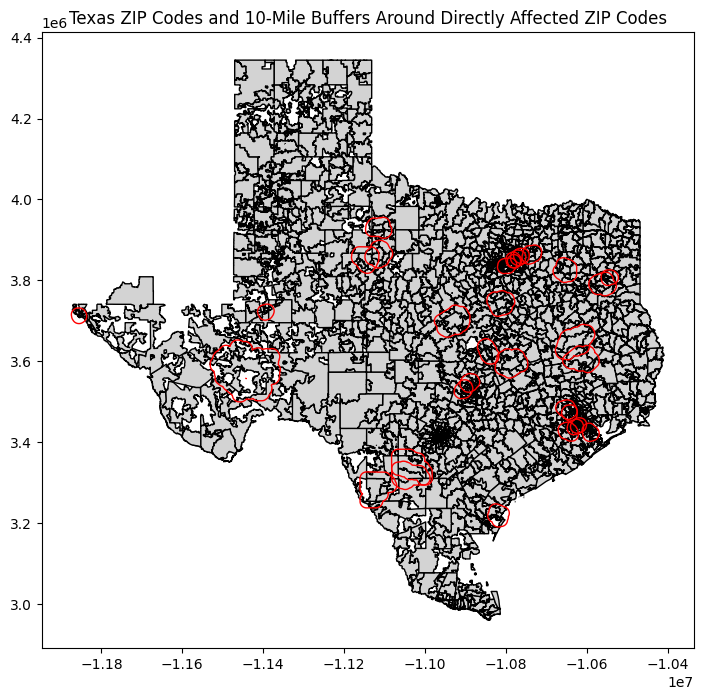

Number of indirectly affected ZIP codes: 33


In [ ]:
# Re-project to a projected CRS for accurate buffering
texas_zip_gdf = texas_zip_gdf.to_crs(epsg=3395)
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0].to_crs(epsg=3395)

# Step 1: Create a 10-mile buffer around directly affected ZIP codes (10 miles ≈ 16093.4 meters)
directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # Buffer in meters

# Step 2: Convert buffered areas to a new GeoDataFrame
buffered_zips = gpd.GeoDataFrame(directly_affected_zips[['ZIP_CD', 'buffer']], geometry='buffer', crs=directly_affected_zips.crs)

# Step 3: Plot Texas ZIP codes and buffer zones for verification (optional visualization)
ax = texas_zip_gdf.plot(color='lightgrey', edgecolor='black', figsize=(10, 8))
buffered_zips.plot(ax=ax, color='none', edgecolor='red')  # Buffer zones in red outline
plt.title("Texas ZIP Codes and 10-Mile Buffers Around Directly Affected ZIP Codes")
plt.show()

# Step 4: Perform spatial join to identify indirectly affected ZIP codes within buffer areas
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')

# Step 5: Count unique ZIP codes in the indirectly affected set
indirectly_affected_count = indirectly_affected_zips['ZIP_CD'].nunique()
print("Number of indirectly affected ZIP codes:", indirectly_affected_count)

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Step 1: Re-project data for accuracy (if not already done)
texas_zip_gdf = texas_zip_gdf.to_crs(epsg=3395)
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0].to_crs(epsg=3395)

# Step 2: Create a 10-mile buffer around directly affected ZIP codes
directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # Buffer in meters
buffered_zips = gpd.GeoDataFrame(directly_affected_zips[['ZIP_CD', 'buffer']], geometry='buffer', crs=directly_affected_zips.crs)

# Step 3: Identify indirectly affected ZIP codes
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')
indirectly_affected_zip_codes = indirectly_affected_zips['ZIP_CD'].unique()

# Step 4: Classify ZIP codes into categories
texas_zip_gdf['category'] = 'Not Affected'
texas_zip_gdf.loc[texas_zip_gdf['ZIP_CD'].isin(directly_affected_zips['ZIP_CD']), 'category'] = 'Directly Affected'
texas_zip_gdf.loc[(texas_zip_gdf['ZIP_CD'].isin(indirectly_affected_zip_codes)) & 
                  (~texas_zip_gdf['ZIP_CD'].isin(directly_affected_zips['ZIP_CD'])), 'category'] = 'Indirectly Affected'

# Step 5: Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
category_colors = {'Not Affected': 'lightgrey', 'Directly Affected': 'red', 'Indirectly Affected': 'orange'}
texas_zip_gdf.plot(column='category', categorical=True, 
                   legend=True, color=[category_colors.get(x) for x in texas_zip_gdf['category']],
                   legend_kwds={'title': "Impact Category"}, ax=ax, edgecolor='black')

# Adding a title and displaying the plot
plt.title("Texas ZIP Codes Categorized by Impact of Hospital Closures (2016-2019)")
plt.axis('off')  # Hide axis for a cleaner look
plt.show()

KeyError: 'ZIP_CD'

In [ ]:
import pandas as pd

# Load the pos2016.csv file
data_2016 = pd.read_csv("pos2016.csv")

# Filter for short-term hospitals with provider type code 01 and subtype code 01
short_term_hospitals_2016 = data_2016[(data_2016['PRVDR_CTGRY_CD'] == 1) & (data_2016['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# a. Count the number of hospitals in this subset
hospital_count_2016 = short_term_hospitals_2016.shape[0]
hospital_count_2016

import pandas as pd
import altair as alt

# Load each year's data with appropriate encoding where needed
data_2016 = pd.read_csv("pos2016.csv")
data_2017 = pd.read_csv("pos2017.csv")
data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")
data_2019 = pd.read_csv("pos2019.csv", encoding="ISO-8859-1")

# Define a function to filter for short-term hospitals
def filter_short_term(data):
    return data[(data['PRVDR_CTGRY_CD'] == 1) & (data['PRVDR_CTGRY_SBTYP_CD'] == 1)]

# Apply filtering to each dataset and add a 'Year' column for each
data_2016 = filter_short_term(data_2016)
data_2016['Year'] = 2016

data_2017 = filter_short_term(data_2017)
data_2017['Year'] = 2017

data_2018 = filter_short_term(data_2018)
data_2018['Year'] = 2018

data_2019 = filter_short_term(data_2019)
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count the number of observations (hospitals) by year
observations_by_year = all_years_data.groupby('Year').size().reset_index(name='Count')

# Plot using Altair
bars = alt.Chart(observations_by_year).mark_bar(color='steelblue').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Count:Q', title='Number of Short-Term Hospitals')
).properties(
    title='Number of Observations in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='Count:Q'
)

# Combine the bars and the text
(bars + text).display()


import pandas as pd
import altair as alt

# Assuming data for each year is already filtered and loaded
# If not, make sure data_2016, data_2017, data_2018, data_2019 are loaded and filtered as before

# Add a 'Year' column to each dataset
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

# Combine all datasets into a single DataFrame
all_years_data = pd.concat([data_2016, data_2017, data_2018, data_2019])

# Count unique hospitals (by PRVDR_NUM) per year
unique_hospitals_by_year = all_years_data.groupby('Year')['PRVDR_NUM'].nunique().reset_index(name='UniqueCount')

# Plot using Altair
bars = alt.Chart(unique_hospitals_by_year).mark_bar(color='seagreen').encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('UniqueCount:Q', title='Number of Unique Short-Term Hospitals')
).properties(
    title='Number of Unique Short-Term Hospitals in Dataset by Year',
    width=400,
    height=300
)

# Add text labels on top of each bar
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Adjust the position of the text above the bars
).encode(
    text='UniqueCount:Q'
)

# Display the combined chart with bars and labels
(bars + text).display()


# Double checking for duplicates
# Check for duplicates in PRVDR_NUM within each year
duplicates_2016 = data_2016.duplicated(subset='PRVDR_NUM').sum()
duplicates_2017 = data_2017.duplicated(subset='PRVDR_NUM').sum()
duplicates_2018 = data_2018.duplicated(subset='PRVDR_NUM').sum()
duplicates_2019 = data_2019.duplicated(subset='PRVDR_NUM').sum()

print(f"2016 Duplicates: {duplicates_2016}")
print(f"2017 Duplicates: {duplicates_2017}")
print(f"2018 Duplicates: {duplicates_2018}")
print(f"2019 Duplicates: {duplicates_2019}")



# Step 1: Filter active hospitals in each year
active_2016 = data_2016[data_2016['PGM_TRMNTN_CD'] == 0]
active_2017 = data_2017[data_2017['PGM_TRMNTN_CD'] == 0]
active_2018 = data_2018[data_2018['PGM_TRMNTN_CD'] == 0]
active_2019 = data_2019[data_2019['PGM_TRMNTN_CD'] == 0]

# Step 2: Define function to check if provider is active in a given year
def provider_in_year(df, provider_num):
    row = df[df['PRVDR_NUM'] == provider_num]
    return not row.empty and row['PGM_TRMNTN_CD'].values[0] == 0

# Step 3: Determine closure year for each provider number
def determine_closure_year(provider_num):
    if not provider_in_year(active_2017, provider_num):
        return 2017
    elif not provider_in_year(active_2018, provider_num):
        return 2018
    elif not provider_in_year(active_2019, provider_num):
        return 2019
    return None

# Step 4: Apply closure detection on active hospitals in 2016
active_2016_only = active_2016[active_2016['PGM_TRMNTN_CD'] == 0]
active_2016_only['Year_Closed'] = active_2016_only['PRVDR_NUM'].apply(determine_closure_year)

# Step 5: Filter out hospitals that have a closure year assigned
closed_hospitals = active_2016_only.dropna(subset=['Year_Closed']).reset_index(drop=True)

# Output the result
print(f"Number of suspected hospital closures: {len(closed_hospitals)}")
closed_hospitals[['FAC_NAME', 'ZIP_CD', 'Year_Closed']]


# Sort the closed hospitals by facility name
sorted_closed_hospitals = closed_hospitals.sort_values(by='FAC_NAME').reset_index(drop=True)

# Display the names and year of suspected closure for the first 10 rows
sorted_closed_hospitals[['FAC_NAME', 'Year_Closed']].head(10)


# Step 1: Count active hospitals by ZIP code for each year
active_by_zip_2016 = active_2016['ZIP_CD'].value_counts().to_dict()
active_by_zip_2017 = active_2017['ZIP_CD'].value_counts().to_dict()
active_by_zip_2018 = active_2018['ZIP_CD'].value_counts().to_dict()
active_by_zip_2019 = active_2019['ZIP_CD'].value_counts().to_dict()

# Step 2: Function to check if closure might be due to merger/acquisition
def is_possible_merger(row):
    zip_code = row['ZIP_CD']
    year_closed = row['Year_Closed']
    
    if year_closed == 2017:
        return active_by_zip_2016.get(zip_code, 0) <= active_by_zip_2017.get(zip_code, 0)
    elif year_closed == 2018:
        return active_by_zip_2017.get(zip_code, 0) <= active_by_zip_2018.get(zip_code, 0)
    elif year_closed == 2019:
        return active_by_zip_2018.get(zip_code, 0) <= active_by_zip_2019.get(zip_code, 0)
    return False

# Step 3: Apply the function to identify potential mergers/acquisitions
closed_hospitals['Possible_Merger'] = closed_hospitals.apply(is_possible_merger, axis=1)

# Filter the suspected closures that might be due to a merger/acquisition
potential_mergers = closed_hospitals[closed_hospitals['Possible_Merger']]

# Output the result
num_potential_mergers = len(potential_mergers)
print(f"Number of suspected hospital closures that fit the merger/acquisition definition: {num_potential_mergers}")


# Calculate the corrected number of closures after removing mergers/acquisitions
corrected_closures = len(closed_hospitals) - num_potential_mergers
print(f"Number of hospitals remaining after correcting for mergers/acquisitions: {corrected_closures}")

# Filter out the potential mergers/acquisitions to get the corrected closures
corrected_closures = closed_hospitals[~closed_hospitals['Possible_Merger']]

# Sort the corrected closures by facility name
sorted_corrected_closures = corrected_closures.sort_values(by='FAC_NAME')

# Display the first 10 rows
sorted_corrected_closures[['FAC_NAME', 'ZIP_CD', 'Year_Closed']].head(10)


import os

# Replace 'shapefile_directory' with the path to your extracted shapefile directory
shapefile_directory = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k"

# Get a list of files and their sizes
for file_name in os.listdir(shapefile_directory):
    file_path = os.path.join(shapefile_directory, file_name)
    size_mb = os.path.getsize(file_path) / (1024 * 1024)
    print(f"{file_name}: {size_mb:.2f} MB")


import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# Check the distribution of hospital counts
print(merged_gdf['Hospital_Count'].describe())
print(merged_gdf['Hospital_Count'].value_counts().head(20))



# Load 2016 POS data and filter for short-term hospitals in Texas
hospital_data_path = "/Users/attaullah/Documents/problem-set-4-atta/pos2016.csv"
pos2016 = pd.read_csv(hospital_data_path)
texas_hospitals = pos2016[(pos2016["PRVDR_CTGRY_SBTYP_CD"] == 1) &
                          (pos2016["PRVDR_CTGRY_CD"] == 1) &
                          (pos2016["ZIP_CD"].astype(str).str.startswith(("75", "76", "77", "78", "79")))]

# Standardize ZIP codes as 5-digit strings
texas_hospitals["ZIP_CD"] = texas_hospitals["ZIP_CD"].astype(int).astype(str).str.zfill(5)

# Calculate number of hospitals per ZIP code in Texas
hospital_counts = texas_hospitals.groupby("ZIP_CD").size().reset_index(name="Hospital_Count")

# Load Texas ZIP code shapefile and filter for Texas ZIPs
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"
zip_gdf = gpd.read_file(shapefile_path)
zip_gdf["ZCTA5"] = zip_gdf["ZCTA5"].astype(str).str.zfill(5)
texas_zip_gdf = zip_gdf[zip_gdf["ZCTA5"].str.startswith(("75", "76", "77", "78", "79"))]

# Merge hospital data with Texas ZIP code shapefile
merged_gdf = texas_zip_gdf.merge(hospital_counts, left_on="ZCTA5", right_on="ZIP_CD", how="left")
merged_gdf["Hospital_Count"] = merged_gdf["Hospital_Count"].fillna(0)

# Plot choropleth map of hospital counts by ZIP code in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(
    column="Hospital_Count",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Hospital Count"},
    ax=ax
)
ax.set_title("Number of Hospitals by ZIP Code in Texas (2016)", fontsize=15)
ax.axis("off")  # Remove axis for cleaner map
plt.show()




import geopandas as gpd
from shapely.geometry import Point

# Load the ZIP code shapefile
shapefile_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp'
zip_gdf = gpd.read_file(shapefile_path)

# Calculate the centroid for each ZIP code polygon
# Assuming 'ZCTA5' is the ZIP code column in the shapefile
zip_gdf['centroid'] = zip_gdf.geometry.centroid

# Create a new GeoDataFrame with centroids
zips_all_centroids = gpd.GeoDataFrame(zip_gdf[['ZCTA5', 'centroid']], geometry='centroid')

# Print the dimensions of the resulting GeoDataFrame
print("Dimensions of zips_all_centroids:", zips_all_centroids.shape)

# Display the first few rows to understand the structure
print(zips_all_centroids.head())

import geopandas as gpd

# Define ZIP code prefixes for Texas and its bordering states
texas_prefixes = ["75", "76", "77", "78", "79"]  # Texas
bordering_prefixes = texas_prefixes + [
    "73", "74",              # Oklahoma
    "870", "871", "872", "873", "874", "875", "876", "877", "878", "879", "880", "881", "882", "883", "884",  # New Mexico
    "700", "701", "702", "703", "704", "705", "706", "707", "708", "709", "710", "711", "712", "713", "714", "715",  # Louisiana
    "716", "717", "718", "719", "720", "721", "722", "723", "724", "725", "726", "727", "728", "729"  # Arkansas
]

# Create subset for Texas ZIP codes
zips_texas_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(texas_prefixes))]

# Create subset for Texas and bordering states ZIP codes
zips_texas_borderstates_centroids = zips_all_centroids[zips_all_centroids["ZCTA5"].str.startswith(tuple(bordering_prefixes))]

# Calculate the number of unique ZIP codes in each subset
unique_texas_zips = zips_texas_centroids["ZCTA5"].nunique()
unique_borderstates_zips = zips_texas_borderstates_centroids["ZCTA5"].nunique()

# Print the results
print("Number of unique ZIP codes in Texas:", unique_texas_zips)
print("Number of unique ZIP codes in Texas and bordering states:", unique_borderstates_zips)

# Display the first few rows of each subset to verify
print("Sample of Texas ZIP codes:\n", zips_texas_centroids.head())
print("Sample of Texas and bordering states ZIP codes:\n", zips_texas_borderstates_centroids.head())

import pandas as pd
import geopandas as gpd

# Assume we already have `zips_texas_borderstates_centroids` created and `hospital_counts` data from the previous part.

# Filter hospital data to include only ZIP codes with at least one hospital in 2016
# 'hospital_counts' should be the dataframe that contains ZIP codes and counts of hospitals in each ZIP code
hospital_counts_2016 = hospital_counts[hospital_counts['Hospital_Count'] > 0]

# Perform an inner merge on 'ZCTA5' (ZIP code) to get only those ZIP codes with at least one hospital
zips_withhospital_centroids = zips_texas_borderstates_centroids.merge(
    hospital_counts_2016, 
    left_on="ZCTA5", 
    right_on="ZIP_CD", 
    how="inner"
)

# Check the resulting GeoDataFrame
print("Dimensions of zips_withhospital_centroids:", zips_withhospital_centroids.shape)
print(zips_withhospital_centroids.head())


# Reproject both GeoDataFrames to a projected CRS (e.g., EPSG:5070 for USA)
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=5070)
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=5070)

# Re-run the distance calculation with the reprojected GeoDataFrames
import time

# Subset to 10 ZIP codes in Texas
subset_texas_centroids = zips_texas_centroids.iloc[:10]

# Start timing the process
start_time = time.time()

# Calculate the nearest hospital distance for each ZIP code in the subset
subset_texas_centroids['nearest_hospital_distance'] = subset_texas_centroids['centroid'].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End timing
end_time = time.time()
subset_time = end_time - start_time
print("Time taken for 10 ZIP code calculations:", subset_time, "seconds")

# Estimate time for full calculation
estimated_total_time = subset_time * (len(zips_texas_centroids) / 10)
print("Estimated time for the full procedure:", estimated_total_time, "seconds")

# Display the results for the subset
print(subset_texas_centroids[['ZCTA5', 'nearest_hospital_distance']])


import time

# Start the timer for the full calculation on zips_texas_centroids
start_time_full = time.time()

# Apply the distance calculation for each ZIP code in Texas to the nearest ZIP code with a hospital
zips_texas_centroids["nearest_hospital_distance"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# End the timer
end_time_full = time.time()
actual_time_full = end_time_full - start_time_full

# Print out the actual time taken
print(f"Actual time for full calculation: {actual_time_full} seconds")

# Path to the .prj file
prj_file_path = '/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.prj'

# Read and print the .prj file contents
with open(prj_file_path, 'r') as file:
    prj_contents = file.read()

print("Contents of the .prj file:")
print(prj_contents)



import math

# Function to convert distance in degrees to miles at a given latitude (approx. for Texas)
def degrees_to_miles(distance_in_degrees, latitude=30):
    # Convert latitude to radians
    latitude_in_radians = math.radians(latitude)
    
    # Approximate miles per degree for latitude and longitude
    miles_per_degree_latitude = 69.0
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)
    
    # Average of latitude and longitude mile conversion for more accuracy
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the computed average distance in degrees from the dataset
distance_in_degrees = 0.0753484763  # Computed average distance in degrees
distance_in_miles = degrees_to_miles(distance_in_degrees)
print("Average distance to nearest hospital (in miles):", distance_in_miles)


# Calculate the nearest hospital distance in degrees
zips_texas_centroids["nearest_hospital_distance_degrees"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Calculate the average distance in degrees
average_distance_degrees = zips_texas_centroids["nearest_hospital_distance_degrees"].mean()
print("Average distance to the nearest hospital for each ZIP code in Texas (in degrees):", average_distance_degrees)


import math

# Function to convert degrees to miles based on approximate latitude for Texas (30 degrees)
def degrees_to_miles(distance_in_degrees, latitude=30):
    latitude_in_radians = math.radians(latitude)
    miles_per_degree_latitude = 69.0  # Approximation for latitude degree
    miles_per_degree_longitude = 69.172 * math.cos(latitude_in_radians)  # Approximation for longitude degree
    avg_miles_per_degree = (miles_per_degree_latitude + miles_per_degree_longitude) / 2
    return distance_in_degrees * avg_miles_per_degree

# Use the previously calculated average distance in degrees
distance_in_miles = degrees_to_miles(average_distance_degrees)
print("Average distance to the nearest hospital for each ZIP code in Texas (in miles):", distance_in_miles)
 

# Reproject to a projected CRS for accurate distance calculation
zips_texas_centroids = zips_texas_centroids.to_crs(epsg=3395)  # World Mercator
zips_withhospital_centroids = zips_withhospital_centroids.to_crs(epsg=3395)

# Recalculate nearest hospital distance
zips_texas_centroids["nearest_hospital_distance_meters"] = zips_texas_centroids["centroid"].apply(
    lambda x: zips_withhospital_centroids.distance(x).min()
)

# Convert the distance from meters to miles
zips_texas_centroids["nearest_hospital_distance_miles"] = zips_texas_centroids["nearest_hospital_distance_meters"] / 1609.34

# Calculate the average distance in miles
average_distance_miles_corrected = zips_texas_centroids["nearest_hospital_distance_miles"].mean()
print("Corrected average distance to nearest hospital (in miles):", average_distance_miles_corrected)


import matplotlib.pyplot as plt

# Plotting the choropleth map for average distance to nearest hospital in Texas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
zips_texas_centroids.plot(
    column='nearest_hospital_distance_miles',  # Column with the distance in miles
    cmap='viridis',                            # Color map
    linewidth=0.8,                             # Border width for ZIP code polygons
    ax=ax,
    edgecolor='0.8',                           # Color for polygon borders
    legend=True,
    legend_kwds={'label': "Distance to Nearest Hospital (miles)"}
)

# Adding map title and turning off axis for clarity
ax.set_title("Average Distance to Nearest Hospital by ZIP Code in Texas", fontsize=15)
ax.axis('off')  # Hides the axis

# Show the plot
plt.show()


import pandas as pd

# Convert ZIP_CD to string, remove any '.0' suffix if present, then ensure it's a 5-digit string
closed_hospitals['ZIP_CD'] = closed_hospitals['ZIP_CD'].astype(str).str.replace(r'\.0$', '', regex=True).str.zfill(5)

# Filter the closures data for ZIP codes in Texas (based on known Texas ZIP code prefixes)
texas_closures = closed_hospitals[closed_hospitals['ZIP_CD'].str.startswith(('75', '76', '77', '78', '79'))]

# Group by ZIP code and count closures
closures_by_zipcode = texas_closures.groupby('ZIP_CD').size().reset_index(name='Closure_Count')

# Display the table of closures by ZIP code
print("Table of Hospital Closures by ZIP Code in Texas (2016-2019):")
print(closures_by_zipcode)

# Optionally display the top affected ZIP codes for brevity
print("Top Affected ZIP Codes by Hospital Closures:")
print(closures_by_zipcode.sort_values(by='Closure_Count', ascending=False).head(10))


import matplotlib.pyplot as plt
import geopandas as gpd

# Load Texas ZIP codes shapefile and hospital closures data
shapefile_path = "/Users/attaullah/Documents/problem-set-4-atta/gz_2010_us_860_00_500k/gz_2010_us_860_00_500k.shp"  # Adjust the path
zip_gdf = gpd.read_file(shapefile_path)

# Define Texas ZIP code prefixes and filter the data
texas_zip_prefixes = ["75", "76", "77", "78", "79"]
zip_gdf["ZCTA5"] = zip_gdf["ZCTA5"].astype(str)
texas_zip_gdf = zip_gdf[zip_gdf["ZCTA5"].str.startswith(tuple(texas_zip_prefixes))]

# Merge Texas ZIP codes with closure data
closures_by_zipcode['ZIP_CD'] = closures_by_zipcode['ZIP_CD'].astype(str).str.zfill(5)
texas_closure_geo = texas_zip_gdf.merge(closures_by_zipcode, left_on="ZCTA5", right_on="ZIP_CD", how="left")
texas_closure_geo['Closure_Count'] = texas_closure_geo['Closure_Count'].fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
texas_closure_geo.plot(
    column='Closure_Count',
    cmap='OrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
ax.set_title("Texas ZIP Codes Directly Affected by Hospital Closures (2016-2019)")
ax.set_axis_off()
plt.show()



# Re-project to a projected CRS for accurate buffering
texas_zip_gdf = texas_zip_gdf.to_crs(epsg=3395)
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0].to_crs(epsg=3395)

# Step 1: Create a 10-mile buffer around directly affected ZIP codes (10 miles ≈ 16093.4 meters)
directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # Buffer in meters

# Step 2: Convert buffered areas to a new GeoDataFrame
buffered_zips = gpd.GeoDataFrame(directly_affected_zips[['ZIP_CD', 'buffer']], geometry='buffer', crs=directly_affected_zips.crs)

# Step 3: Plot Texas ZIP codes and buffer zones for verification (optional visualization)
ax = texas_zip_gdf.plot(color='lightgrey', edgecolor='black', figsize=(10, 8))
buffered_zips.plot(ax=ax, color='none', edgecolor='red')  # Buffer zones in red outline
plt.title("Texas ZIP Codes and 10-Mile Buffers Around Directly Affected ZIP Codes")
plt.show()

# Step 4: Perform spatial join to identify indirectly affected ZIP codes within buffer areas
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')

# Step 5: Count unique ZIP codes in the indirectly affected set
indirectly_affected_count = indirectly_affected_zips['ZIP_CD'].nunique()
print("Number of indirectly affected ZIP codes:", indirectly_affected_count)

<ipython-input-45-3f4a629b1b00>:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2018 = pd.read_csv("pos2018.csv", encoding="ISO-8859-1")


alt.LayerChart(...)

alt.LayerChart(...)

2016 Duplicates: 0
2017 Duplicates: 0
2018 Duplicates: 0
2019 Duplicates: 0
Number of suspected hospital closures: 174
Number of suspected hospital closures that fit the merger/acquisition definition: 8
Number of hospitals remaining after correcting for mergers/acquisitions: 166
gz_2010_us_860_00_500k.prj: 0.00 MB
gz_2010_us_860_00_500k.shx: 0.25 MB
gz_2010_us_860_00_500k.shp: 798.74 MB
gz_2010_us_860_00_500k.dbf: 6.13 MB
gz_2010_us_860_00_500k.xml: 0.01 MB


KeyError: 'Hospital_Count'

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Step 1: Re-project data for accuracy (if not already done)
texas_zip_gdf = texas_zip_gdf.to_crs(epsg=3395)
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0].to_crs(epsg=3395)

# Step 2: Create a 10-mile buffer around directly affected ZIP codes
directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # Buffer in meters
buffered_zips = gpd.GeoDataFrame(directly_affected_zips[['ZCTA5', 'buffer']], geometry='buffer', crs=directly_affected_zips.crs)

# Step 3: Identify indirectly affected ZIP codes
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')
indirectly_affected_zip_codes = indirectly_affected_zips['ZCTA5'].unique()

# Step 4: Classify ZIP codes into categories
texas_zip_gdf['category'] = 'Not Affected'
texas_zip_gdf.loc[texas_zip_gdf['ZCTA5'].isin(directly_affected_zips['ZCTA5']), 'category'] = 'Directly Affected'
texas_zip_gdf.loc[(texas_zip_gdf['ZCTA5'].isin(indirectly_affected_zip_codes)) & 
                  (~texas_zip_gdf['ZCTA5'].isin(directly_affected_zips['ZCTA5'])), 'category'] = 'Indirectly Affected'

# Step 5: Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
category_colors = {'Not Affected': 'lightgrey', 'Directly Affected': 'red', 'Indirectly Affected': 'orange'}
texas_zip_gdf.plot(column='category', categorical=True, 
                   legend=True, color=[category_colors.get(x) for x in texas_zip_gdf['category']],
                   legend_kwds={'title': "Impact Category"}, ax=ax, edgecolor='black')

# Adding a title and displaying the plot
plt.title("Texas ZIP Codes Categorized by Impact of Hospital Closures (2016-2019)")
plt.axis('off')  # Hide axis for a cleaner look
plt.show()

KeyError: 'ZCTA5'

In [ ]:
# Check the column names in texas_zip_gdf and indirectly_affected_zips
print("Columns in texas_zip_gdf:", texas_zip_gdf.columns)
print("Columns in indirectly_affected_zips:", indirectly_affected_zips.columns)

Columns in texas_zip_gdf: Index(['GEO_ID', 'ZCTA5', 'NAME', 'LSAD', 'CENSUSAREA', 'geometry',
       'category'],
      dtype='object')
Columns in indirectly_affected_zips: Index(['GEO_ID', 'ZCTA5_left', 'NAME', 'LSAD', 'CENSUSAREA', 'geometry',
       'category', 'index_right', 'ZCTA5_right'],
      dtype='object')


<ipython-input-48-24c41febaa4b>:25: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  texas_zip_gdf.plot(column='category', categorical=True,


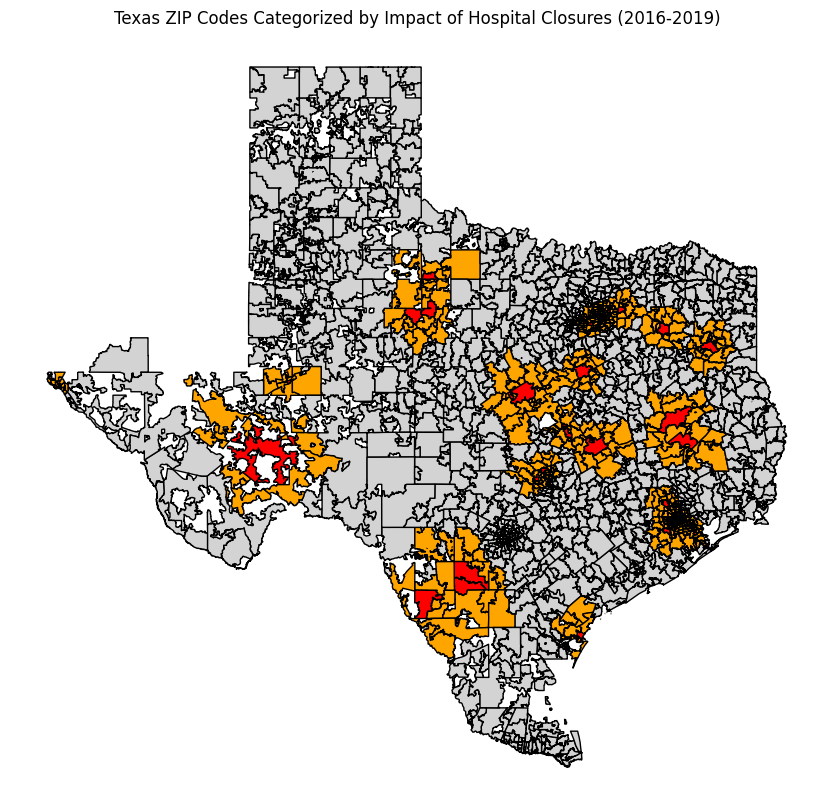

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Step 1: Re-project data for accuracy (if not already done)
texas_zip_gdf = texas_zip_gdf.to_crs(epsg=3395)
directly_affected_zips = texas_closure_geo[texas_closure_geo['Closure_Count'] > 0].to_crs(epsg=3395)

# Step 2: Create a 10-mile buffer around directly affected ZIP codes
directly_affected_zips['buffer'] = directly_affected_zips.geometry.buffer(16093.4)  # Buffer in meters
buffered_zips = gpd.GeoDataFrame(directly_affected_zips[['ZCTA5', 'buffer']], geometry='buffer', crs=directly_affected_zips.crs)

# Step 3: Identify indirectly affected ZIP codes
indirectly_affected_zips = gpd.sjoin(texas_zip_gdf, buffered_zips, how='inner', predicate='intersects')
indirectly_affected_zip_codes = indirectly_affected_zips['ZCTA5_left'].unique()  # Use 'ZCTA5_left' from join result

# Step 4: Classify ZIP codes into categories
texas_zip_gdf['category'] = 'Not Affected'
texas_zip_gdf.loc[texas_zip_gdf['ZCTA5'].isin(directly_affected_zips['ZCTA5']), 'category'] = 'Directly Affected'
texas_zip_gdf.loc[(texas_zip_gdf['ZCTA5'].isin(indirectly_affected_zip_codes)) & 
                  (~texas_zip_gdf['ZCTA5'].isin(directly_affected_zips['ZCTA5'])), 'category'] = 'Indirectly Affected'

# Step 5: Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
category_colors = {'Not Affected': 'lightgrey', 'Directly Affected': 'red', 'Indirectly Affected': 'orange'}
texas_zip_gdf.plot(column='category', categorical=True, 
                   legend=True, color=[category_colors.get(x) for x in texas_zip_gdf['category']],
                   legend_kwds={'title': "Impact Category"}, ax=ax, edgecolor='black')

# Adding a title and displaying the plot
plt.title("Texas ZIP Codes Categorized by Impact of Hospital Closures (2016-2019)")
plt.axis('off')  # Hide axis for a cleaner look
plt.show()